##Business Requirement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, **customer retention** has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn**.

**Churn** that is being targeted here:
1. **Usage-based churn**: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

What us being considered as **High-Value Churn**
- In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage. Identify the high-value customers and predict churn only on high-value customers.

**Business Objective**
- The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). 
- There are *three phases* of customer lifecycle
  - The ‘good’ phase:  The customer is happy with the service and behaves as usual
  - The ‘action’ phase: The customer experience starts to sore in this phase
  - The ‘churn’ phase: In this phase, the customer is said to have churned. You **define churn based on this phase**.
  - The first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.


In [1]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

sns.set_style(style = 'whitegrid' )
warnings.filterwarnings('ignore')

Using TensorFlow backend.
/Users/shubham/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
#Getting the application_data.csv file
tel_churn_data = pd.read_csv("/Users/shubham/Downloads/telecom_churn_data.csv", encoding='iso-8859-1')
tel_churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [3]:
# To check the dimension of the data
tel_churn_data.shape

(99999, 226)

In [4]:
# Basic Information of the Dataset
tel_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# Stats of the Dataset
tel_churn_data.describe().T

count          mean            std           min  \
mobile_number     99999.0  7.001207e+09  695669.386290  7.000000e+09   
circle_id         99999.0  1.090000e+02       0.000000  1.090000e+02   
loc_og_t2o_mou    98981.0  0.000000e+00       0.000000  0.000000e+00   
std_og_t2o_mou    98981.0  0.000000e+00       0.000000  0.000000e+00   
loc_ic_t2o_mou    98981.0  0.000000e+00       0.000000  0.000000e+00   
arpu_6            99999.0  2.829874e+02     328.439770 -2.258709e+03   
arpu_7            99999.0  2.785366e+02     338.156291 -2.014045e+03   
arpu_8            99999.0  2.791547e+02     344.474791 -9.458080e+02   
arpu_9            99999.0  2.616451e+02     341.998630 -1.899505e+03   
onnet_mou_6       96062.0  1.323959e+02     297.207406  0.000000e+00   
onnet_mou_7       96140.0  1.336708e+02     308.794148  0.000000e+00   
onnet_mou_8       94621.0  1.330181e+02     308.951589  0.000000e+00   
onnet_mou_9       92254.0  1.303023e+02     308.477668  0.000000e+00   
offnet_mou_6      96062.0  1.979356e+02     316.851613  0.000000e+00   
offnet_mou_7      96140.0  1.970451e+02     325.862803  0.000000e+00   
offnet_mou_8      94621.0  1.965748e+02     327.170662  0.000000e+00   
offnet_mou_9      92254.0  1.903372e+02     319.396092  0.000000e+00   
roam_ic_mou_6     96062.0  9.950013e+00      72.825411  0.000000e+00   
roam_ic_mou_7     96140.0  7.149898e+00      73.447948  0.000000e+00   
roam_ic_mou_8     94621.0  7.292981e+00      68.402466  0.000000e+00   
roam_ic_mou_9     92254.0  6.343841e+00      57.137537  0.000000e+00   
roam_og_mou_6     96062.0  1.391134e+01      71.443196  0.000000e+00   
roam_og_mou_7     96140.0  9.818732e+00      58.455762  0.000000e+00   
roam_og_mou_8     94621.0  9.971890e+00      64.713221  0.000000e+00   
roam_og_mou_9     92254.0  8.555519e+00      58.438186  0.000000e+00   
loc_og_t2t_mou_6  96062.0  4.710076e+01     150.856393  0.000000e+00   
loc_og_t2t_mou_7  96140.0  4.647301e+01     155.318705  0.000000e+00   
loc_og_t2t_mou_8  94621.0  4.588781e+01     151.184830  0.000000e+00   
loc_og_t2t_mou_9  92254.0  4.458445e+01     147.995390  0.000000e+00   
loc_og_t2m_mou_6  96062.0  9.334209e+01     162.780544  0.000000e+00   
...                   ...           ...            ...           ...   
arpu_2g_9         25922.0  9.371203e+01     171.384224 -4.574000e+01   
night_pck_user_6  25153.0  2.508647e-02       0.156391  0.000000e+00   
night_pck_user_7  25571.0  2.303391e-02       0.150014  0.000000e+00   
night_pck_user_8  26339.0  2.084362e-02       0.142863  0.000000e+00   
night_pck_user_9  25922.0  1.597099e-02       0.125366  0.000000e+00   
monthly_2g_6      99999.0  7.964080e-02       0.295058  0.000000e+00   
monthly_2g_7      99999.0  8.322083e-02       0.304395  0.000000e+00   
monthly_2g_8      99999.0  8.100081e-02       0.299568  0.000000e+00   
monthly_2g_9      99999.0  6.878069e-02       0.278120  0.000000e+00   
sachet_2g_6       99999.0  3.893839e-01       1.497320  0.000000e+00   
sachet_2g_7       99999.0  4.396344e-01       1.636230  0.000000e+00   
sachet_2g_8       99999.0  4.500745e-01       1.630263  0.000000e+00   
sachet_2g_9       99999.0  3.931039e-01       1.347140  0.000000e+00   
monthly_3g_6      99999.0  7.592076e-02       0.363371  0.000000e+00   
monthly_3g_7      99999.0  7.858079e-02       0.387231  0.000000e+00   
monthly_3g_8      99999.0  8.294083e-02       0.384947  0.000000e+00   
monthly_3g_9      99999.0  8.634086e-02       0.384978  0.000000e+00   
sachet_3g_6       99999.0  7.478075e-02       0.568344  0.000000e+00   
sachet_3g_7       99999.0  8.040080e-02       0.628334  0.000000e+00   
sachet_3g_8       99999.0  8.450085e-02       0.660234  0.000000e+00   
sachet_3g_9       99999.0  8.458085e-02       0.650457  0.000000e+00   
fb_user_6         25153.0  9.144038e-01       0.279772  0.000000e+00   
fb_user_7         25571.0  9.087638e-01       0.287950  0.000000e+00   
fb_user_8         26339.0  8.908083e-01       0.311885  0.00

In [6]:
# There are certain columns whose name needs to be renamed
# aug_vbc_3g, jul_vbc_3g, jun_vbc_3g, sep_vbc_3g
# As we can see in the above , for Jun the columns ends with _6, Similarly for Jul - _7, Aug _8 and Sep _9
tel_churn_data.rename(columns = {'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8' , 'sep_vbc_3g' : 'vbc_3g_9' } , inplace = True)

### Filter high-value customers

In [7]:
# To derive the new Feature for the Total amount spend on the data
tel_churn_data['total_rech_data_amt_6'] = tel_churn_data['total_rech_data_6'] * tel_churn_data['av_rech_amt_data_6']
tel_churn_data['total_rech_data_amt_7'] = tel_churn_data['total_rech_data_7'] * tel_churn_data['av_rech_amt_data_7']
tel_churn_data['total_rech_data_amt_8'] = tel_churn_data['total_rech_data_8'] * tel_churn_data['av_rech_amt_data_8']
tel_churn_data['total_rech_data_amt_9'] = tel_churn_data['total_rech_data_9'] * tel_churn_data['av_rech_amt_data_9']

# Dropping the columns
cols_to_drop = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
tel_churn_data.drop(cols_to_drop, axis = 1, inplace = True)

In [8]:
# Filtering the High Value Customer
# As this Months are considered as good phase
col_to_consider = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_data_amt_6', 'total_rech_data_amt_7' ]
# As there can be missing values, so as to check the values of the same
tel_churn_data[col_to_consider].isna().sum()

total_rech_amt_6             0
total_rech_amt_7             0
total_rech_data_amt_6    74846
total_rech_data_amt_7    74428
dtype: int64

In [9]:
# Checking the statistic of the Columns
# Checking how much missing values are there
print(tel_churn_data[['total_rech_data_amt_6', 'total_rech_data_amt_7']].describe())
# It's quite huge ( number of null values ), as it's a total recharge if node data is there hence it can be better to replace all the NaN with 0
tel_churn_data[['total_rech_data_amt_6', 'total_rech_data_amt_7']] = tel_churn_data[['total_rech_data_amt_6', 'total_rech_data_amt_7']].fillna(0) 
# Printing the Current Status of Null Values
tel_churn_data[col_to_consider].isna().sum()

       total_rech_data_amt_6  total_rech_data_amt_7
count           25153.000000           25571.000000
mean              591.906758             669.872284
std              1519.671866            1564.306233
min                 1.000000               1.000000
25%               142.000000             145.000000
50%               198.000000             207.000000
75%               608.000000             616.000000
max            105644.000000           55080.000000


total_rech_amt_6         0
total_rech_amt_7         0
total_rech_data_amt_6    0
total_rech_data_amt_7    0
dtype: int64

In [10]:
# Now the average of the Good phase: ( June and July )
tel_churn_data['avg_rech_amt_6_7'] = ((tel_churn_data[col_to_consider].sum(axis = 1))/2)

In [11]:
print("70th quantile value is {0}".format(tel_churn_data['avg_rech_amt_6_7'].quantile(0.7)))

70th quantile value is 478.0


In [12]:
#Those who have recharged with an amount more than or equal to 368.5, where 368.5 is the 70th percentile of the average recharge amount in the first two months (the good phase).
quant_70th = tel_churn_data['avg_rech_amt_6_7'].quantile(0.7)
tel_churn_data = tel_churn_data[tel_churn_data['avg_rech_amt_6_7'] >= quant_70th]
print("Shape of the dataframe is {0}".format(tel_churn_data.shape))

Shape of the dataframe is (30001, 223)


### Tag churners and remove attributes of the churn phase

In [13]:
col_to_consider = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9'] # Cols helping to identying churn or not
tel_churn_data['is_churn'] = tel_churn_data[col_to_consider].sum(axis = 1)

def define_churn(x):
  if x == 0:
    return 1 # Churn
  else:
    return 0 # Not Churmed

tel_churn_data['is_churn'] = tel_churn_data['is_churn'].apply(lambda x: define_churn(x) )

In [14]:
# Class Distribution
tel_churn_data['is_churn'].value_counts()

0    27560
1     2441
Name: is_churn, dtype: int64

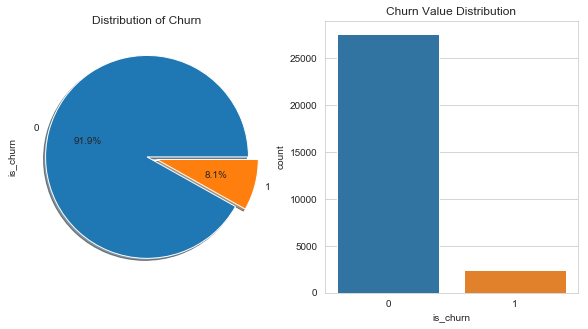

In [15]:
# To check the class imbalance of the Churn Variable
# Plotting a Bar Plot and Pie Chart
f,ax=plt.subplots(1,2,figsize= (10,5))
tel_churn_data['is_churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, ax = ax[0])
ax[0].set_title('Distribution of Churn')
sns.countplot(tel_churn_data['is_churn'],ax=ax[1])
ax[1].set_title('Churn Value Distribution')
plt.show()

In [16]:
# After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
cols_to_drop = [col for col in list(tel_churn_data) if col.endswith('_9') ]
print("Number of Cols to be dropped is {0}".format(len(cols_to_drop)))
tel_churn_data.drop(cols_to_drop, axis = 1, inplace = True)
print("Shape of the dataframe is {0}".format(tel_churn_data.shape))

Number of Cols to be dropped is 54
Shape of the dataframe is (30001, 170)


### Adjusting the Datatype

In [17]:
# As per the Info, all the Datetime objects are marked as categorical variable
# so lets find the list of all the categorical value
col_to_consider = tel_churn_data.select_dtypes('object').columns.tolist()
col_to_consider

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [18]:
# Changing the data type from Object to Datetime
for col in col_to_consider:
  tel_churn_data[col] = pd.to_datetime(tel_churn_data[col])

In [19]:
tel_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 170 entries, mobile_number to is_churn
dtypes: datetime64[ns](9), float64(133), int64(28)
memory usage: 40.4 MB


In [20]:
# Replacing the date with the week of the Datetime
for col in col_to_consider:
  tel_churn_data[col] = tel_churn_data[col].dt.strftime("%W")

In [21]:
# If the value is set then we would replace the day with 1 and if the data is not there we would replace it with 0
# Why 1 because all the date is same i.e. equal to last date of the month
# why 0 because if the entry is not there then the date to be considered as 0
last_date_of_month = ['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8']

def change_val(x):
  if x == 'NaT': # In case of Null Values the Datetime objects get converted to NaT
     return 0
  else:
     return 1

for col in last_date_of_month:
  tel_churn_data[col] = tel_churn_data[col].apply(lambda x: change_val(x))

In [22]:
rest_of_date_cols = ['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

# Replacing all the NaT with -1, so that we can replace later
tel_churn_data[rest_of_date_cols] = tel_churn_data[rest_of_date_cols].replace('NaT', -1)

In [23]:
tel_churn_data[rest_of_date_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 6 columns):
date_of_last_rech_6         30001 non-null object
date_of_last_rech_7         30001 non-null object
date_of_last_rech_8         30001 non-null object
date_of_last_rech_data_6    30001 non-null object
date_of_last_rech_data_7    30001 non-null object
date_of_last_rech_data_8    30001 non-null object
dtypes: object(6)
memory usage: 2.9+ MB


In [24]:
# Changing the data type to numeric for operation
tel_churn_data[rest_of_date_cols] = tel_churn_data[rest_of_date_cols].astype(np.number)
tel_churn_data[rest_of_date_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 6 columns):
date_of_last_rech_6         30001 non-null float64
date_of_last_rech_7         30001 non-null float64
date_of_last_rech_8         30001 non-null float64
date_of_last_rech_data_6    30001 non-null float64
date_of_last_rech_data_7    30001 non-null float64
date_of_last_rech_data_8    30001 non-null float64
dtypes: float64(6)
memory usage: 2.9 MB


In [25]:
# For further calculation, first setting the -1( which were the NaN Values)
tel_churn_data[rest_of_date_cols] = tel_churn_data[rest_of_date_cols].replace(-1,np.nan)
# Then get the week starting from the minimum week
tel_churn_data[rest_of_date_cols] = tel_churn_data[rest_of_date_cols] - ( tel_churn_data[rest_of_date_cols].min() - 1 )

In [26]:
# Now imputing the NaN with the min - 1 ( i.e. 0) 
for col in rest_of_date_cols:
  tel_churn_data[col] = tel_churn_data[col].fillna(0)

In [27]:
print("Shape of the dataframe is {0}".format(tel_churn_data.shape))

Shape of the dataframe is (30001, 170)


#### Let's try to find the uniqueness in the data

In [28]:
# To check the uniqueness per features,
# If there is no uniqueness/ variance that column doesn't infer much information
# Hence we can drop drop that column
df_unique_count = tel_churn_data.nunique()
col_with_count_1 = df_unique_count[df_unique_count==1].index.tolist()
col_with_count_1

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [29]:
# As these columns are not much of an importance hence dropping these columns
tel_churn_data.drop(col_with_count_1, axis = 1, inplace = True)
print("Shape of the dataframe is {0}".format(tel_churn_data.shape))

Shape of the dataframe is (30001, 159)


In [30]:
# Mobile Number : All the data points are unique, and this can be dropped
df_unique_count[df_unique_count==len(tel_churn_data.index)].index.tolist()

['mobile_number']

In [31]:
tel_churn_data.drop('mobile_number', axis = 1, inplace = True)
print("Shape of the dataframe is {0}".format(tel_churn_data.shape))

Shape of the dataframe is (30001, 158)


### Null Value Analysis

In [32]:
# To Check the Null Values based on Columns
null = pd.DataFrame(round(100*(tel_churn_data.isnull().sum()/len(tel_churn_data)),2), columns = ['Null Values'])
null.sort_values(by='Null Values', ascending= False).head(20)

Null Values
arpu_2g_8                    46.83
fb_user_8                    46.83
total_rech_data_amt_8        46.83
arpu_3g_8                    46.83
count_rech_3g_8              46.83
count_rech_2g_8              46.83
max_rech_data_8              46.83
night_pck_user_8             46.83
arpu_3g_6                    44.15
arpu_2g_6                    44.15
count_rech_3g_6              44.15
fb_user_6                    44.15
count_rech_2g_6              44.15
max_rech_data_6              44.15
night_pck_user_6             44.15
fb_user_7                    43.15
night_pck_user_7             43.15
arpu_2g_7                    43.15
max_rech_data_7              43.15
count_rech_2g_7              43.15

In [33]:
# As a understanding, if the if there is no Recharge of Data Done, then all the services/Features associated with Data for that month
# will also be null, hence to prove it all the features were considered ( Belonging to month Aug and all the Feature associated with data)

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['count_rech_3g_8'].isna()][['date_of_last_rech_data_8', 'count_rech_3g_8']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['count_rech_3g_8'].isna()][['date_of_last_rech_data_8', 'count_rech_3g_8']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['arpu_2g_8'].isna()][['date_of_last_rech_data_8', 'arpu_2g_8']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['arpu_2g_8'].isna()][['date_of_last_rech_data_8', 'arpu_2g_8']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['total_rech_data_amt_8'].isna()][['date_of_last_rech_data_8', 'total_rech_data_amt_8']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['total_rech_data_amt_8'].isna()][['date_of_last_rech_data_8', 'total_rech_data_amt_8']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['max_rech_data_8'].isna()][['date_of_last_rech_data_8', 'max_rech_data_8']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['max_rech_data_8'].isna()][['date_of_last_rech_data_8', 'max_rech_data_8']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['night_pck_user_8'].isna()][['date_of_last_rech_data_8', 'night_pck_user_8']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['night_pck_user_8'].isna()][['date_of_last_rech_data_8', 'night_pck_user_8']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['count_rech_2g_8'].isna()][['date_of_last_rech_data_8', 'count_rech_2g_8']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['count_rech_2g_8'].isna()][['date_of_last_rech_data_8', 'count_rech_2g_8']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['fb_user_8'].isna()][['date_of_last_rech_data_8', 'fb_user_8']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['fb_user_8'].isna()][['date_of_last_rech_data_8', 'fb_user_8']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['arpu_3g_8'].isna()][['date_of_last_rech_data_8', 'arpu_3g_8']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['arpu_3g_8'].isna()][['date_of_last_rech_data_8', 'arpu_3g_8']].head())

---------------------------------------------------------------------------------------------------
date_of_last_rech_data_8    1
count_rech_3g_8             0
dtype: int64
    date_of_last_rech_data_8  count_rech_3g_8
7                        0.0              NaN
21                       0.0              NaN
38                       0.0              NaN
41                       0.0              NaN
48                       0.0              NaN
---------------------------------------------------------------------------------------------------
date_of_last_rech_data_8    1
arpu_2g_8                   0
dtype: int64
    date_of_last_rech_data_8  arpu_2g_8
7                        0.0        NaN
21                       0.0        NaN
38                       0.0        NaN
41                       0.0        NaN
48                       0.0        NaN
---------------------------------------------------------------------------------------------------
date_of_last_rech_data_8    1
total_re

**Conclusion Driven**: As we can 
1. For the Date Column, as we have imputed all the Null Values with 0, that's why the Unique count is 1
2. But for all the features, the count is 0

Hence it can be concluded that all the features are dependend on date, i.e. if reacharge of the data is not done/ Null, then the Feature associated with data is also Null.

In [34]:
# Imputing all the Null values for the data associate columns for the month of Aug with 0
col_to_consider = ['total_rech_data_amt_8', 'fb_user_8', 'arpu_3g_8', 'night_pck_user_8',
       'count_rech_3g_8', 'arpu_2g_8', 'max_rech_data_8', 'count_rech_2g_8']

tel_churn_data[col_to_consider] = tel_churn_data[col_to_consider].fillna(0)

In [35]:
# To Check the Null Values based on Columns
null = pd.DataFrame(round(100*(tel_churn_data.isnull().sum()/len(tel_churn_data)),2), columns = ['Null Values'])
null.sort_values(by='Null Values', ascending= False).head(20)

Null Values
arpu_2g_6               44.15
arpu_3g_6               44.15
fb_user_6               44.15
count_rech_3g_6         44.15
night_pck_user_6        44.15
count_rech_2g_6         44.15
max_rech_data_6         44.15
max_rech_data_7         43.15
night_pck_user_7        43.15
arpu_2g_7               43.15
count_rech_2g_7         43.15
count_rech_3g_7         43.15
arpu_3g_7               43.15
fb_user_7               43.15
isd_og_mou_8             3.91
og_others_8              3.91
spl_og_mou_8             3.91
std_ic_mou_8             3.91
std_og_mou_8             3.91
std_og_t2f_mou_8         3.91

In [36]:
# As a understanding, if the if there is no Recharge of Data Done, then all the services/Features associated with Data for that month
# will also be null, hence to prove it all the features were considered ( Belonging to month Aug and all the Feature associated with data)

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['arpu_2g_6'].isna()][['date_of_last_rech_data_6', 'arpu_2g_6']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['arpu_2g_6'].isna()][['date_of_last_rech_data_6', 'arpu_2g_6']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['arpu_3g_6'].isna()][['date_of_last_rech_data_6', 'arpu_3g_6']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['arpu_3g_6'].isna()][['date_of_last_rech_data_6', 'arpu_3g_6']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['fb_user_6'].isna()][['date_of_last_rech_data_6', 'fb_user_6']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['fb_user_6'].isna()][['date_of_last_rech_data_6', 'fb_user_6']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['night_pck_user_6'].isna()][['date_of_last_rech_data_6', 'night_pck_user_6']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['night_pck_user_6'].isna()][['date_of_last_rech_data_6', 'night_pck_user_6']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['count_rech_3g_6'].isna()][['date_of_last_rech_data_6', 'count_rech_3g_6']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['count_rech_3g_6'].isna()][['date_of_last_rech_data_6', 'count_rech_3g_6']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['total_rech_data_amt_6'].isna()][['date_of_last_rech_data_6', 'total_rech_data_amt_6']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['total_rech_data_amt_6'].isna()][['date_of_last_rech_data_6', 'total_rech_data_amt_6']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['count_rech_2g_6'].isna()][['date_of_last_rech_data_6', 'count_rech_2g_6']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['count_rech_2g_6'].isna()][['date_of_last_rech_data_6', 'count_rech_2g_6']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['max_rech_data_6'].isna()][['date_of_last_rech_data_6', 'max_rech_data_6']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['max_rech_data_6'].isna()][['date_of_last_rech_data_6', 'max_rech_data_6']].head())

---------------------------------------------------------------------------------------------------
date_of_last_rech_data_6    1
arpu_2g_6                   0
dtype: int64
    date_of_last_rech_data_6  arpu_2g_6
7                        0.0        NaN
8                        0.0        NaN
21                       0.0        NaN
23                       0.0        NaN
38                       0.0        NaN
---------------------------------------------------------------------------------------------------
date_of_last_rech_data_6    1
arpu_3g_6                   0
dtype: int64
    date_of_last_rech_data_6  arpu_3g_6
7                        0.0        NaN
8                        0.0        NaN
21                       0.0        NaN
23                       0.0        NaN
38                       0.0        NaN
---------------------------------------------------------------------------------------------------
date_of_last_rech_data_6    1
fb_user_6                   0
dtype: int64
 

**Conclusion Driven**: As we can 
1. For the Date Column, as we have imputed all the Null Values with 0, that's why the Unique count is 1
2. But for all the features, the count is 0

Hence it can be concluded that all the features are dependend on date, i.e. if reacharge of the data is not done/ Null, then the Feature associated with data is also Null.

In [37]:
# Imputing all the Null values for the data associate columns for the month of June with 0
col_to_consider = ['arpu_2g_6', 'arpu_3g_6', 'fb_user_6', 'night_pck_user_6',
       'count_rech_3g_6', 'total_rech_data_amt_6', 'count_rech_2g_6',
       'max_rech_data_6']

tel_churn_data[col_to_consider] = tel_churn_data[col_to_consider].fillna(0)

In [38]:
# To Check the Null Values based on Columns
null = pd.DataFrame(round(100*(tel_churn_data.isnull().sum()/len(tel_churn_data)),2), columns = ['Null Values'])
null.sort_values(by='Null Values', ascending= False).head(20)

Null Values
night_pck_user_7        43.15
count_rech_3g_7         43.15
count_rech_2g_7         43.15
arpu_3g_7               43.15
max_rech_data_7         43.15
arpu_2g_7               43.15
fb_user_7               43.15
spl_og_mou_8             3.91
loc_og_mou_8             3.91
spl_ic_mou_8             3.91
std_og_t2m_mou_8         3.91
std_og_t2f_mou_8         3.91
std_og_mou_8             3.91
isd_og_mou_8             3.91
std_ic_mou_8             3.91
std_ic_t2f_mou_8         3.91
og_others_8              3.91
loc_og_t2f_mou_8         3.91
std_ic_t2m_mou_8         3.91
loc_ic_t2t_mou_8         3.91

In [39]:
# As a understanding, if the if there is no Recharge of Data Done, then all the services/Features associated with Data for that month
# will also be null, hence to prove it all the features were considered ( Belonging to month Aug and all the Feature associated with data)

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['arpu_2g_7'].isna()][['date_of_last_rech_data_7', 'arpu_2g_7']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['arpu_2g_7'].isna()][['date_of_last_rech_data_7', 'arpu_2g_7']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['arpu_3g_7'].isna()][['date_of_last_rech_data_7', 'arpu_3g_7']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['arpu_3g_7'].isna()][['date_of_last_rech_data_7', 'arpu_3g_7']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['fb_user_7'].isna()][['date_of_last_rech_data_7', 'fb_user_7']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['fb_user_7'].isna()][['date_of_last_rech_data_7', 'fb_user_7']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['night_pck_user_7'].isna()][['date_of_last_rech_data_7', 'night_pck_user_7']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['night_pck_user_7'].isna()][['date_of_last_rech_data_7', 'night_pck_user_7']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['count_rech_3g_7'].isna()][['date_of_last_rech_data_7', 'count_rech_3g_7']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['count_rech_3g_7'].isna()][['date_of_last_rech_data_7', 'count_rech_3g_7']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['total_rech_data_amt_7'].isna()][['date_of_last_rech_data_7', 'total_rech_data_amt_7']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['total_rech_data_amt_7'].isna()][['date_of_last_rech_data_7', 'total_rech_data_amt_7']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['count_rech_2g_7'].isna()][['date_of_last_rech_data_7', 'count_rech_2g_7']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['count_rech_2g_7'].isna()][['date_of_last_rech_data_7', 'count_rech_2g_7']].head())

print("---------------------------------------------------------------------------------------------------")
print(tel_churn_data[tel_churn_data['max_rech_data_7'].isna()][['date_of_last_rech_data_7', 'max_rech_data_7']].nunique())
print("===================================================================================================")
print(tel_churn_data[tel_churn_data['max_rech_data_7'].isna()][['date_of_last_rech_data_7', 'max_rech_data_7']].head())

---------------------------------------------------------------------------------------------------
date_of_last_rech_data_7    1
arpu_2g_7                   0
dtype: int64
    date_of_last_rech_data_7  arpu_2g_7
7                        0.0        NaN
21                       0.0        NaN
38                       0.0        NaN
41                       0.0        NaN
48                       0.0        NaN
---------------------------------------------------------------------------------------------------
date_of_last_rech_data_7    1
arpu_3g_7                   0
dtype: int64
    date_of_last_rech_data_7  arpu_3g_7
7                        0.0        NaN
21                       0.0        NaN
38                       0.0        NaN
41                       0.0        NaN
48                       0.0        NaN
---------------------------------------------------------------------------------------------------
date_of_last_rech_data_7    1
fb_user_7                   0
dtype: int64
 

**Conclusion Driven**: As we can 
1. For the Date Column, as we have imputed all the Null Values with 0, that's why the Unique count is 1
2. But for all the features, the count is 0

Hence it can be concluded that all the features are dependend on date, i.e. if reacharge of the data is not done/ Null, then the Feature associated with data is also Null.

In [40]:
# Imputing all the Null values for the data associate columns for the month of July with 0
col_to_consider = ['count_rech_3g_7', 'count_rech_2g_7', 'total_rech_data_amt_7',
       'arpu_3g_7', 'max_rech_data_7', 'arpu_2g_7', 'fb_user_7',
       'night_pck_user_7']

tel_churn_data[col_to_consider] = tel_churn_data[col_to_consider].fillna(0)

In [41]:
# To Check the Null Values based on Columns
null = pd.DataFrame(round(100*(tel_churn_data.isnull().sum()/len(tel_churn_data)),2), columns = ['Null Values'])
null.sort_values(by='Null Values', ascending= False).head(30)

Null Values
std_ic_mou_8             3.91
std_ic_t2t_mou_8         3.91
std_og_mou_8             3.91
std_og_t2m_mou_8         3.91
isd_og_mou_8             3.91
std_og_t2t_mou_8         3.91
spl_og_mou_8             3.91
loc_og_mou_8             3.91
og_others_8              3.91
loc_og_t2c_mou_8         3.91
loc_ic_t2t_mou_8         3.91
loc_ic_t2m_mou_8         3.91
loc_og_t2f_mou_8         3.91
loc_ic_t2f_mou_8         3.91
loc_og_t2m_mou_8         3.91
loc_og_t2t_mou_8         3.91
loc_ic_mou_8             3.91
roam_og_mou_8            3.91
std_ic_t2f_mou_8         3.91
ic_others_8              3.91
isd_ic_mou_8             3.91
spl_ic_mou_8             3.91
onnet_mou_8              3.91
offnet_mou_8             3.91
std_og_t2f_mou_8         3.91
roam_ic_mou_8            3.91
std_ic_t2m_mou_8         3.91
std_ic_t2f_mou_6         1.82
loc_ic_t2f_mou_6         1.82
std_ic_mou_6             1.82

In [42]:
# Imputing the missing Values with Iterative Imputer Technique
df_tmp = tel_churn_data.copy()
df_tmp = IterativeImputer(random_state=42, verbose=2 , skip_complete=True,  n_nearest_features=5,
                               sample_posterior=True ).fit_transform(df_tmp)
df_tmp = pd.DataFrame(df_tmp,columns=tel_churn_data.columns )

print("=========================================================================================")
df_tmp.head()

[IterativeImputer] Completing matrix with shape (30001, 158)
[IterativeImputer] Ending imputation round 1/10, elapsed time 3.70
[IterativeImputer] Ending imputation round 2/10, elapsed time 7.42
[IterativeImputer] Ending imputation round 3/10, elapsed time 12.65
[IterativeImputer] Ending imputation round 4/10, elapsed time 17.65
[IterativeImputer] Ending imputation round 5/10, elapsed time 32.66
[IterativeImputer] Ending imputation round 6/10, elapsed time 35.60
[IterativeImputer] Ending imputation round 7/10, elapsed time 39.95
[IterativeImputer] Ending imputation round 8/10, elapsed time 42.19
[IterativeImputer] Ending imputation round 9/10, elapsed time 44.45
[IterativeImputer] Ending imputation round 10/10, elapsed time 46.50


last_date_of_month_7  last_date_of_month_8    arpu_6    arpu_7    arpu_8  \
0                   1.0                   1.0   197.385   214.816   213.803   
1                   1.0                   1.0  1069.180  1349.850  3171.480   
2                   1.0                   1.0   378.721   492.223   137.362   
3                   1.0                   1.0   514.453   597.753   637.760   
4                   1.0                   1.0    74.350   193.897   366.966   

   onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  ...  \
0  -139.436886  -153.790013         0.00    165.235552   -286.472851  ...   
1    57.840000    54.680000        52.29    453.430000    567.160000  ...   
2   413.690000   351.030000        35.08     94.660000     80.630000  ...   
3   102.410000   132.110000        85.14    757.930000    896.680000  ...   
4    48.960000    50.660000        33.58     85.410000     89.360000  ...   

   fb_user_8    aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_rech_data_amt_6  \
0        1.0  968.0     30.40      0.00    101.20                  252.0   
1        0.0  802.0     57.74     19.38     18.74                    0.0   
2        1.0  315.0     21.03    910.65    122.16                    0.0   
3        0.0  720.0      0.00      0.00      0.00                    0.0   
4        1.0  604.0     40.45     51.86      0.00                    0.0   

   total_rech_data_amt_7  total_rech_data_amt_8  avg_rech_amt_6_7  is_churn  
0                  252.0                  252.0             559.0       1.0  
1                    0.0                    0.0            1185.0       1.0  
2                  354.0                  207.0             696.0       0.0  
3                    0.0                    0.0             640.0       0.0  
4                  712.0                  540.0             583.0       0.0  

[5 rows x 158 columns]

In [43]:
# Getting the list of all the integer colums as the iterative imputer will convert all the columns to Float
col_type_int = tel_churn_data.select_dtypes('int64').columns.to_list()
print('Number of Integer Columns are: {0}'.format(len(col_type_int)))

Number of Integer Columns are: 28


In [44]:
# Assigning back the values
tel_churn_data = df_tmp

# To Check the Null Values based on Columns
null = pd.DataFrame(round(100*(tel_churn_data.isnull().sum()/len(tel_churn_data)),2), columns = ['Null Values'])
null.sort_values(by='Null Values', ascending= False).head(20)

Null Values
last_date_of_month_7              0.0
date_of_last_rech_data_7          0.0
date_of_last_rech_6               0.0
date_of_last_rech_7               0.0
date_of_last_rech_8               0.0
last_day_rch_amt_6                0.0
last_day_rch_amt_7                0.0
last_day_rch_amt_8                0.0
date_of_last_rech_data_6          0.0
date_of_last_rech_data_8          0.0
max_rech_amt_7                    0.0
max_rech_data_6                   0.0
max_rech_data_7                   0.0
max_rech_data_8                   0.0
count_rech_2g_6                   0.0
count_rech_2g_7                   0.0
count_rech_2g_8                   0.0
count_rech_3g_6                   0.0
max_rech_amt_8                    0.0
max_rech_amt_6                    0.0

In [45]:
# Converting back to Integer
tel_churn_data[col_type_int] = tel_churn_data[col_type_int].astype('int64')
tel_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 158 entries, last_date_of_month_7 to is_churn
dtypes: float64(130), int64(28)
memory usage: 36.2 MB


In [46]:
print("Shape of the dataframe is {0}".format(tel_churn_data.shape))

Shape of the dataframe is (30001, 158)


## Deriving New Features

In [47]:
# Lets consider the ARPU( Average Revenue Per User): find the drop( delta ) between Action and Good Phase
col_to_consider = [col for col in list(tel_churn_data) if col.startswith('arpu_')]
col_to_consider

['arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8']

In [48]:
# Derive the ARPU Drop
tel_churn_data['arpu_drop'] = tel_churn_data['arpu_8'] - ( tel_churn_data['arpu_6'] + tel_churn_data['arpu_7'] ) / 2
tel_churn_data['arpu_drop_2g'] = tel_churn_data['arpu_2g_8'] - ( tel_churn_data['arpu_2g_7'] + tel_churn_data['arpu_2g_6'] ) / 2
tel_churn_data['arpu_drop_3g'] = tel_churn_data['arpu_3g_8'] - ( tel_churn_data['arpu_3g_7'] + tel_churn_data['arpu_3g_6'] ) / 2 
tel_churn_data[['arpu_drop', 'arpu_drop_2g', 'arpu_drop_3g' ]].head()

arpu_drop  arpu_drop_2g  arpu_drop_3g
0     7.7025          0.00         0.000
1  1961.9650          0.00         0.000
2  -298.1100          0.00        19.830
3    81.6570          0.00         0.000
4   232.8425         -0.22        43.985

In [49]:
# Lets consider the Total Recharge Amount: find the drop( delta ) between Action and Good Phase
col_to_consider = [col for col in list(tel_churn_data) if col.startswith('total_rech_')]
col_to_consider

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_data_amt_6',
 'total_rech_data_amt_7',
 'total_rech_data_amt_8']

In [50]:
# This is the Total recharge Amount Drop 
tel_churn_data['total_rech_amt_drop'] = tel_churn_data['total_rech_amt_8'] - ( tel_churn_data['total_rech_amt_6'] + tel_churn_data['total_rech_amt_7'] ) / 2
tel_churn_data['total_rech_data_amt_drop'] = tel_churn_data['total_rech_data_amt_8'] - ( tel_churn_data['total_rech_data_amt_6'] + tel_churn_data['total_rech_data_amt_7'] ) / 2
tel_churn_data[['total_rech_amt_drop', 'total_rech_data_amt_drop']].head()

total_rech_amt_drop  total_rech_data_amt_drop
0                -55.0                       0.0
1               2453.0                       0.0
2               -399.0                      30.0
3                 78.0                       0.0
4                212.0                     184.0

In [51]:
# Univariate

# Freq Plot( Count PLot)
# Box Plot

# Box Plot
# Dist Plot ( with hist)

# Bivariate
# Box Plot
# KDE Plot
# Stacked Bar Chart

In [52]:
# Identifying the Categorical Columns
cat_cols = tel_churn_data.nunique()[tel_churn_data.nunique() < 10].index.to_list()
cat_cols.remove('is_churn')
tel_churn_data[cat_cols] = tel_churn_data[cat_cols].astype('category')

In [53]:

def plot(col):
  is_cat = False
  col_type  = tel_churn_data[col].dtype
  if not ( col_type == np.int64 or col_type == np.float64  ):
    is_cat = True

  plt.figure(figsize=(15,5))
  lv_msg = 'Plot for Feature ' + col
  plt.suptitle(lv_msg)
  if is_cat == True:
    plt.subplot(1,2,1)
    sns.countplot(tel_churn_data[col], order=tel_churn_data[col].value_counts().index)

    plt.subplot(1,2,2)
    sns.countplot(tel_churn_data[col], hue = tel_churn_data['is_churn'],order=tel_churn_data[col].value_counts().index )
    plt.show()
  else:
    plt.subplot(1,2,1)
    sns.distplot(tel_churn_data[col])

    plt.subplot(1,2,2)
    sns.boxplot(y = tel_churn_data[col], x = tel_churn_data['is_churn'])
    plt.show()

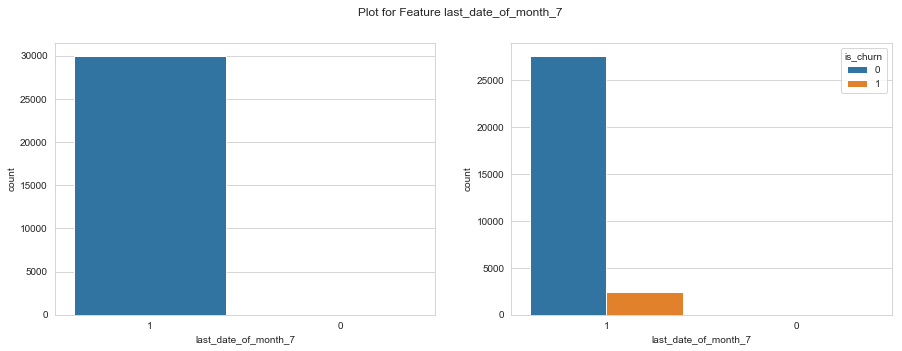

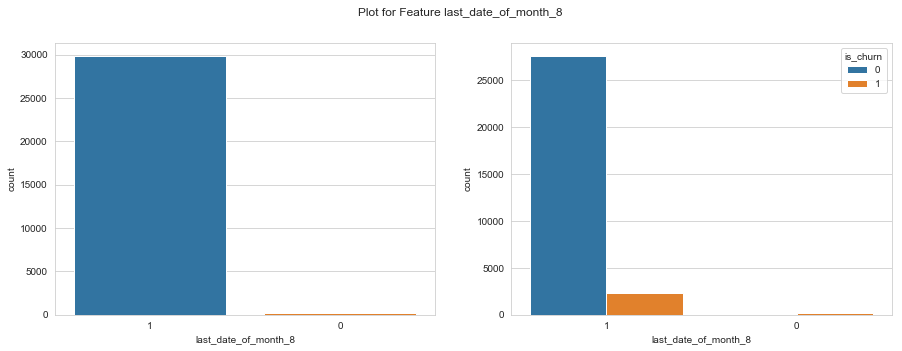

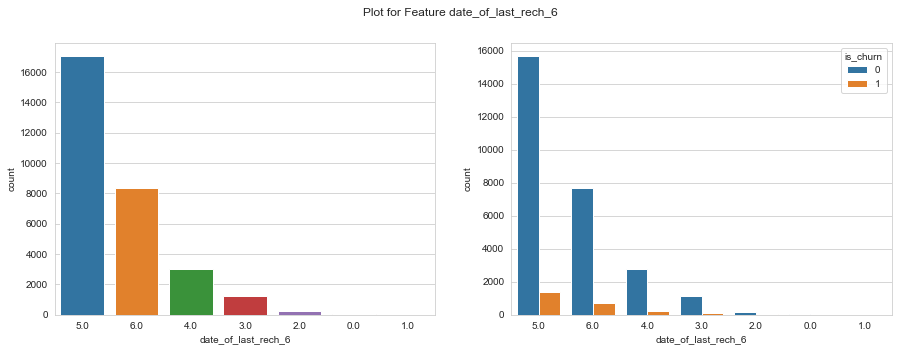

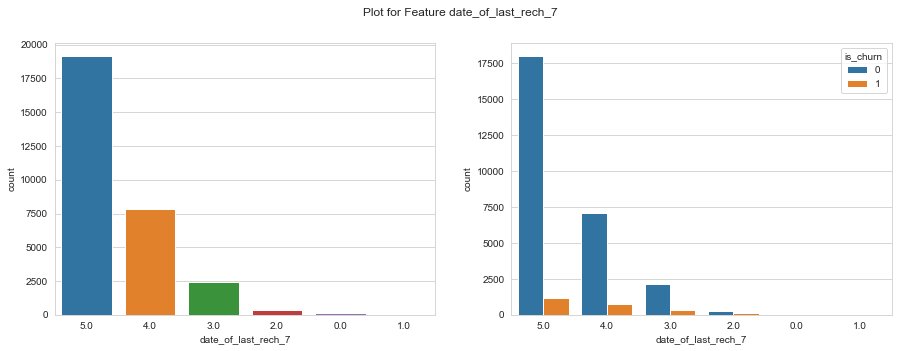

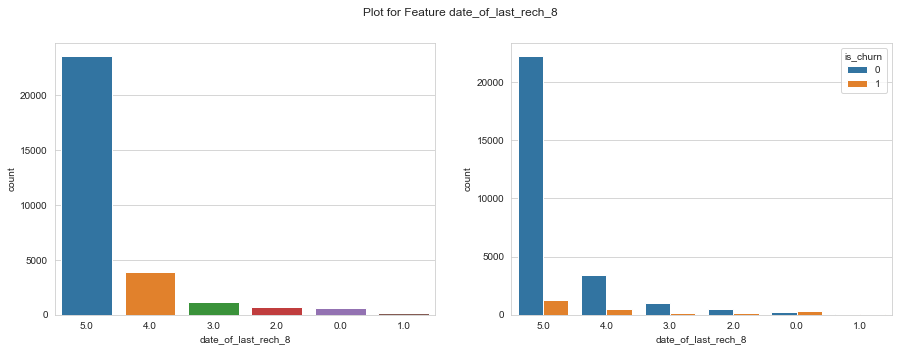

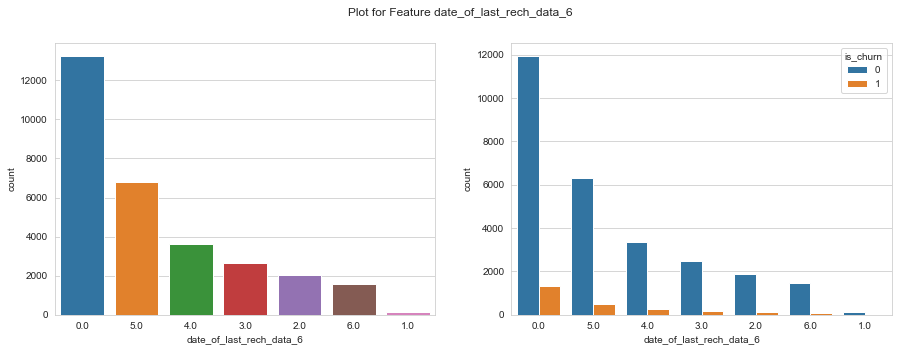

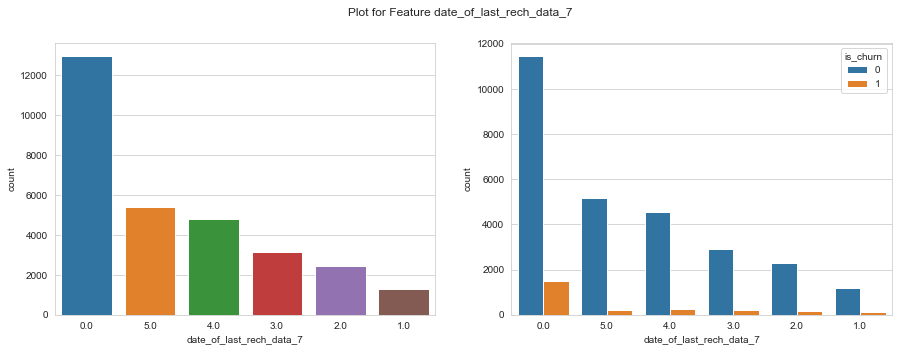

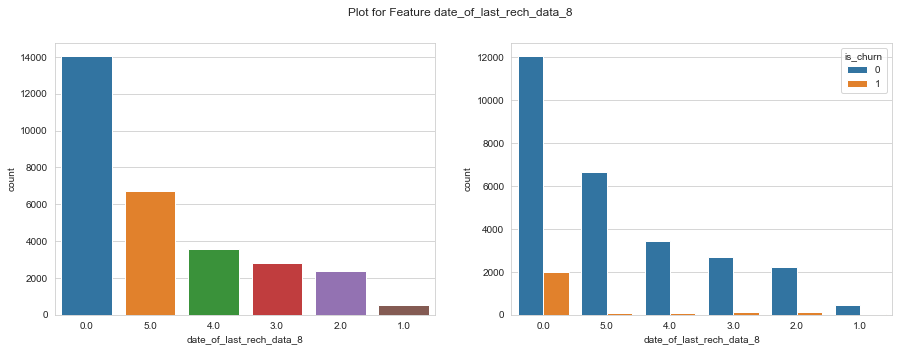

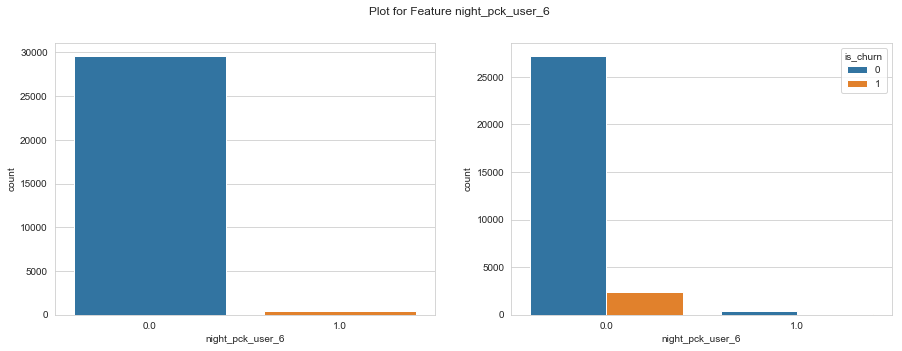

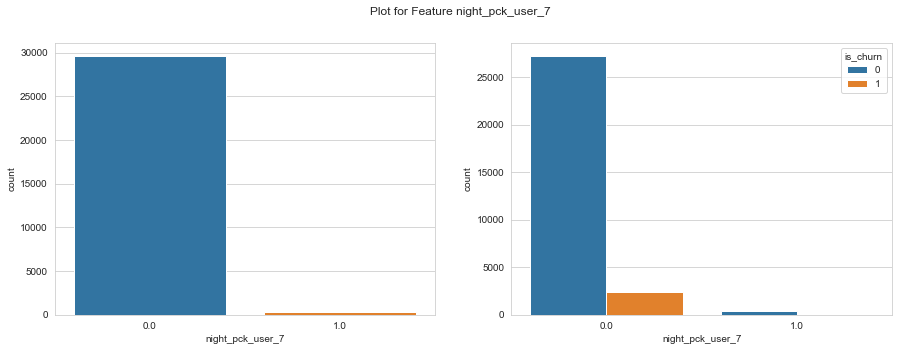

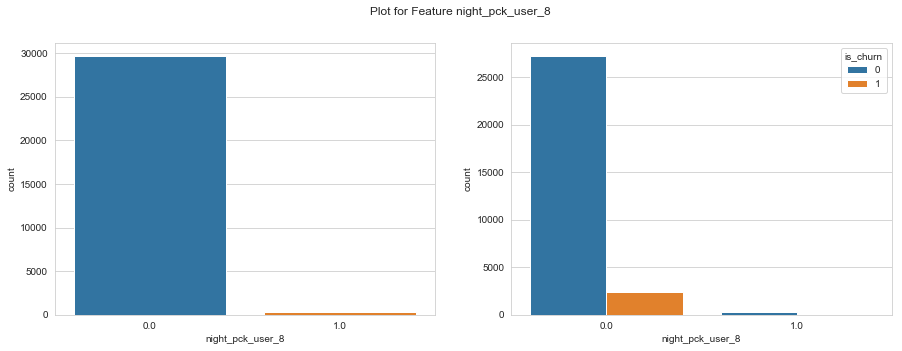

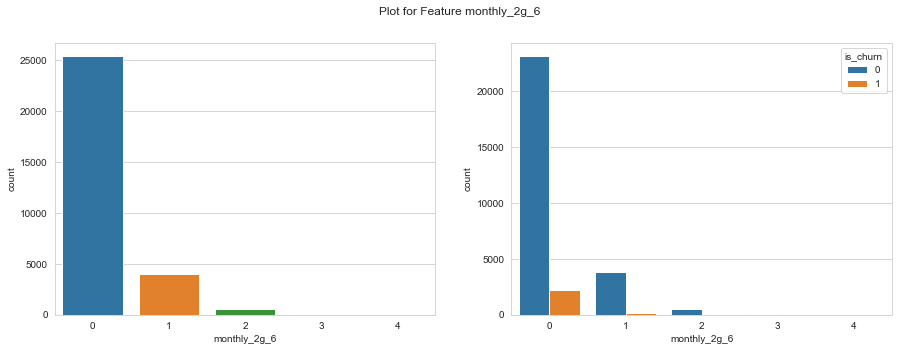

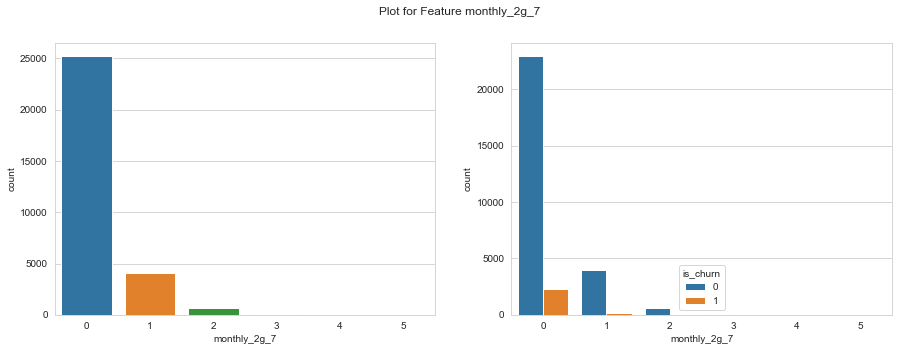

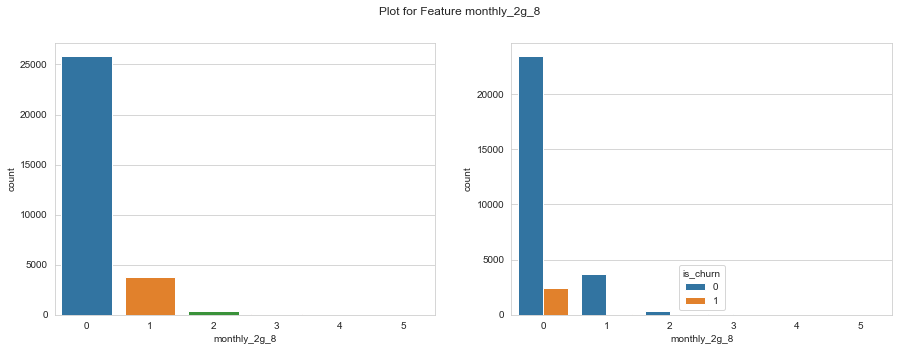

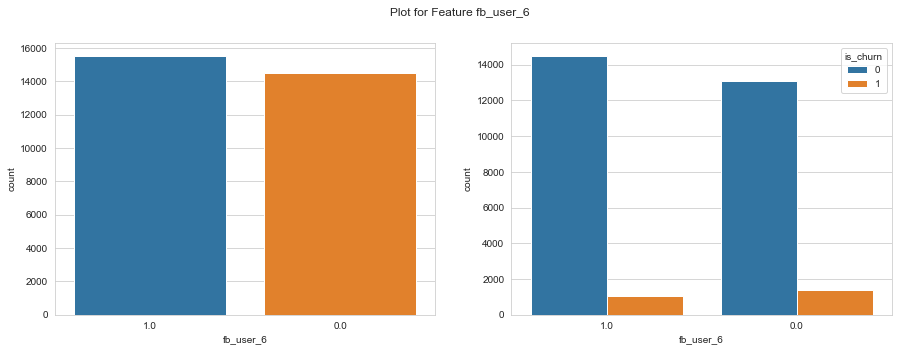

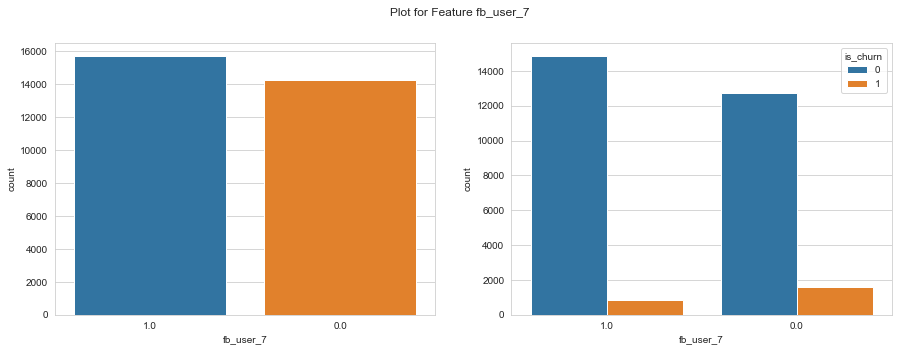

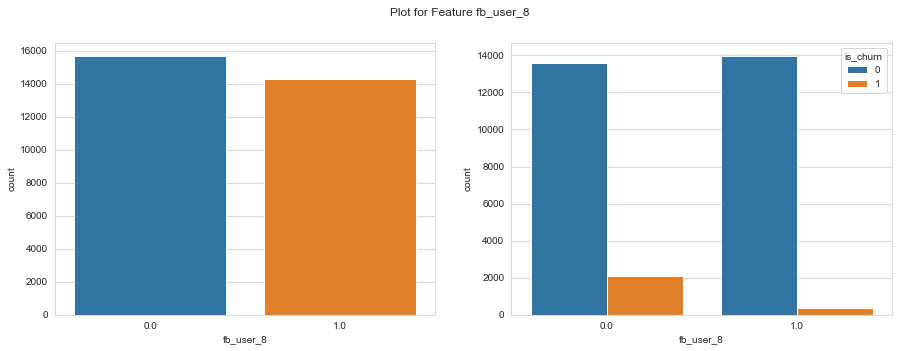

In [54]:
col_to_consider = tel_churn_data.select_dtypes('category')
for col in col_to_consider:
  plot(col)

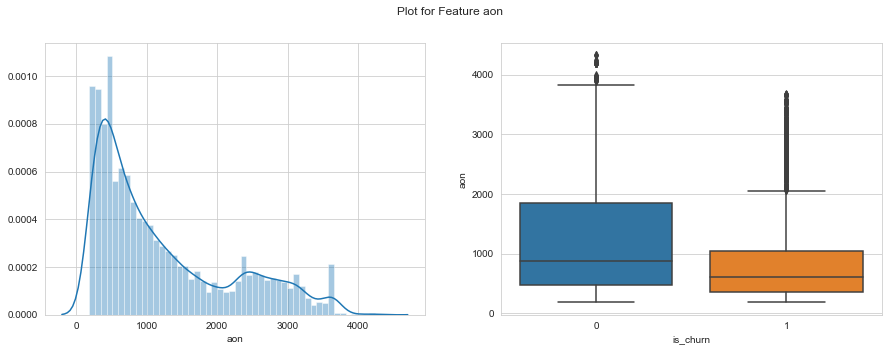

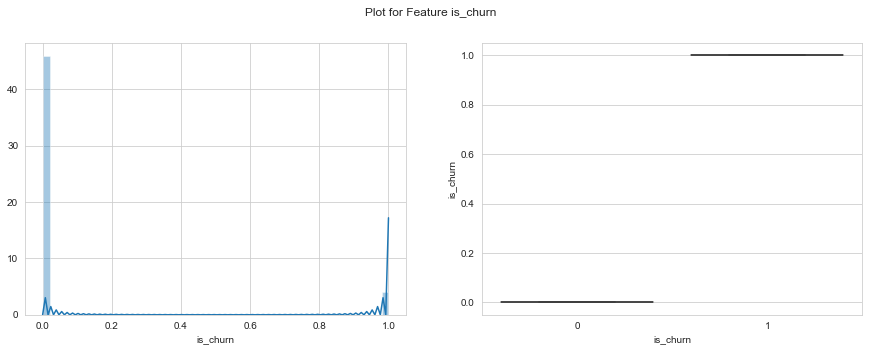

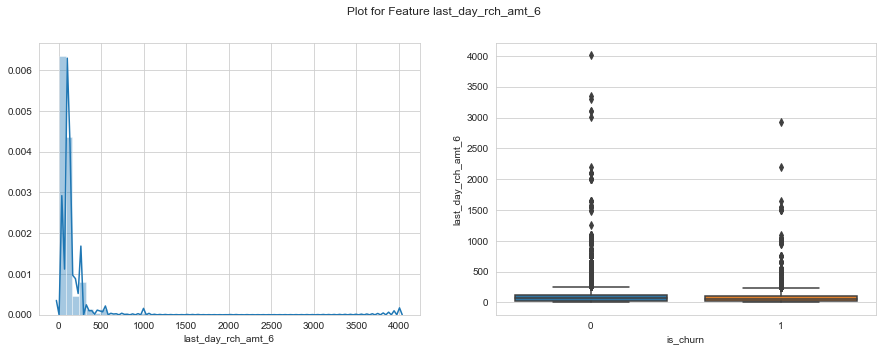

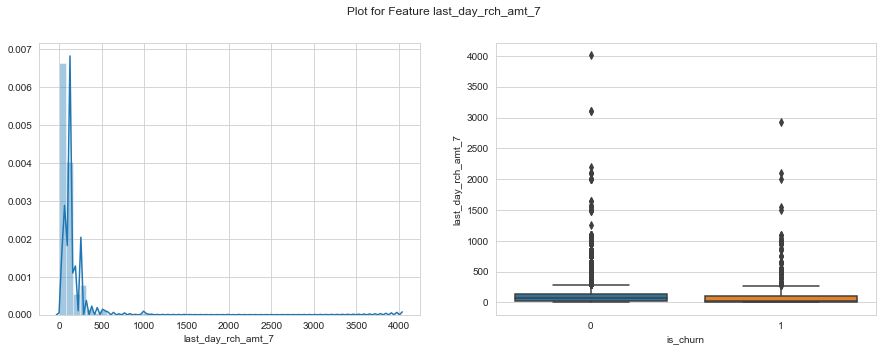

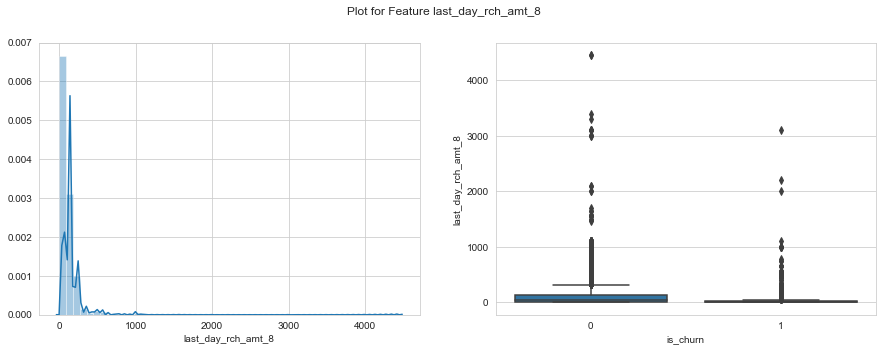

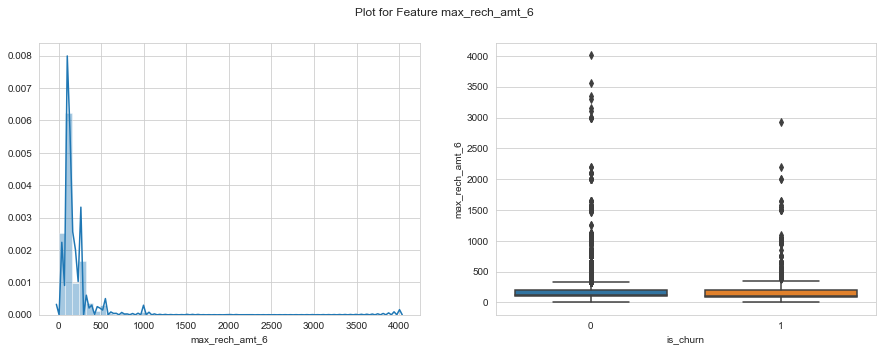

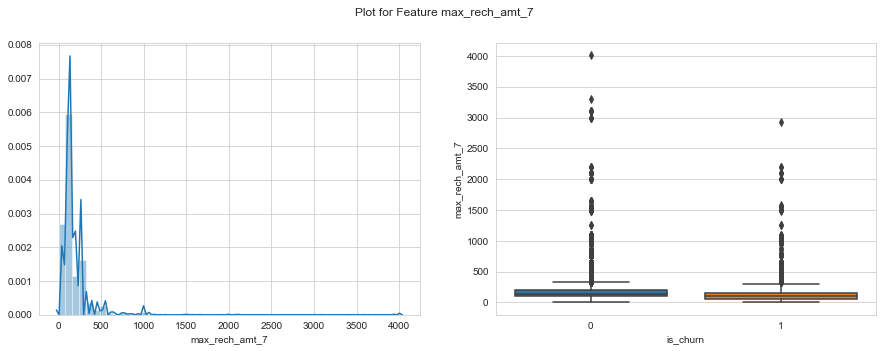

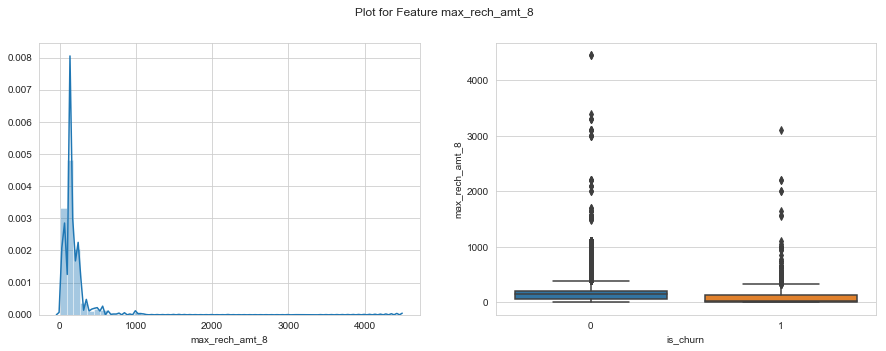

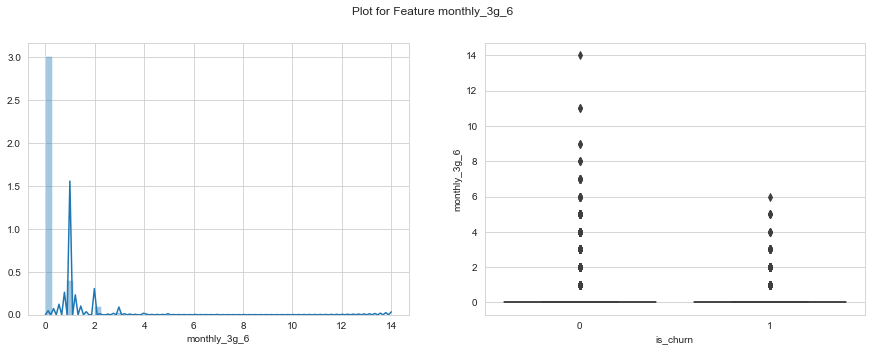

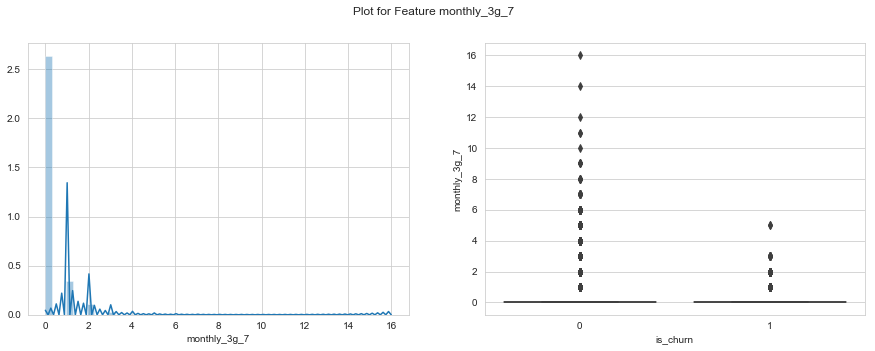

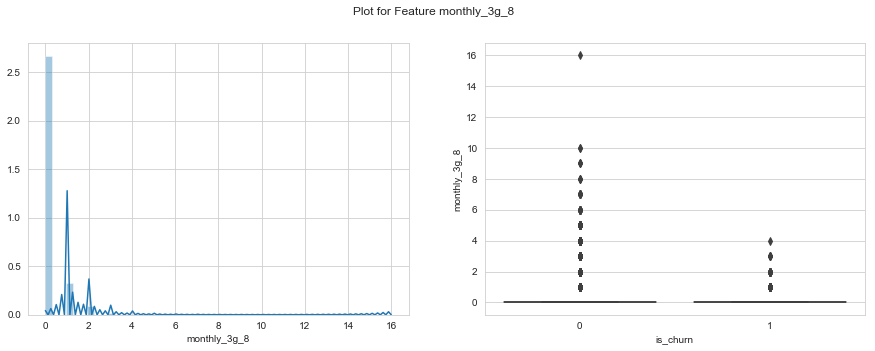

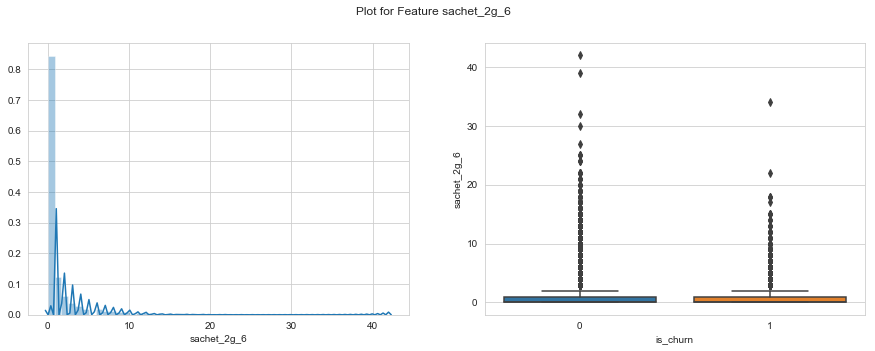

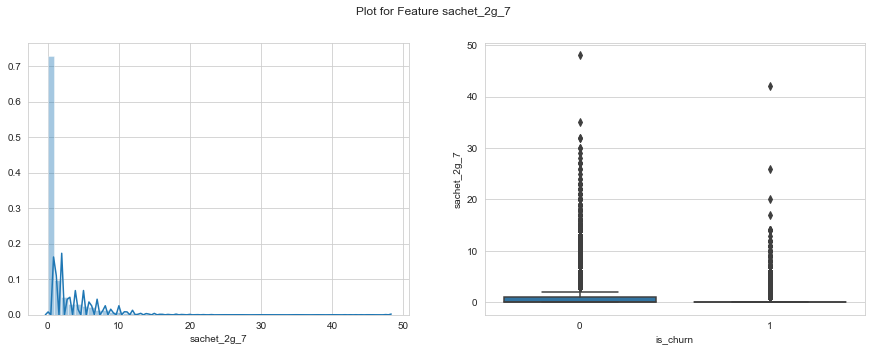

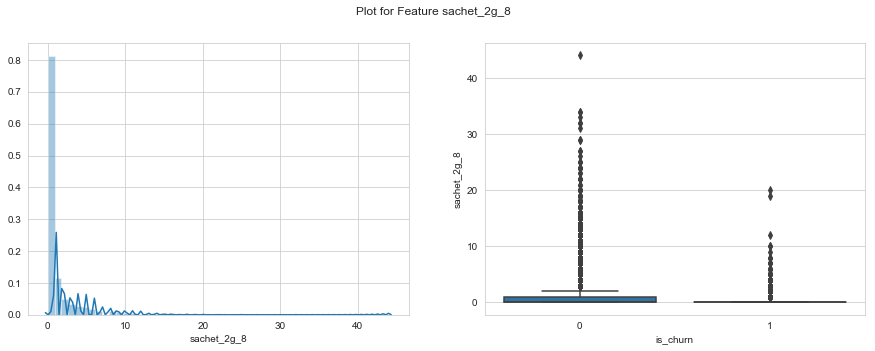

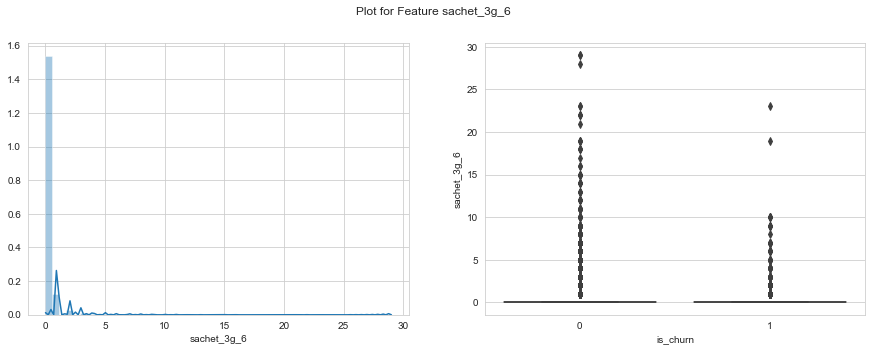

In [55]:
col_to_consider = sorted(tel_churn_data.select_dtypes(np.int64).columns.tolist())
for col in col_to_consider[:15]:
  plot(col)

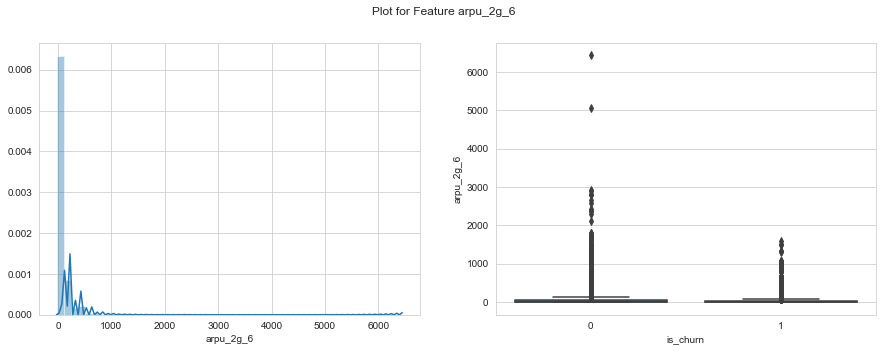

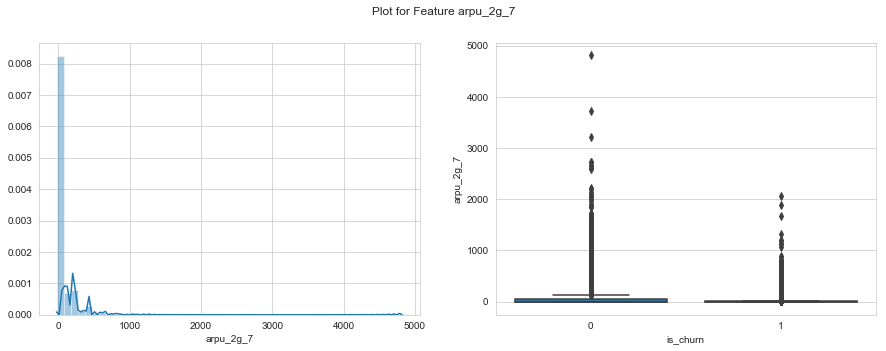

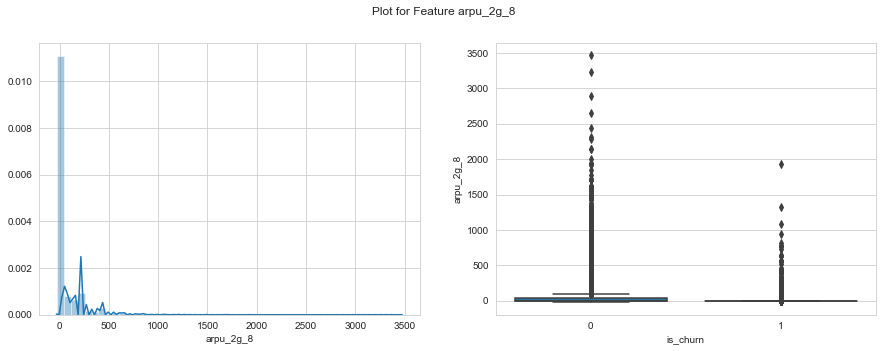

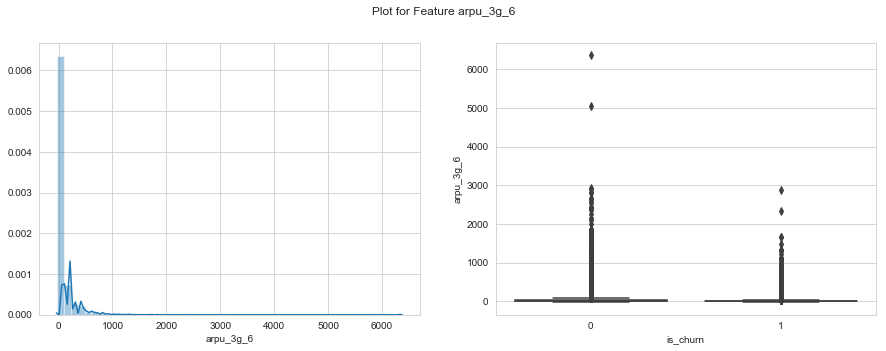

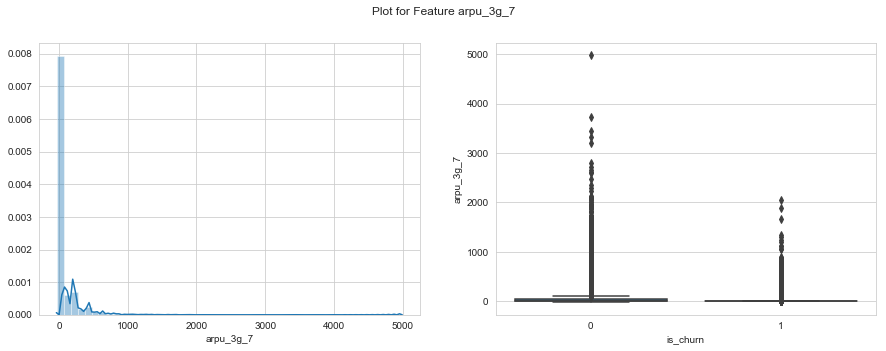

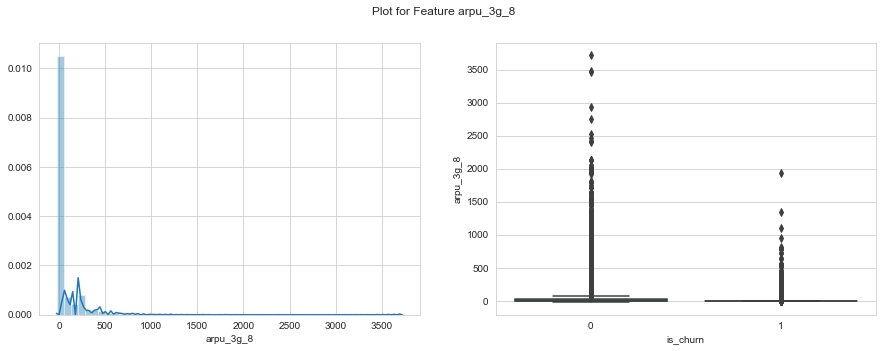

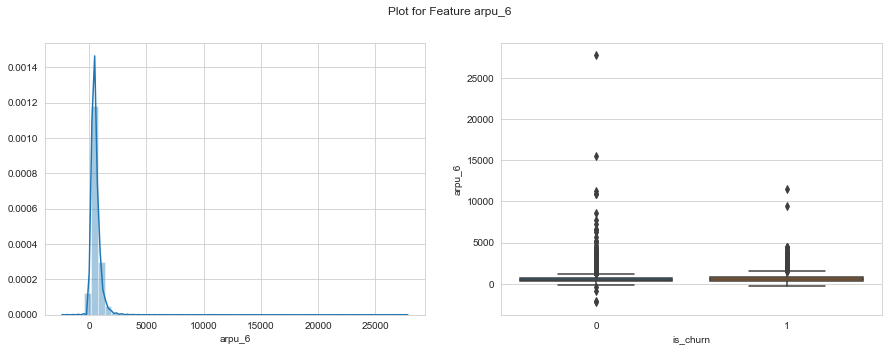

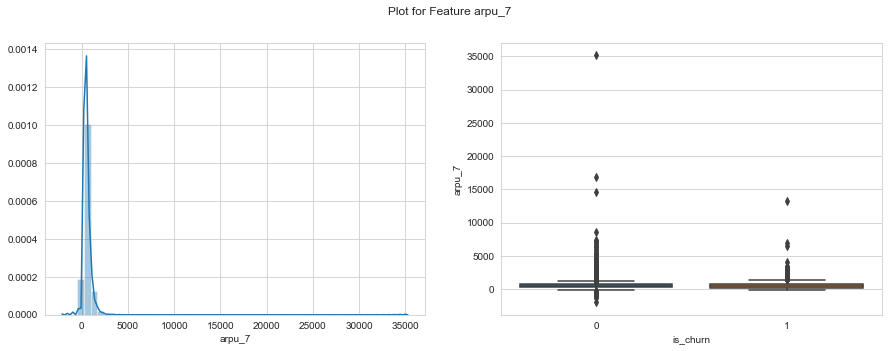

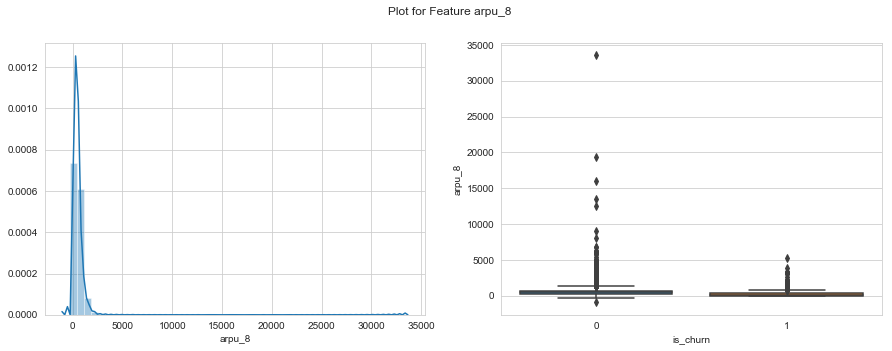

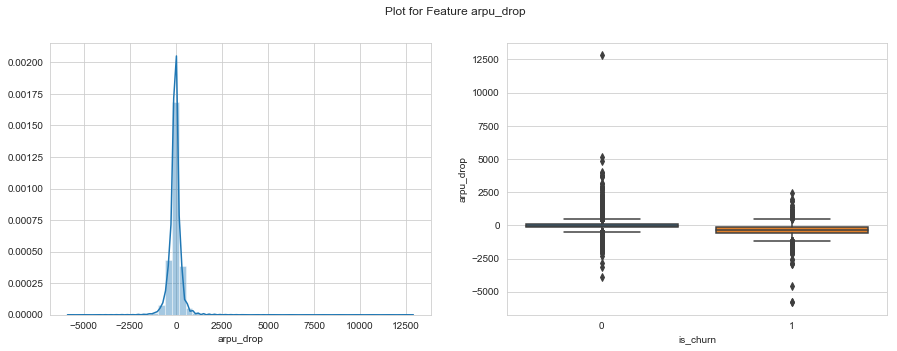

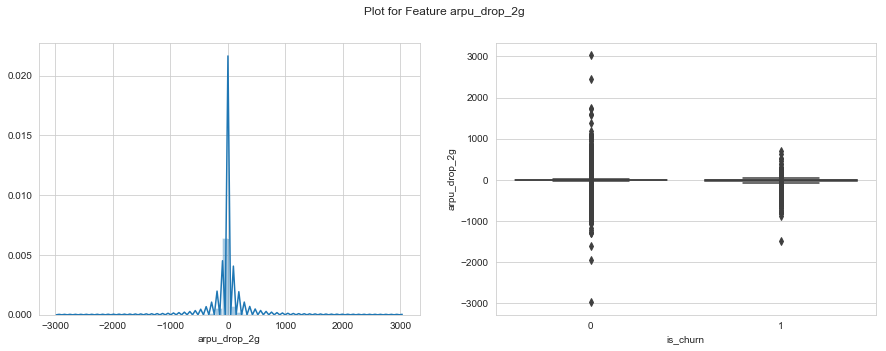

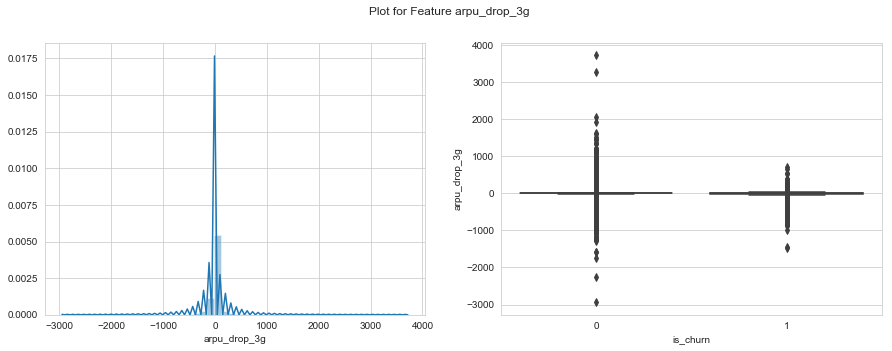

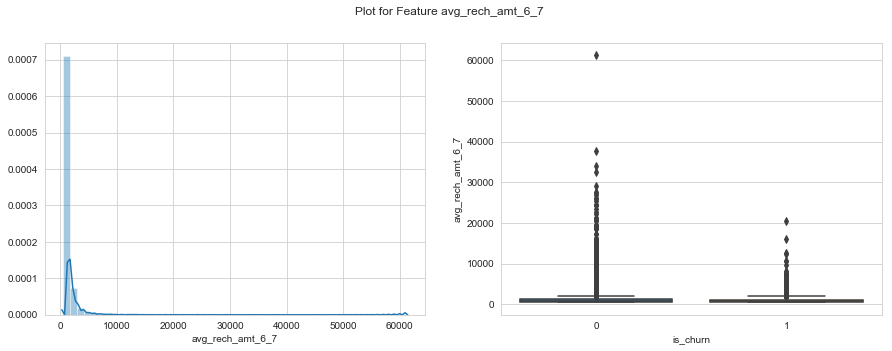

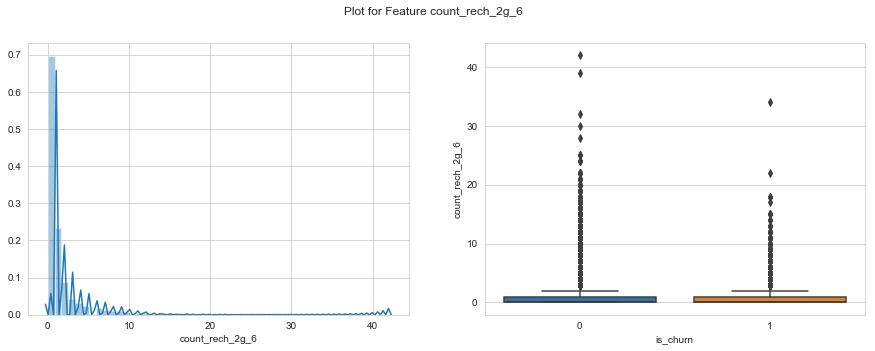

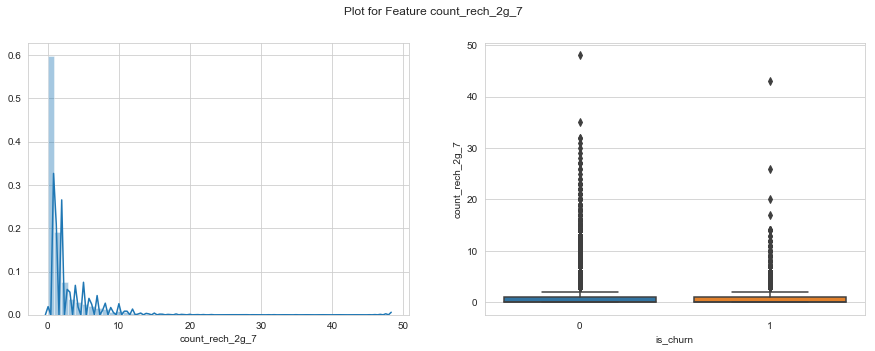

In [56]:
col_to_consider = sorted(tel_churn_data.select_dtypes(np.float64).columns.tolist())
for col in col_to_consider[:15]:
  plot(col)

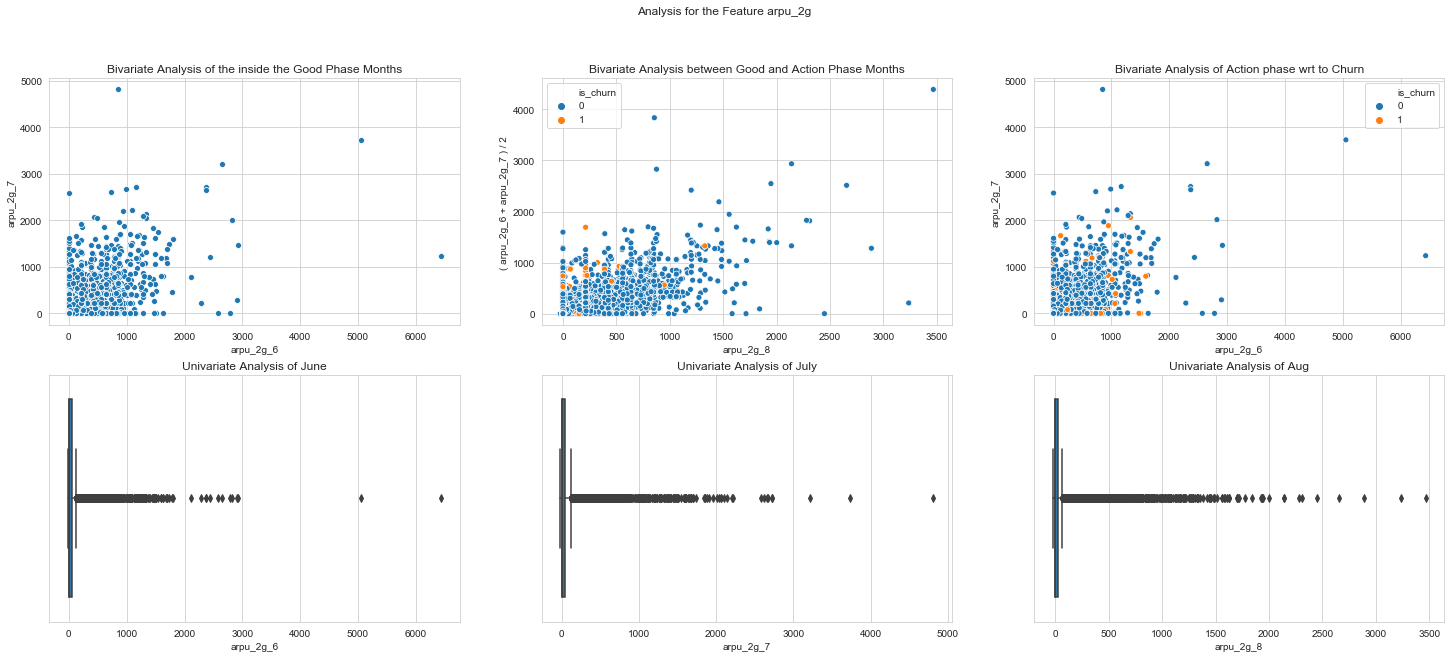

In [57]:
# Analysis of Individual Features with their good and action phase and wrt to Churn Phase
plt.figure(figsize=(25,10))
plt.suptitle('Analysis for the Feature arpu_2g')
plt.subplot(2,3,1)
plt.title('Bivariate Analysis of the inside the Good Phase Months')
sns.scatterplot(tel_churn_data['arpu_2g_6'], tel_churn_data['arpu_2g_7'] )

plt.subplot(2,3,2)
plt.title('Bivariate Analysis between Good and Action Phase Months')
sns.scatterplot(tel_churn_data['arpu_2g_8'], ( tel_churn_data['arpu_2g_6'] + tel_churn_data['arpu_2g_7'] ) / 2, hue = tel_churn_data['is_churn'])
plt.ylabel('( arpu_2g_6 + arpu_2g_7 ) / 2')

plt.subplot(2,3,3)
plt.title('Bivariate Analysis of Action phase wrt to Churn')
sns.scatterplot(tel_churn_data['arpu_2g_6'], tel_churn_data['arpu_2g_7'], hue = tel_churn_data['is_churn'])

plt.subplot(2,3,4)
plt.title('Univariate Analysis of June')
sns.boxplot(tel_churn_data['arpu_2g_6'])

plt.subplot(2,3,5)
plt.title('Univariate Analysis of July')
sns.boxplot(tel_churn_data['arpu_2g_7'])

plt.subplot(2,3,6)
plt.title('Univariate Analysis of Aug')
sns.boxplot(tel_churn_data['arpu_2g_8'])

plt.show()

**Conclusion Driven**:
1. From the scatter plots: 
   -  For the data distribution between two months of Good phase, it can be inferred that the data is tightly coupled between (3000, 3000) i.e. arpu_2g_6 <= 3000 and arpu_2g_7 <= 3000 and there are few less number of customers for whom the the arpu were more than that
   - For the data distribution between action phase and good phase, we can see that firstly the data is not clustered together and it's scattered, but as we can see **churn has occured when the arpu for aug is between 0-500 and for the average of good phase the arpu is between 500-1000**

2. From the box plot,
   - As we can see there are lot of outliers(Data Spread) for all the three months 
   - But for all the three months most of the revenue is between 0-3000

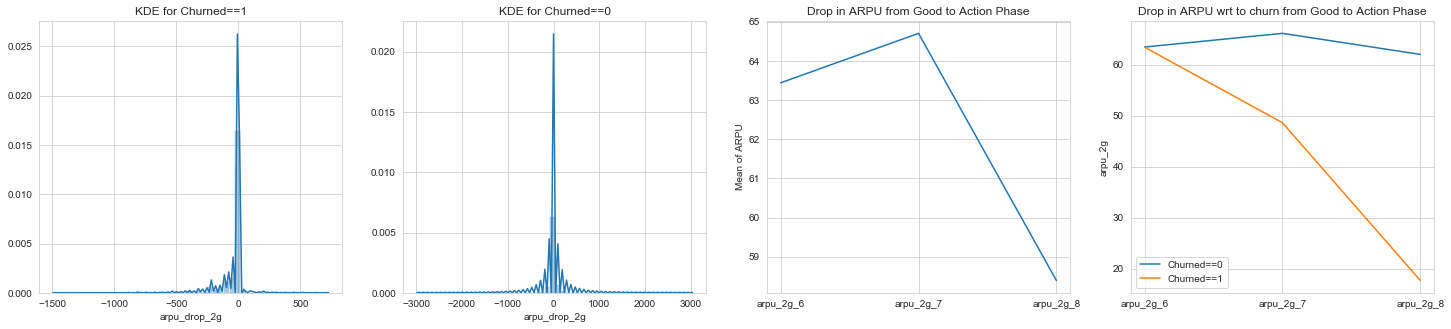

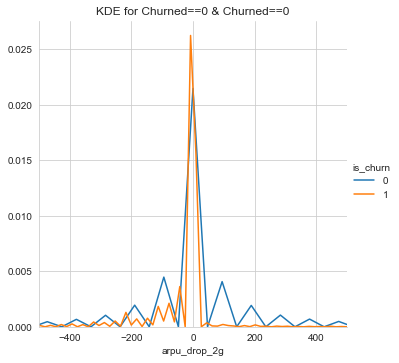

In [58]:
# PLoting the KDE of arpu_drop_2g
# So as to analyze the ARPU Drop for 2g
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.distplot(tel_churn_data.loc[tel_churn_data['is_churn']==1, 'arpu_drop_2g'])
plt.title('KDE for Churned==1')

plt.subplot(1,4,2)
sns.distplot(tel_churn_data.loc[tel_churn_data['is_churn']==0, 'arpu_drop_2g'] )
plt.title('KDE for Churned==0')

plt.subplot(1,4,3)
plt.title('Drop in ARPU from Good to Action Phase')
plt.plot(tel_churn_data[['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']].mean())
plt.ylabel('Mean of ARPU')

plt.subplot(1,4,4)
plt.title('Drop in ARPU wrt to churn from Good to Action Phase')
plt.plot(tel_churn_data.groupby('is_churn')['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'].mean().T)
plt.legend(['Churned==0', 'Churned==1'])
plt.ylabel('arpu_2g')

sns.FacetGrid(tel_churn_data,hue='is_churn', size=5, xlim=(-500,500), ).map(sns.distplot,"arpu_drop_2g", hist = False).add_legend()
plt.title('KDE for Churned==0 & Churned==0')
plt.show()

**Conclusion Driven**
1. As it was be seen for the above graph for the Churned Customer the arpu_drop is between the range -1500 to 500, but for the not churned customer the range is high
2. We can also infer of the arpu drop is negative and between [0, -500], there is a high chance that the customer will churn

In [59]:
# Lets check the distribution of parameter AON
tel_churn_data['aon'].describe()

count    30001.000000
mean      1209.368754
std        957.677989
min        180.000000
25%        460.000000
50%        846.000000
75%       1756.000000
max       4321.000000
Name: aon, dtype: float64

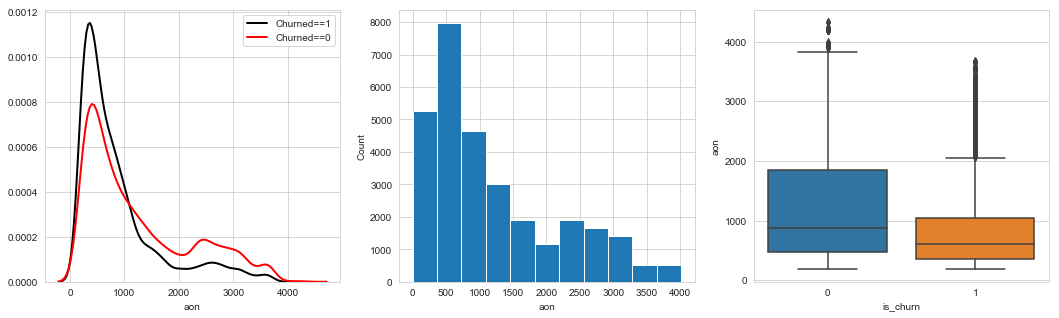

In [60]:
# Lets Analyze AON ( Age on Network)
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.distplot(tel_churn_data['aon'][tel_churn_data['is_churn'] == 1], hist=False, kde_kws={"color": "k", "lw": 2, "label": "Churned==1"} )
sns.distplot(tel_churn_data['aon'][tel_churn_data['is_churn'] == 0], hist=False, kde_kws={"color": "r", "lw": 2, "label": "Churned==0"})

plt.subplot(1,3,2)
plt.hist(tel_churn_data['aon'],bins=range(0,tel_churn_data['aon'].max(),365))
plt.xlabel('aon')
plt.ylabel('Count')

plt.subplot(1,3,3)
sns.boxplot(y = tel_churn_data['aon'], x = tel_churn_data['is_churn'] )
plt.show()

**Conclusion Driven**
1. As we see from above plot of aon, wrt to Churn and Not Churn, most of the churners have very less aon, as compared to non churners, as we can also see in Box Plot.
2. And from the histogram we can conclude that maximum number of data points for aon lies between 0-2000

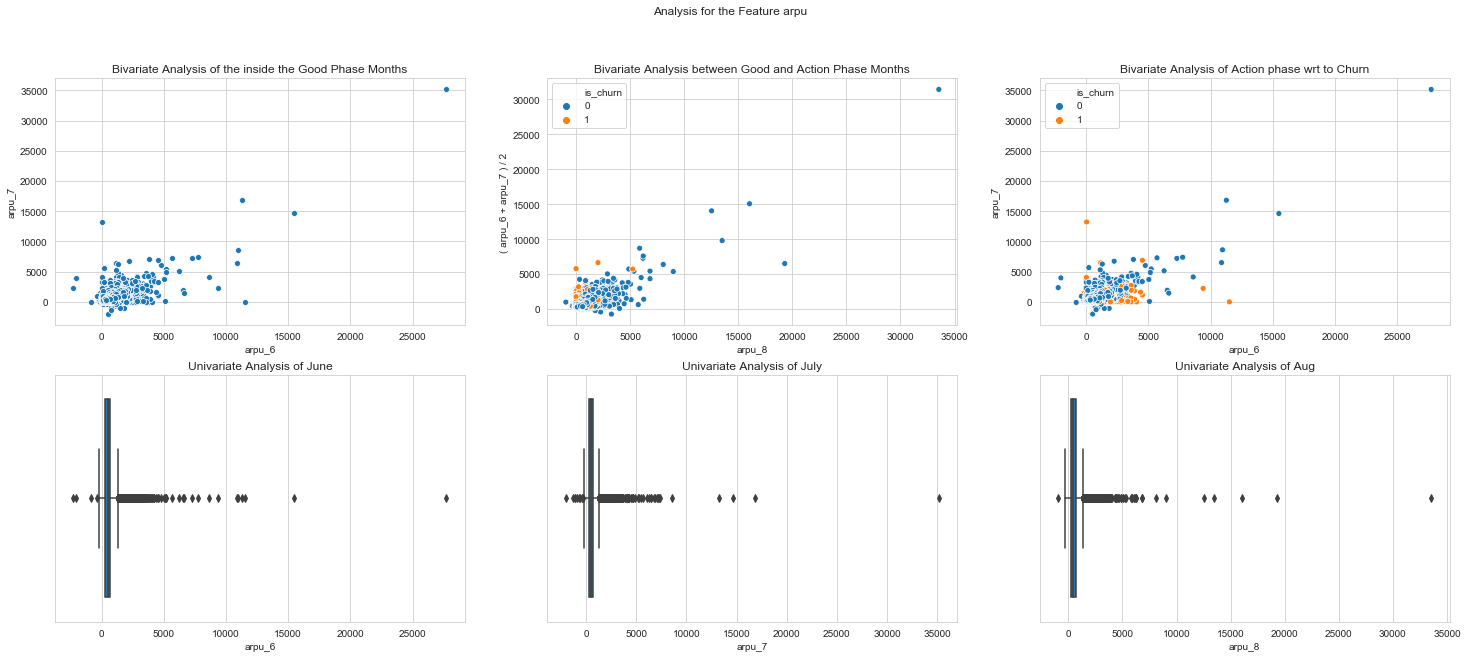

In [61]:
# Analysis of Individual Features with their good and action phase and wrt to Churn Phase
plt.figure(figsize=(25,10))
plt.suptitle('Analysis for the Feature arpu')
plt.subplot(2,3,1)
plt.title('Bivariate Analysis of the inside the Good Phase Months')
sns.scatterplot(tel_churn_data['arpu_6'], tel_churn_data['arpu_7'] )

plt.subplot(2,3,2)
plt.title('Bivariate Analysis between Good and Action Phase Months')
sns.scatterplot(tel_churn_data['arpu_8'], ( tel_churn_data['arpu_6'] + tel_churn_data['arpu_7'] ) / 2, hue = tel_churn_data['is_churn'])
plt.ylabel('( arpu_6 + arpu_7 ) / 2')

plt.subplot(2,3,3)
plt.title('Bivariate Analysis of Action phase wrt to Churn')
sns.scatterplot(tel_churn_data['arpu_6'], tel_churn_data['arpu_7'], hue = tel_churn_data['is_churn'])

plt.subplot(2,3,4)
plt.title('Univariate Analysis of June')
sns.boxplot(tel_churn_data['arpu_6'])

plt.subplot(2,3,5)
plt.title('Univariate Analysis of July')
sns.boxplot(tel_churn_data['arpu_7'])

plt.subplot(2,3,6)
plt.title('Univariate Analysis of Aug')
sns.boxplot(tel_churn_data['arpu_8'])

plt.show()

**Conclusion Driven**:
1. As we can see from the bivariate Analysis,
 - Between June and July, the arpu in July is very less as compared to June for the churned customer
 - And similarly between avg of arpu for June and July, the arpu is nearly eauivalent to June, we can see for the plot when we plotted between arpu for August and avg of June and July

2. For the box plot, we can see that the arpu for all the three months has a quite good spread 

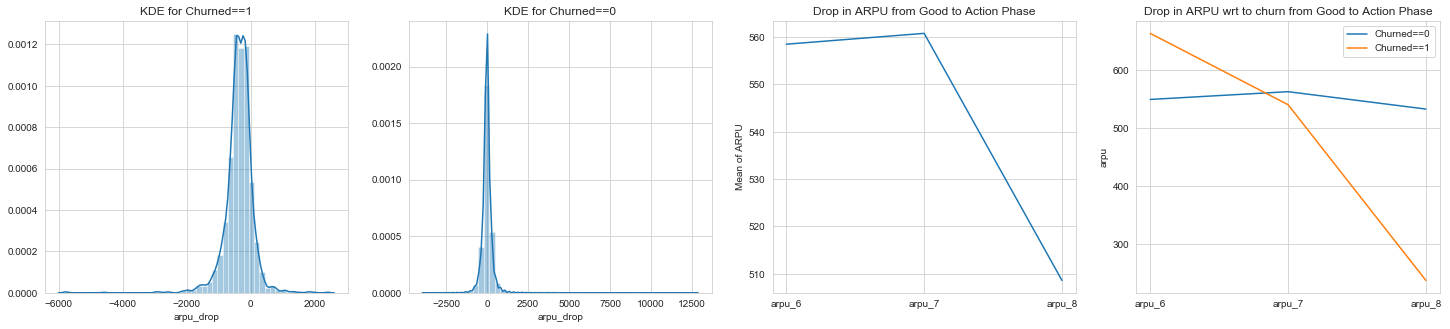

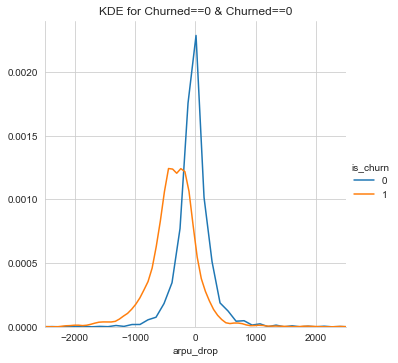

In [62]:
# PLoting the KDE of arpu_drop_3g
# So as to analyze the ARPU Drop for 3g
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.distplot(tel_churn_data.loc[tel_churn_data['is_churn']==1, 'arpu_drop'])
plt.title('KDE for Churned==1')

plt.subplot(1,4,2)
sns.distplot(tel_churn_data.loc[tel_churn_data['is_churn']==0, 'arpu_drop'] )
plt.title('KDE for Churned==0')

plt.subplot(1,4,3)
plt.title('Drop in ARPU from Good to Action Phase')
plt.plot(tel_churn_data[['arpu_6', 'arpu_7', 'arpu_8']].mean())
plt.ylabel('Mean of ARPU')

plt.subplot(1,4,4)
plt.title('Drop in ARPU wrt to churn from Good to Action Phase')
plt.plot(tel_churn_data.groupby('is_churn')['arpu_6', 'arpu_7', 'arpu_8'].mean().T)
plt.legend(['Churned==0', 'Churned==1'])
plt.ylabel('arpu')

sns.FacetGrid(tel_churn_data,hue='is_churn', size=5, xlim=(-2500, 2500) ).map(sns.distplot,"arpu_drop", hist = False).add_legend()
plt.title('KDE for Churned==0 & Churned==0')
plt.show()

**Conclusion Driven**
1. From the line plot we can see that there is a significant drop in arpu between month of June and July
2. From the KDE Plot it can we can see when the arpu drop is between (-500, -2000 ), there is a high chance of Churned

Text(0, 0.5, 'total_og_mou')

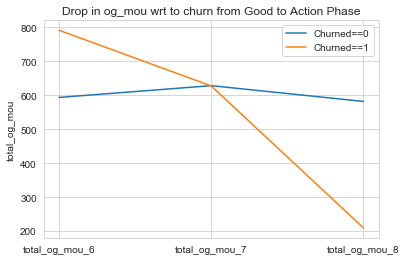

In [63]:
# Plotting for total_og_mou
plt.title('Drop in og_mou wrt to churn from Good to Action Phase')
plt.plot(tel_churn_data.groupby('is_churn')['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'].mean().T)
plt.legend(['Churned==0', 'Churned==1'])
plt.ylabel('total_og_mou')

**Conclusion Driven**
1. As we can see the average og_mou for Churned Customer has dropped significantly from June to Aug, but for Not Churned customer it's nearly the same

Text(0, 0.5, 'total_ic_mou')

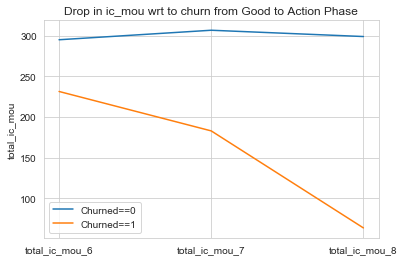

In [64]:
# Plotting for total_ic_mou
plt.title('Drop in ic_mou wrt to churn from Good to Action Phase')
plt.plot(tel_churn_data.groupby('is_churn')['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'].mean().T)
plt.legend(['Churned==0', 'Churned==1'])
plt.ylabel('total_ic_mou')

**Conclusion Driven**
As we can see for the Churned Customer the avg of total_ic_mou has dropped a lot from June to Aug and it is also lesser than the not churned customer & for the non churned customer, the avg value is nearly same for all the three months 

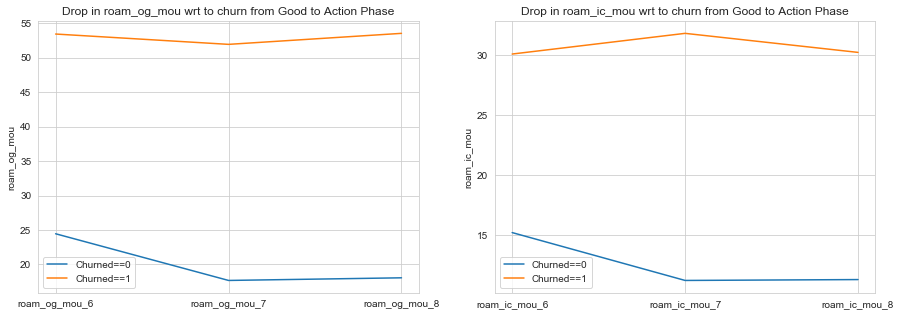

In [65]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

# Plotting for roam_og_mou
plt.title('Drop in roam_og_mou wrt to churn from Good to Action Phase')
plt.plot(tel_churn_data.groupby('is_churn')['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'].mean().T)
plt.legend(['Churned==0', 'Churned==1'])
plt.ylabel('roam_og_mou')

plt.subplot(1,2,2)
# Plotting for roam_ic_mou
plt.title('Drop in roam_ic_mou wrt to churn from Good to Action Phase')
plt.plot(tel_churn_data.groupby('is_churn')['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'].mean().T)
plt.legend(['Churned==0', 'Churned==1'])
plt.ylabel('roam_ic_mou')
plt.show()

**Conclusion Driven**
1. As we can see the customer who has churned they have a high roaming mou, for all the three months for both incoming and outgoing, while for the not-churned customer we have a complete different story, they are very less

#### Outlier Analyze

In [66]:
print("Shape of the Dataframe: {0}".format(tel_churn_data.shape))

Shape of the Dataframe: (30001, 163)


In [67]:
# Determining the outlier based on IQR methoq
# # If the values is < Q1 - ( 1.5 * IQR) and > Q3 + (1.5 * IQR) is considered as Outlier
df_numerical_col = tel_churn_data.select_dtypes(np.number).columns.tolist()
df_numerical_col.remove('is_churn')
numdf = tel_churn_data[df_numerical_col]
Q1 = numdf.quantile(0.25)
Q3 = numdf.quantile(0.75)
IQR = Q3 - Q1
outlier_cnt_df = pd.DataFrame(((numdf < (Q1 - 1.5 * IQR)) | (numdf > ( Q3 + 1.5 * IQR))).sum(), columns= ['No of Outlier'])
outlier_cnt_df.sort_values(by = 'No of Outlier', ascending = False, inplace = True )
outlier_cnt_df

No of Outlier
arpu_drop_3g                      11609
arpu_drop_2g                      10391
ic_others_7                        7688
isd_ic_mou_8                       7568
loc_og_t2c_mou_6                   7524
isd_ic_mou_7                       7423
og_others_6                        7395
count_rech_3g_7                    7379
count_rech_3g_6                    7375
loc_og_t2c_mou_8                   7298
isd_ic_mou_6                       7171
loc_og_t2c_mou_7                   7169
spl_ic_mou_6                       7125
total_rech_data_amt_drop           7109
ic_others_8                        6986
roam_og_mou_6                      6919
roam_ic_mou_6                      6899
std_ic_t2f_mou_6                   6874
ic_others_6                        6839
std_ic_t2f_mou_8                   6801
count_rech_3g_8                    6649
std_ic_t2f_mou_7                   6615
roam_ic_mou_8                      6512
roam_og_mou_8                      6488
arpu_3g_8                          6410
arpu_2g_8                          5964
arpu_3g_7                          5794
arpu_3g_6                          5759
roam_og_mou_7                      5658
roam_ic_mou_7                      5602
...                                 ...
loc_ic_mou_7                       2016
offnet_mou_8                       2008
total_ic_mou_7                     1995
loc_ic_mou_6                       1990
offnet_mou_6                       1977
offnet_mou_7                       1976
total_ic_mou_8                     1956
total_ic_mou_6                     1950
total_rech_num_8                   1660
total_rech_num_7                   1624
total_rech_num_6                   1587
total_og_mou_8                     1557
max_rech_amt_8                     1516
arpu_7                             1453
total_rech_amt_7                   1390
total_og_mou_6                     1366
arpu_6                             1365
og_others_8                        1345
arpu_8                             1339
last_day_rch_amt_6                 1330
total_rech_amt_6                   1313
total_og_mou_7                     1297
last_day_rch_amt_7                 1274
total_rech_amt_8                   1267
last_day_rch_amt_8                 1079
og_others_7                         690
max_rech_data_7                     491
max_rech_data_6                     490
max_rech_data_8                     482
aon                                  51

[145 rows x 1 columns]

In [68]:
print(" Number of columns with outlier: {0}".format(outlier_cnt_df.shape[0]))

 Number of columns with outlier: 145


In [69]:
tel_churn_data_copy = tel_churn_data.copy()
# Interpretting the Outlier with NaN values
for col in df_numerical_col:
  index_list = []
  numdf = tel_churn_data_copy[col]
  Q1 = numdf.quantile(0.25)
  Q3 = numdf.quantile(0.75)
  IQR = Q3 - Q1
  index_list = numdf[((numdf < (Q1 - 1.5 * IQR)) | (numdf > ( Q3 + 1.5 * IQR)))].index.tolist()
  tel_churn_data_copy.loc[index_list, col] = np.nan

In [70]:
# Checking the Null Values
tel_churn_data_copy.isna().sum().sort_values(ascending=False)

arpu_drop_3g                11609
arpu_drop_2g                10391
ic_others_7                  7688
isd_ic_mou_8                 7568
loc_og_t2c_mou_6             7524
isd_ic_mou_7                 7423
og_others_6                  7395
count_rech_3g_7              7379
count_rech_3g_6              7375
loc_og_t2c_mou_8             7298
isd_ic_mou_6                 7171
loc_og_t2c_mou_7             7169
spl_ic_mou_6                 7125
total_rech_data_amt_drop     7109
ic_others_8                  6986
roam_og_mou_6                6919
roam_ic_mou_6                6899
std_ic_t2f_mou_6             6874
ic_others_6                  6839
std_ic_t2f_mou_8             6801
count_rech_3g_8              6649
std_ic_t2f_mou_7             6615
roam_ic_mou_8                6512
roam_og_mou_8                6488
arpu_3g_8                    6410
arpu_2g_8                    5964
arpu_3g_7                    5794
arpu_3g_6                    5759
roam_og_mou_7                5658
roam_ic_mou_7 

In [71]:
# Consider only the columns which has Null Values
col_to_consider = tel_churn_data_copy.loc[:,tel_churn_data_copy.isna().sum() > 0].columns.tolist()
df_tmp = tel_churn_data_copy[col_to_consider]

In [72]:
# Imputing all the Null Values with Iterative Impute
# Only the constraint is we are using the nearest feature as 5
df_tmp = IterativeImputer(random_state=42, verbose=2 , skip_complete=True,n_nearest_features=5,
                              sample_posterior=True, imputation_order='random').fit_transform(df_tmp)
df_tmp = pd.DataFrame(df_tmp,columns=col_to_consider )

[IterativeImputer] Completing matrix with shape (30001, 145)
[IterativeImputer] Ending imputation round 1/10, elapsed time 7.02
[IterativeImputer] Ending imputation round 2/10, elapsed time 9.44
[IterativeImputer] Ending imputation round 3/10, elapsed time 12.38
[IterativeImputer] Ending imputation round 4/10, elapsed time 14.41
[IterativeImputer] Ending imputation round 5/10, elapsed time 17.69
[IterativeImputer] Ending imputation round 6/10, elapsed time 29.13
[IterativeImputer] Ending imputation round 7/10, elapsed time 34.64
[IterativeImputer] Ending imputation round 8/10, elapsed time 41.28
[IterativeImputer] Ending imputation round 9/10, elapsed time 45.84
[IterativeImputer] Ending imputation round 10/10, elapsed time 53.97


In [73]:
# Replacing with original Data points(with NaN) with actual values 
tel_churn_data_copy[col_to_consider] = df_tmp
# Checking the Null Values
tel_churn_data_copy.isna().sum().sort_values(ascending=False)

total_rech_data_amt_drop    0
std_og_t2f_mou_8            0
loc_ic_t2t_mou_8            0
loc_ic_t2t_mou_7            0
loc_ic_t2t_mou_6            0
total_og_mou_8              0
total_og_mou_7              0
total_og_mou_6              0
og_others_8                 0
og_others_7                 0
og_others_6                 0
spl_og_mou_8                0
spl_og_mou_7                0
spl_og_mou_6                0
isd_og_mou_8                0
isd_og_mou_7                0
isd_og_mou_6                0
std_og_mou_8                0
std_og_mou_7                0
loc_ic_t2m_mou_6            0
loc_ic_t2m_mou_7            0
loc_ic_t2m_mou_8            0
std_ic_t2m_mou_6            0
std_ic_mou_7                0
std_ic_mou_6                0
std_ic_t2f_mou_8            0
std_ic_t2f_mou_7            0
std_ic_t2f_mou_6            0
std_ic_t2m_mou_8            0
std_ic_t2m_mou_7            0
                           ..
ic_others_8                 0
ic_others_7                 0
ic_others_

8076
count    30001.000000
mean         3.005763
std          7.919119
min        -24.490000
25%          0.000000
50%          0.000000
75%          0.740000
max         52.280000
Name: arpu_3g_8, dtype: float64


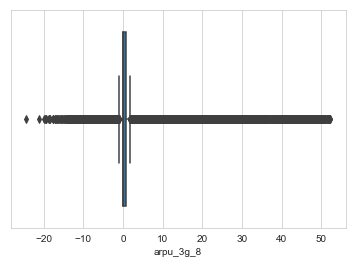

In [74]:
# Checking the distribution after impute
sns.boxplot(tel_churn_data_copy['arpu_3g_8'])
numdf = tel_churn_data_copy['arpu_3g_8']
Q1 = numdf.quantile(0.25)
Q3 = numdf.quantile(0.75)
IQR = Q3 - Q1
print(((numdf < (Q1 - 1.5 * IQR)) | (numdf > ( Q3 + 1.5 * IQR))).sum())
print(tel_churn_data_copy['arpu_3g_8'].describe())

count    30001.000000
mean        62.773480
std        170.173104
min        -24.490000
25%          0.000000
50%          0.000000
75%         20.920000
max       3716.900000
Name: arpu_3g_8, dtype: float64


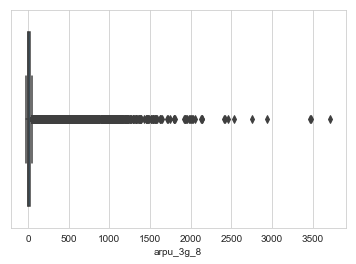

In [75]:
# Checking the distribution prior impute
sns.boxplot(tel_churn_data['arpu_3g_8'])
print(tel_churn_data['arpu_3g_8'].describe())

**Conclusion Driven**:
1. It can be seen properly clearly, that there were a lot of outliers, but after impute the Outliers has been reduced

In [76]:
# Assigning the imputed values to original Data Frame
tel_churn_data = tel_churn_data_copy

In [77]:
# Checking the number of Outlier after Imputing the Oultier Data POint with Iterative Impute
df_numerical_col = tel_churn_data.select_dtypes(np.number).columns.tolist()
df_numerical_col.remove('is_churn')
numdf = tel_churn_data[df_numerical_col]
Q1 = numdf.quantile(0.25)
Q3 = numdf.quantile(0.75)
IQR = Q3 - Q1
outlier_cnt_df = pd.DataFrame(((numdf < (Q1 - 1.5 * IQR)) | (numdf > ( Q3 + 1.5 * IQR))).sum(), columns= ['No of Outlier'])
outlier_cnt_df.sort_values(by = 'No of Outlier', ascending = False, inplace = True )
outlier_cnt_df

No of Outlier
arpu_3g_6                    9005
std_ic_t2f_mou_8             8753
loc_og_t2c_mou_8             8739
sachet_2g_7                  8627
ic_others_8                  8596
sachet_2g_8                  8550
std_ic_t2f_mou_7             8391
loc_og_t2c_mou_7             8297
ic_others_6                  8253
std_ic_t2f_mou_6             8208
arpu_3g_8                    8076
loc_og_t2c_mou_6             7898
ic_others_7                  7688
isd_ic_mou_8                 7568
arpu_drop_3g                 7475
isd_ic_mou_7                 7423
og_others_6                  7395
count_rech_3g_7              7379
count_rech_3g_6              7375
isd_ic_mou_6                 7171
arpu_3g_7                    7151
spl_ic_mou_6                 7125
sachet_2g_6                  7115
roam_og_mou_6                6919
roam_ic_mou_6                6899
count_rech_3g_8              6649
roam_ic_mou_8                6512
roam_og_mou_8                6488
arpu_drop_2g                 6411
arpu_2g_8                    5823
...                           ...
total_ic_mou_6                490
loc_og_mou_6                  486
total_ic_mou_7                486
loc_ic_mou_8                  443
offnet_mou_8                  428
total_ic_mou_8                423
loc_ic_t2m_mou_7              408
total_rech_num_7              382
total_rech_num_8              373
total_rech_num_6              367
loc_ic_t2m_mou_8              354
total_og_mou_8                334
max_rech_amt_8                330
total_og_mou_7                314
arpu_7                        313
total_rech_amt_7              289
total_rech_amt_6              271
arpu_6                        255
total_rech_amt_8              241
total_og_mou_6                235
arpu_8                        217
count_rech_2g_6                42
count_rech_2g_8                11
count_rech_2g_7                10
aon                             6
last_day_rch_amt_7              3
last_day_rch_amt_8              2
max_rech_data_8                 0
max_rech_data_7                 0
max_rech_data_6                 0

[145 rows x 1 columns]

**Conclusion Driven**
1. As we can see the outlier still exists, possible reason is when we have imputed the value, we have taken the n_nearest_feature as 5, and we all know no, of outliers features were 145, and all of them had a huge number of outliers possible reason all of the nearby features also having huge number of outliers hence it is still having outliers

In [78]:
tel_churn_data['arpu_3g_6'].describe()

count    30001.000000
mean         5.846316
std         16.810089
min        -55.203798
25%          0.000000
50%          0.000000
75%          0.810000
max         87.490000
Name: arpu_3g_6, dtype: float64

In [79]:
# So as to remove the rest of outlier we are following the mixture of 
# Winsorization Technique and also 3 Sigma Rule 
# For all the outliers we will cap the outlier values, with the value as (mean +/- 3 * std) 

def cap_outliers(val):
   upper_limit = val.mean() + 3*val.std()
   lower_limit = val.mean() - 3*val.std()
   val[val<lower_limit] = lower_limit
   val[val>upper_limit] = upper_limit
   return val

# Getting only the float values
numcols = tel_churn_data.select_dtypes(['float64']).columns.tolist()

tel_churn_data[numcols] = tel_churn_data[numcols].apply(cap_outliers, axis=0)

In [80]:
# Checking the number of Outlier after Imputing the Oultier Data POint with Iterative Impute
df_numerical_col = tel_churn_data.select_dtypes(np.number).columns.tolist()
df_numerical_col.remove('is_churn')
numdf = tel_churn_data[df_numerical_col]
Q1 = numdf.quantile(0.25)
Q3 = numdf.quantile(0.75)
IQR = Q3 - Q1
outlier_cnt_df = pd.DataFrame(((numdf < (Q1 - 1.5 * IQR)) | (numdf > ( Q3 + 1.5 * IQR))).sum(), columns= ['No of Outlier'])
outlier_cnt_df.sort_values(by = 'No of Outlier', ascending = False, inplace = True )
outlier_cnt_df

No of Outlier
arpu_3g_6                    9005
std_ic_t2f_mou_8             8753
loc_og_t2c_mou_8             8739
sachet_2g_7                  8627
ic_others_8                  8596
sachet_2g_8                  8550
std_ic_t2f_mou_7             8391
loc_og_t2c_mou_7             8297
ic_others_6                  8253
std_ic_t2f_mou_6             8208
arpu_3g_8                    8076
loc_og_t2c_mou_6             7898
ic_others_7                  7688
isd_ic_mou_8                 7568
arpu_drop_3g                 7475
isd_ic_mou_7                 7423
og_others_6                  7395
count_rech_3g_7              7379
count_rech_3g_6              7375
isd_ic_mou_6                 7171
arpu_3g_7                    7151
spl_ic_mou_6                 7125
sachet_2g_6                  7115
roam_og_mou_6                6919
roam_ic_mou_6                6899
count_rech_3g_8              6649
roam_ic_mou_8                6512
roam_og_mou_8                6488
arpu_drop_2g                 6411
arpu_2g_8                    5823
...                           ...
total_ic_mou_6                490
loc_og_mou_6                  486
total_ic_mou_7                486
loc_ic_mou_8                  443
offnet_mou_8                  428
total_ic_mou_8                423
loc_ic_t2m_mou_7              408
total_rech_num_7              382
total_rech_num_8              373
total_rech_num_6              367
loc_ic_t2m_mou_8              354
total_og_mou_8                334
max_rech_amt_8                328
total_og_mou_7                314
arpu_7                        313
total_rech_amt_7              289
total_rech_amt_6              271
arpu_6                        255
total_rech_amt_8              241
total_og_mou_6                235
arpu_8                        217
aon                             6
count_rech_2g_7                 4
last_day_rch_amt_7              3
count_rech_2g_6                 1
count_rech_2g_8                 0
max_rech_data_8                 0
max_rech_data_7                 0
max_rech_data_6                 0
last_day_rch_amt_8              0

[145 rows x 1 columns]

**Conclusion Driven**
As we can outlier still exists, why because there are lot of data points between that lies betwen 75% + 1.5 * IQR, 25% - 1.5 * IQR, hence as per the formula when we are replacing the outlier with with the value as (mean +/- 3 * std) , still theoutlier existis

In [81]:
# As we can see from there is a signifant drop  in max value
tel_churn_data['arpu_3g_6'].describe()

count    30001.000000
mean         5.302950
std         14.753689
min        -44.583950
25%          0.000000
50%          0.000000
75%          0.810000
max         56.276582
Name: arpu_3g_6, dtype: float64

### Feature Scaling

In [82]:
# Dividing the Dataframe into Dependent and Independent Variable
X = tel_churn_data.drop('is_churn', axis = 1)
y = tel_churn_data['is_churn']

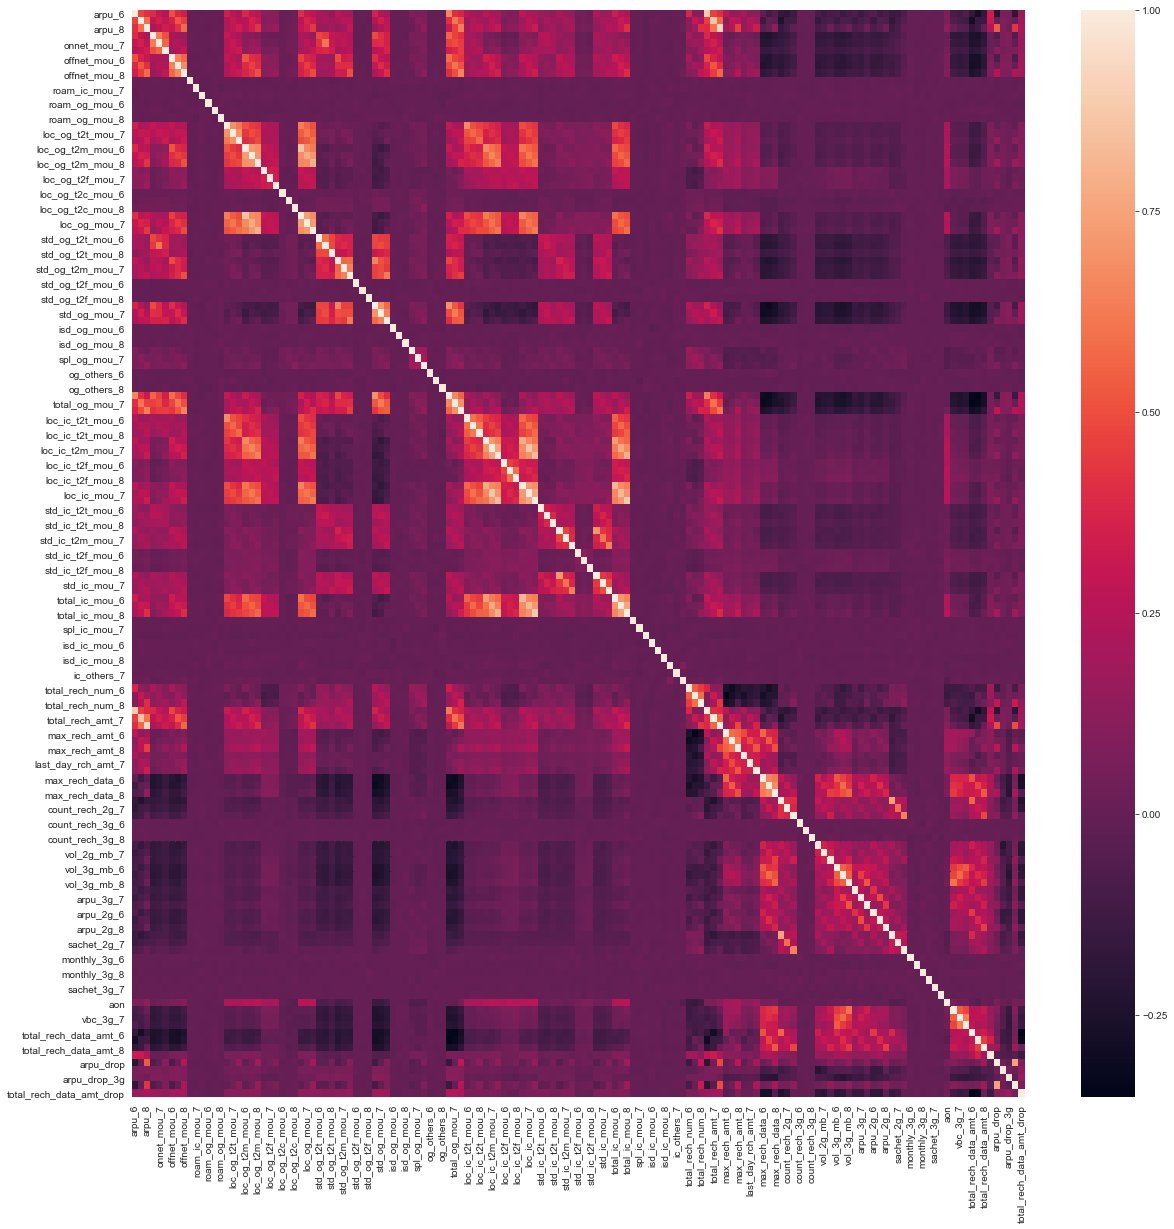

In [83]:
# Ploting the correlarion for all the features
plt.figure(figsize=(20,20))
sns.heatmap(X.corr())
# It's very difficult to interpret whether multicollinearity exits or not

In [84]:
# Determining the Correlation among the variable
df_corr = X.corr().unstack().sort_values(ascending=False)
df_corr = df_corr[df_corr != 1].reset_index()
df_corr = df_corr.iloc[::2,]
df_corr = df_corr.reset_index().drop('index', axis = 1)
df_corr

level_0                   level_1         0
0                        arpu_8          total_rech_amt_8  0.924456
1              total_rech_amt_6                    arpu_6  0.882085
2                  loc_ic_mou_8            total_ic_mou_8  0.868171
3              loc_ic_t2m_mou_7              loc_ic_mou_7  0.867321
4                        arpu_7          total_rech_amt_7  0.860612
5              loc_og_t2m_mou_6              loc_og_mou_6  0.856922
6                  loc_ic_mou_8          loc_ic_t2m_mou_8  0.832052
7                  loc_ic_mou_7            total_ic_mou_7  0.820953
8                total_ic_mou_6              loc_ic_mou_6  0.812522
9              loc_og_t2m_mou_8              loc_og_mou_8  0.789753
10               total_ic_mou_8          loc_ic_t2m_mou_8  0.786148
11                 loc_ic_mou_6          loc_ic_t2m_mou_6  0.780597
12             loc_og_t2m_mou_7              loc_og_mou_7  0.775718
13               total_ic_mou_7          loc_ic_t2m_mou_7  0.769831
14                 loc_ic_mou_7              loc_ic_mou_8  0.762319
15             loc_ic_t2m_mou_8          loc_ic_t2m_mou_7  0.752739
16               total_ic_mou_8            total_ic_mou_7  0.752327
17                  sachet_2g_6           count_rech_2g_6  0.748997
18                    arpu_drop       total_rech_amt_drop  0.742060
19                 loc_og_mou_6              loc_og_mou_7  0.734099
20             loc_og_t2m_mou_7          loc_og_t2m_mou_6  0.722938
21                 loc_og_mou_7              loc_og_mou_8  0.722530
22             loc_ic_t2m_mou_7              loc_ic_mou_8  0.720902
23               total_ic_mou_6          loc_ic_t2m_mou_6  0.720213
24                 loc_ic_mou_7              loc_ic_mou_6  0.720017
25             loc_ic_t2m_mou_7          loc_ic_t2m_mou_6  0.718665
26             loc_og_t2m_mou_8          loc_og_t2m_mou_7  0.714166
27               total_ic_mou_7            total_ic_mou_6  0.713993
28                 std_ic_mou_6          std_ic_t2m_mou_6  0.711950
29             loc_og_t2m_mou_7              loc_og_mou_8  0.711201
...                         ...                       ...       ...
10410           max_rech_data_7          total_rech_num_6 -0.271179
10411          total_rech_num_7           max_rech_data_6 -0.272865
10412     total_rech_data_amt_7                    arpu_6 -0.275316
10413            total_og_mou_6     total_rech_data_amt_8 -0.275559
10414              std_og_mou_6     total_rech_data_amt_6 -0.278352
10415           max_rech_data_8              std_og_mou_6 -0.279140
10416     total_rech_data_amt_6              std_og_mou_7 -0.280041
10417            max_rech_amt_6          total_rech_num_8 -0.282050
10418     total_rech_data_amt_6              offnet_mou_7 -0.282349
10419     total_rech_data_amt_6                    arpu_7 -0.283604
10420     total_rech_data_amt_6          total_rech_amt_7 -0.283860
10421              std_og_mou_6     total_rech_data_amt_7 -0.285155
10422     total_rech_data_amt_6            total_og_mou_8 -0.287865
10423     total_rech_data_amt_7          total_rech_amt_6 -0.291018
10424              std_og_mou_7           max_rech_data_7 -0.291308
10425            total_og_mou_7           max_rech_data_7 -0.296428
10426              std_og_mou_7           max_rech_data_6 -0.296800
10427           max_rech_data_6              std_og_mou_6 -0.298775
10428            total_og_mou_6           max_rech_data_6 -0.299233
10429            max_rech_amt_7          total_rech_num_6 -0.299825
10430              std_og_mou_6           max_rech_data_7 -0.311309
10431            total_og_mou_7           max_rech_data_6 -0.314213
10432           max_rech_data_7            total_og_mou_6 -0.316397
10433     total_rech_data_amt_7  total_rech_data_amt_drop -0.319201
10434            total_og_mou_7     total_rech_data_amt_7 -0.327771
10435     total_rech_data_amt_6            total_og_mou_6 -0.331444
10436  total_rech_data_amt_drop     total_rech_data_amt_6 -0.342098
10437     to

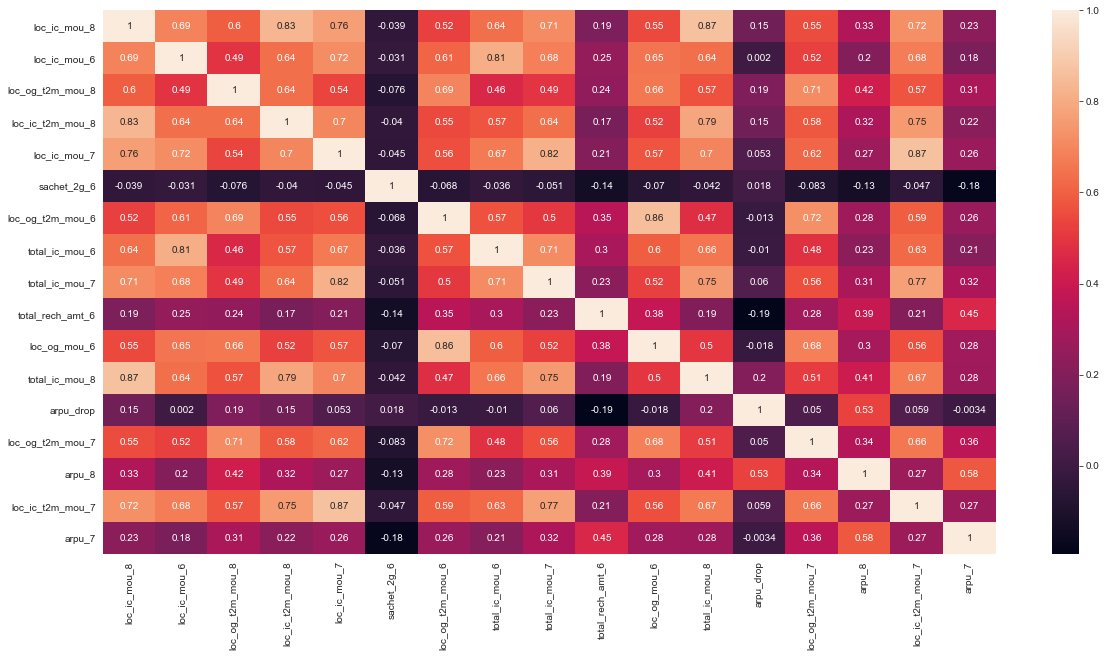

In [85]:
# Checking out the highly correlated
plt.figure(figsize=(20,10))
sns.heatmap(tel_churn_data[list(set(df_corr['level_0'].values.tolist()[:20]))].corr(), annot=True)

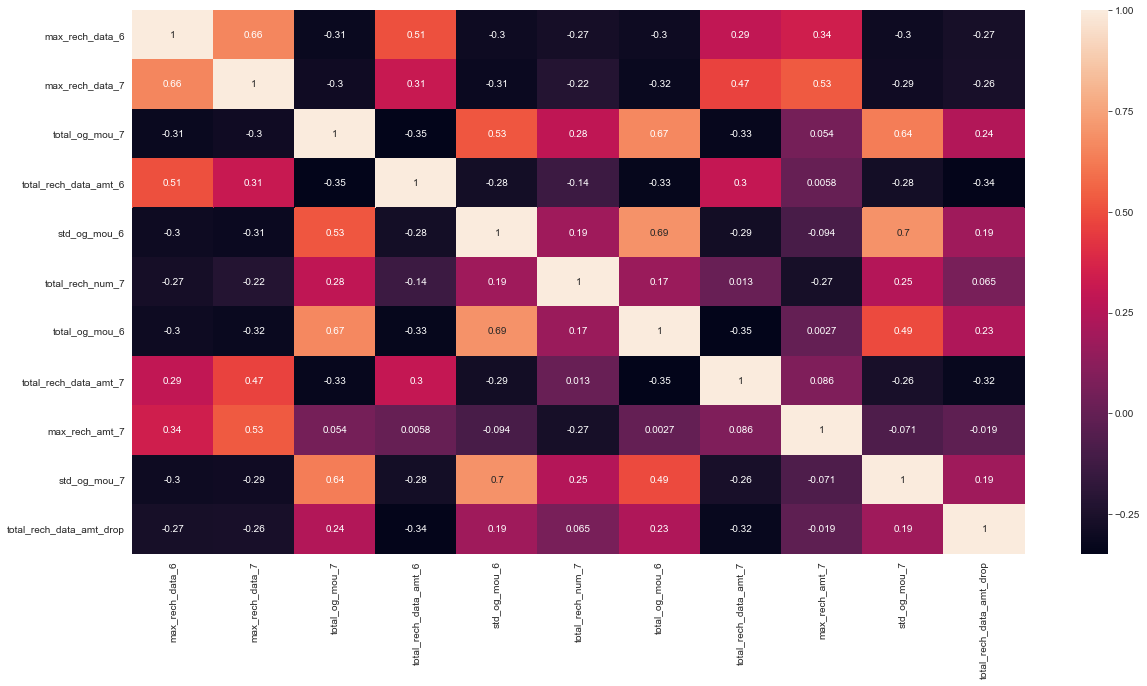

In [86]:
# Checking out the Negatively correlated values
plt.figure(figsize=(20,10))
sns.heatmap(tel_churn_data[list(set(df_corr['level_0'].values.tolist()[-20:]))].corr(), annot=True)

**Conclusion Driven**
- As it can be seen above there are lot of feature exists with High correlation, both positive and negative correlation

Now we will proceed with PCA

In [87]:
# Splitting into Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42, stratify = y.values)

#### Feature Scaling

In [88]:
# Doing Standard scalling that will do the feature Scaling
sc = StandardScaler()
X_train[numcols] = sc.fit_transform(X_train[numcols])
X_test[numcols] = sc.transform(X_test[numcols])

In [89]:
X_train.head()

last_date_of_month_7 last_date_of_month_8    arpu_6    arpu_7    arpu_8  \
25516                    1                    1 -0.131756  0.960382  0.324264   
26088                    1                    1  0.254960 -0.371561  0.833473   
29211                    1                    1 -1.470355 -1.285240 -1.349343   
21286                    1                    1 -1.327681 -1.319979 -1.092970   
6661                     1                    1 -0.043933 -0.036566 -1.078852   

       onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  ...  \
25516     1.413569    -0.714654     2.813867     -0.694675     -0.282902  ...   
26088     0.474502     0.337324     0.292100     -0.550789     -0.686415  ...   
29211    -0.869163    -0.834340    -0.790160     -1.030902     -0.860676  ...   
21286    -0.869163    -0.839696    -0.790160     -1.072403     -1.054895  ...   
6661      0.032413    -0.109739    -0.754615     -0.764473     -0.860604  ...   

       vbc_3g_6  total_rech_data_amt_6  total_rech_data_amt_7  \
25516 -0.487511              -0.701593              -0.712636   
26088  1.080000               1.901869              -0.712636   
29211 -0.487511               1.918997              -0.236111   
21286  1.806241               1.901869               1.181006   
6661  -0.487511              -0.701593              -0.712636   

       total_rech_data_amt_8  avg_rech_amt_6_7  arpu_drop  arpu_drop_2g  \
25516              -0.699761         -0.456545  -0.090505      0.274987   
26088              -0.219447         -0.068595   1.285318     -0.462054   
29211               1.521339         -0.938862  -0.145117     -0.469426   
21286               2.676311         -0.317617   0.158751      0.274987   
6661               -0.699761         -0.819593  -1.555776      0.274987   

       arpu_drop_3g  total_rech_amt_drop  total_rech_data_amt_drop  
25516      0.273489             0.002814                  0.436118  
26088     -2.237632             1.323939                 -1.638286  
29211      0.273489            -0.080240                  0.552818  
21286      0.656561             0.230727                  0.436118  
6661       0.273489            -1.617689                  0.436118  

[5 rows x 162 columns]

In [90]:
# Converting the categorical Features to numerical features
col_to_consider = X_train.select_dtypes('category').columns.tolist()
X_train[col_to_consider] = X_train[col_to_consider].astype(np.int64)
X_test[col_to_consider] = X_test[col_to_consider].astype(np.int64)

In [91]:
# Checking the class balance in Train set
y_train.value_counts()

0    19291
1     1709
Name: is_churn, dtype: int64

In [92]:
# Checking the class balance in Test set
y_test.value_counts()

0    8269
1     732
Name: is_churn, dtype: int64

### Dimensionality Reduction using PCA

In [93]:
pca = PCA(random_state=56)

In [94]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=56,
    svd_solver='auto', tol=0.0, whiten=False)

In [95]:
# To check the principal Components
pca.components_

array([[-1.30302878e-06, -5.22190784e-05,  1.09364582e-01, ...,
         4.56886920e-02, -1.26471479e-02,  7.65074638e-02],
       [ 2.63386427e-04,  1.04441532e-03,  6.45265090e-02, ...,
        -2.85035755e-02,  5.70988766e-02, -5.96185812e-03],
       [ 4.98165132e-04,  2.57556523e-03,  6.87360475e-02, ...,
        -3.81284422e-03,  8.16541892e-02,  2.45772991e-02],
       ...,
       [-6.07723599e-04, -1.36583333e-02, -3.95491253e-04, ...,
         9.68255514e-05,  1.37944323e-03, -5.49039163e-04],
       [-1.69051000e-01, -9.83994988e-01, -2.83664366e-03, ...,
         4.47210036e-04,  1.51819898e-03,  1.68225082e-03],
       [-9.85515121e-01,  1.69123509e-01, -1.29749236e-04, ...,
        -3.24544959e-04,  9.04781900e-04, -1.29709313e-04]])

In [96]:
# To check the explained variance
pca.explained_variance_ratio_.cumsum()

array([0.13344888, 0.22509212, 0.27247809, 0.30322578, 0.32882333,
       0.34814848, 0.36499984, 0.3813367 , 0.39611431, 0.41015147,
       0.42163742, 0.43197045, 0.44181935, 0.45144627, 0.46013934,
       0.46862616, 0.47697188, 0.48503854, 0.49232911, 0.49948167,
       0.50634727, 0.51310613, 0.51984215, 0.52653021, 0.53317872,
       0.53978265, 0.5463432 , 0.55289952, 0.55938833, 0.5658559 ,
       0.57228877, 0.57868294, 0.58506814, 0.59142631, 0.59777059,
       0.60408997, 0.61038172, 0.61662684, 0.62285615, 0.62906688,
       0.63522995, 0.64137774, 0.64748385, 0.65358147, 0.65965047,
       0.66568856, 0.67170534, 0.67771183, 0.68366506, 0.68959902,
       0.69550097, 0.70138146, 0.70725842, 0.71309301, 0.71889994,
       0.72469536, 0.73042872, 0.73615222, 0.74184618, 0.74750389,
       0.75309418, 0.75866545, 0.7641941 , 0.76966244, 0.77505272,
       0.78038458, 0.78566522, 0.79084231, 0.79589999, 0.80090796,
       0.80584631, 0.81065671, 0.81537231, 0.82001674, 0.82458

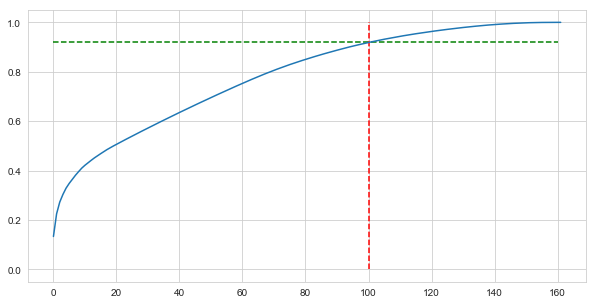

In [97]:
# To check the SCREE Plot and to decide what should be the ideal number of principal components
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.hlines(y=0.92,xmax=160,xmin=0, colors='g',linestyles='--')
plt.vlines(x=100,ymax=1,ymin=0, colors='r',linestyles='--')
plt.show()

From the above plot, it can be colcluded that 100 components will be able to explain 92% of the variance of the data.

In [98]:
pca = IncrementalPCA(n_components=100)

In [99]:
X_train_PCA = pca.fit_transform(X_train)

In [100]:
# Transform the DF with the new Principal Components
X_train_PCA_df = pd.DataFrame(X_train_PCA)
for i in range(1,len(X_train_PCA_df.columns)+1):
  X_train_PCA_df.rename(columns = {i-1:'PCA{0}'.format(i)}, inplace=True)

### Visualising the correlation

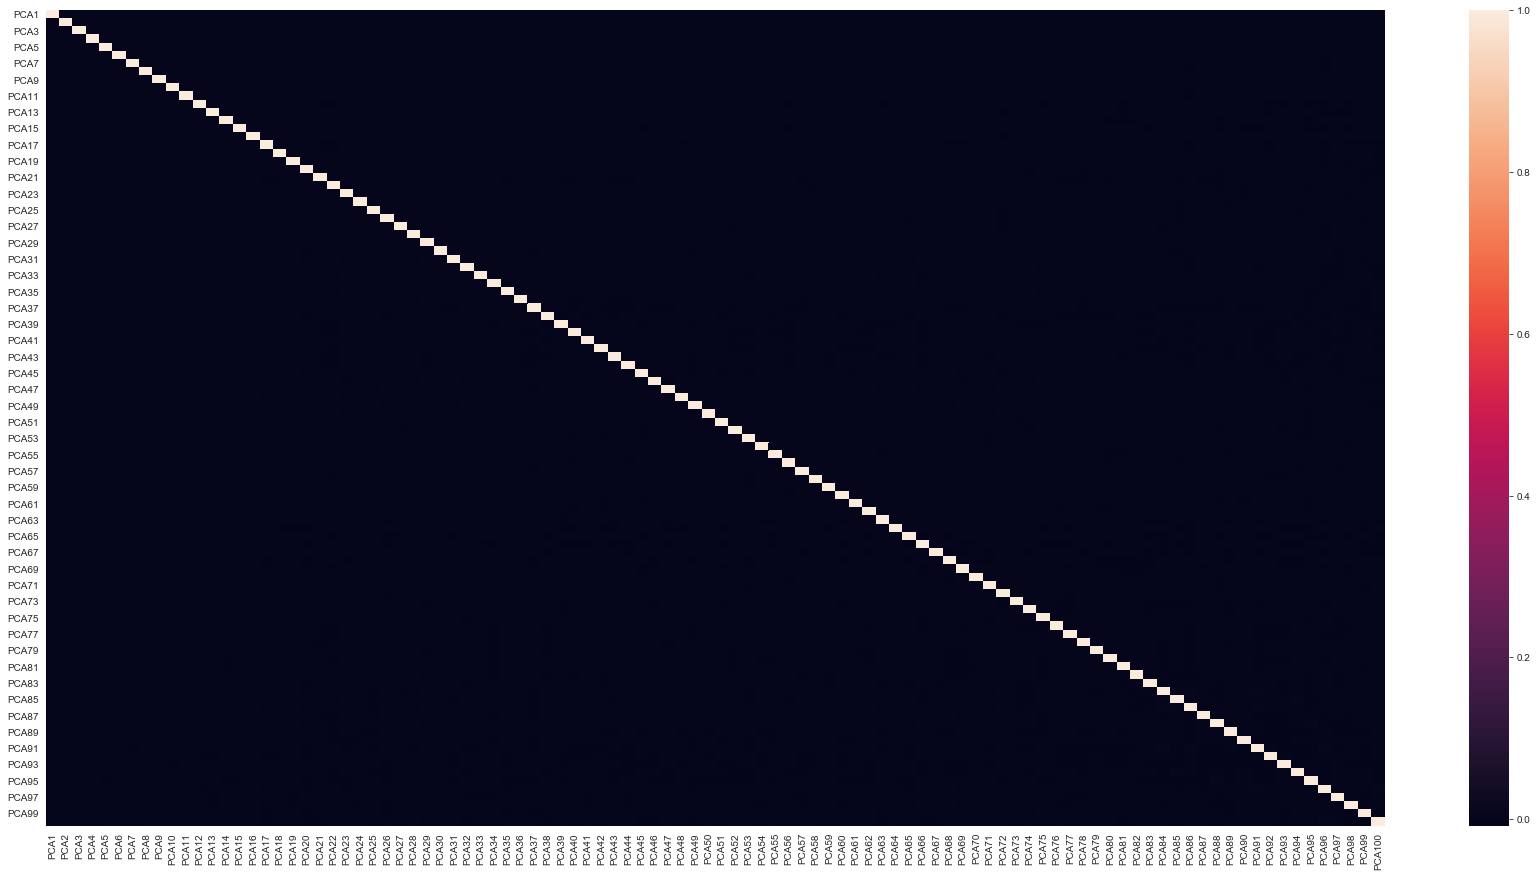

In [101]:
# To check now what is the multicollinearity, after applying the PCA
plt.figure(figsize=(30,15))
sns.heatmap(X_train_PCA_df.corr())

The heatmap above shows there are zero correlation among the variables obtained after PCA.

In [102]:
# Applying to Test Data Frame after applying the PCA
X_test_PCA = pca.transform(X_test)
X_test_PCA_df = pd.DataFrame(X_test_PCA)
for i in range(1,len(X_test_PCA_df.columns)+1):
  X_test_PCA_df.rename(columns = {i-1:'PCA{0}'.format(i)}, inplace=True)

### Fitting Logistic Regression

In [103]:
print("Shape of the data frame : {0}".format(X_train_PCA_df.shape))

Shape of the data frame : (21000, 100)


In [104]:
# Model Building ( Logistic Regression )
# Lets fit the model
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr1 = sm.GLM(y_train,X_train_PCA_sm, family=sm.families.Binomial())
res = logr1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20899
Model Family:                Binomial   Df Model:                          100
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3938.9
Date:                Mon, 27 Jan 2020   Deviance:                       7877.8
Time:                        21:01:30   Pearson chi2:                 3.03e+04
No. Iterations:                     8   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6854      0.055    -66.699      0.000      -3.794      -3.577
x1            -0.0369      0.009     -4.330      0.000      -0.054      -0.020
x2            -0.3540      0.012    -30.277      0.000      -0.377      -0.331
x3            -0.1423      0.012    -11.450      0.000      -0.167      -0.118
x4            -0.1472      0.018     -8.361      0.000      -0.182      -0.113
x5             0.4003      0.016     25.670      0.000       0.370       0.431
x6            -0.1098      0.018     -5.937      0.000      -0.146      -0.074
x7             0.2057      0.018     11.266      0.000       0.170       0.241
x8             0.1160      0.019      6.197      0.000       0.079       0.153
x9             0.0567      0.022      2.621      0.009       0.014       0.099
x10            0.0274      0.025      1.095      0.274      -0.022       0.076
x11            0.0370      0.025      1.482      0.138      -0.012       0.086
x12           -0.1391      0.027     -5.177      0.000      -0.192      -0.086
x13            0.0851      0.028      3.022      0.003       0.030       0.140
x14           -0.0995      0.029     -3.484      0.000      -0.156      -0.044
x15            0.1619      0.025      6.537      0.000       0.113       0.210
x16            0.0528      0.029      1.792      0.073      -0.005       0.111
x17            0.0061      0.028      0.221      0.825      -0.048       0.060
x18           -0.1293      0.031     -4.155      0.000      -0.190      -0.068
x19            0.0530      0.033      1.586      0.113      -0.013       0.119
x20            0.0167      0.030      0.547      0.584      -0.043       0.076
x21           -0.0516      0.032     -1.635      0.102      -0.113       0.010
x22            0.0190      0.027      0.695      0.487      -0.035       0.073
x23           -0.0033      0.029     -0.116      0.908      -0.060       0.053
x24           -0.0903      0.031     -2.872      0.004      -0.152      -0.029
x25            0.0042      0.031      0.135      0.892      -0.057       0.066
x26            0.0198      0.031      0.634      0.526      -0.041       0.081
x27           -0.0074      0.033     -0.224      0.823      -0.072       0.057
x28            0.0626      0.037      1.681      0.093      -0.010       0.136
x29           -0.0452      0.033     -1.379      0.168      -0.109       0.019
x30            0.0209      0.033      0.636      0.525      -0.043       0.085
x31            0.1083      0.029      3.704      0.000       0.051       0.166
x32            0.0230      0.029      0.792      0.428      -0.034       0.080
x33            0.0078      0.029      0.266      0.790      -0.050       0.066
x34            0.0012      0.028      0.043      0.966      -0.054       0.056
x35            0.0453      0.031      1.445      0.148      -0.016       0.107
x36            0.0140      0.031      0.451      0.652      -0.047       0.075
x3

In [105]:
X_test_PCA_sm = sm.add_constant(X_test_PCA)
y_test_pred = res.predict(X_test_PCA_sm)
# Creating a DF so as to hold all the infomtion related to prediction
preddf = pd.DataFrame({'Actual':y_test})
preddf['Probability'] = y_test_pred
preddf['Predicted'] = preddf['Probability'].map(lambda x : 1 if x > 0.5 else 0)
preddf.head()

Actual  Probability  Predicted
6587        0     0.686573          1
3080        0     0.006295          0
21632       0     0.002356          0
1366        0     0.021243          0
5341        0     0.031897          0

In [106]:
accuracy_score(preddf['Actual'], preddf['Predicted'])

0.9255638262415287

In [107]:
print(classification_report(preddf['Actual'], preddf['Predicted']))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8269
           1       0.60      0.27      0.37       732

    accuracy                           0.93      9001
   macro avg       0.77      0.62      0.66      9001
weighted avg       0.91      0.93      0.91      9001



**Conclusion Driven**: As we built the Logistic Regression model on an imbalanced data and we found that the accuracy is pretty high, but the recall for the 1 ( i.e for the churn customer ) is very low.

### Data Imbalance Handling

Using SMOTE (Synthetic Minority Oversampling Technique). 
It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class.

In [108]:
print("Before Upsampling, Number of Not Churned Customer {0}".format(sum(y_train == 0)))
print("Before Upsampling, Number of Not Churned Customer {0}".format(sum(y_train == 1)))

Before Upsampling, Number of Not Churned Customer 19291
Before Upsampling, Number of Not Churned Customer 1709


In [109]:
smote = SMOTE(random_state = 42, sampling_strategy = 'minority', ) 
X_train_samp, y_train_samp = smote.fit_sample(X_train, y_train.ravel()) 

In [110]:
print("Before Upsampling, Number of Not Churned Customer {0}".format(sum(y_train_samp == 0)))
print("Before Upsampling, Number of Not Churned Customer {0}".format(sum(y_train_samp == 1)))

Before Upsampling, Number of Not Churned Customer 19291
Before Upsampling, Number of Not Churned Customer 19291


### Dimensionality Reduction using PCA with Upsampled data

In [111]:
pca = PCA(random_state=56)
pca.fit(X_train_samp)
# To check the principal Components
pca.components_

array([[ 1.84083847e-04,  1.18547346e-03, -1.19792381e-01, ...,
        -5.05153002e-02,  5.45543306e-02, -9.61019093e-02],
       [ 1.42274891e-03,  6.12799843e-03,  5.96608238e-02, ...,
        -1.68867306e-02,  1.13567569e-01,  2.21991841e-02],
       [ 2.65997699e-03,  1.94547218e-02, -2.26141209e-02, ...,
         1.01741498e-02,  1.26667546e-01,  4.47950828e-02],
       ...,
       [-9.12403052e-04,  3.36532218e-03, -1.12898817e-03, ...,
        -2.97432858e-05,  2.01185857e-03, -1.13978372e-03],
       [-9.87907442e-01,  1.49241941e-01,  1.80075961e-03, ...,
        -1.32819985e-03,  1.11430973e-03, -8.26353145e-04],
       [-4.83901721e-03, -7.35463111e-04,  1.64267596e-04, ...,
         8.57300163e-05,  6.59146190e-04, -6.38302113e-04]])

In [112]:
# To check the explained variance
pca.explained_variance_ratio_.cumsum()

array([0.12365318, 0.23290609, 0.28108494, 0.3121176 , 0.33715252,
       0.35789977, 0.37609422, 0.3931273 , 0.40938175, 0.42391866,
       0.43582062, 0.44716248, 0.45806886, 0.46878332, 0.47912514,
       0.48905258, 0.49855828, 0.50795173, 0.51690325, 0.52540609,
       0.53375724, 0.54180736, 0.54978654, 0.55764052, 0.56523696,
       0.57258815, 0.57956336, 0.58649552, 0.59336384, 0.60012705,
       0.60662138, 0.61303249, 0.61932843, 0.62559996, 0.6317701 ,
       0.63781526, 0.64384104, 0.64983163, 0.65572586, 0.66151089,
       0.66727803, 0.67301174, 0.67867619, 0.68428915, 0.68980429,
       0.69529124, 0.70074179, 0.70616134, 0.71153881, 0.71681264,
       0.7220523 , 0.72726277, 0.73241957, 0.73751054, 0.74257851,
       0.74761201, 0.75262384, 0.75758284, 0.76252252, 0.7673631 ,
       0.77219406, 0.77700086, 0.78170188, 0.78634976, 0.79090215,
       0.79542962, 0.79990857, 0.8043477 , 0.80875501, 0.8131316 ,
       0.81748883, 0.82180014, 0.82605447, 0.83028731, 0.83447

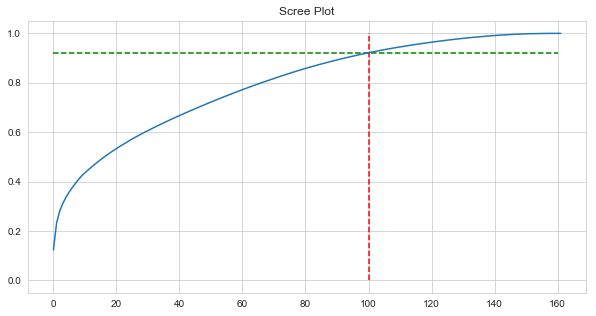

In [113]:
# To check the SCREE Plot and to decide what should be the ideal number of principal components
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.hlines(y=0.92,xmax=160,xmin=0, colors='g',linestyles='--')
plt.vlines(x=100,ymax=1,ymin=0, colors='r',linestyles='--')
plt.title('Scree Plot')
plt.show()

From the above plot, it can be colcluded that 100 components will be able to explain 92% of the variance of the data.

In [114]:
pca = IncrementalPCA(n_components=100)

In [115]:
X_train_PCA = pca.fit_transform(X_train_samp)

In [116]:
# Transform the DF with the new Principal Components
X_train_PCA_df = pd.DataFrame(X_train_PCA)
for i in range(1,len(X_train_PCA_df.columns)+1):
  X_train_PCA_df.rename(columns = {i-1:'PCA{0}'.format(i)}, inplace=True)

### Visualising the correlation

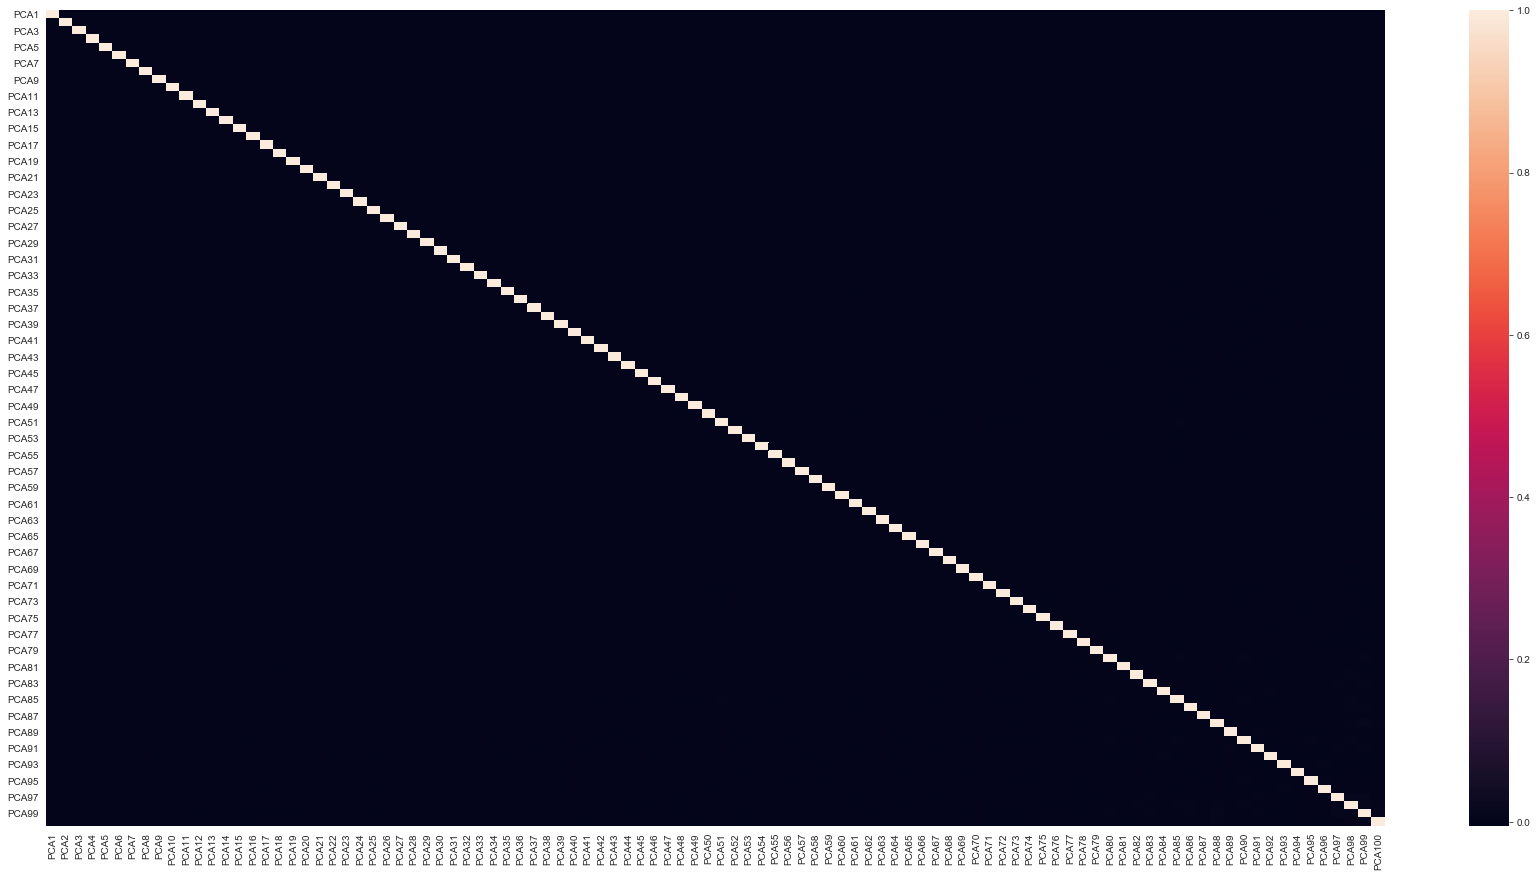

In [117]:
# To check now what is the multicollinearity, after applying the PCA
plt.figure(figsize=(30,15))
sns.heatmap(X_train_PCA_df.corr())

The heatmap above shows there are zero correlation among the variables obtained after PCA.

In [118]:
# Applying to Test Data Frame after applying the PCA
X_test_PCA = pca.transform(X_test)
X_test_PCA_df = pd.DataFrame(X_test_PCA)
for i in range(1,len(X_test_PCA_df.columns)+1):
  X_test_PCA_df.rename(columns = {i-1:'PCA{0}'.format(i)}, inplace=True)

In [119]:
print("Shape of the data frame : {0}".format(X_train_PCA_df.shape))

Shape of the data frame : (38582, 100)


In [120]:
# Model Building ( Logistic Regression )
# Lets fit the model
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr2 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38481
Model Family:                Binomial   Df Model:                          100
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13616.
Date:                Mon, 27 Jan 2020   Deviance:                       27232.
Time:                        21:01:48   Pearson chi2:                 6.02e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1261      0.017     -7.284      0.000      -0.160      -0.092
x1            -0.1676      0.004    -43.347      0.000      -0.175      -0.160
x2            -0.5533      0.006    -92.756      0.000      -0.565      -0.542
x3            -0.2830      0.007    -43.496      0.000      -0.296      -0.270
x4             0.3258      0.008     41.757      0.000       0.311       0.341
x5             0.1456      0.009     16.624      0.000       0.128       0.163
x6            -0.1587      0.010    -16.510      0.000      -0.178      -0.140
x7             0.2546      0.010     25.497      0.000       0.235       0.274
x8            -0.0283      0.010     -2.770      0.006      -0.048      -0.008
x9            -0.0809      0.012     -6.846      0.000      -0.104      -0.058
x10            0.0954      0.011      9.039      0.000       0.075       0.116
x11           -0.0549      0.012     -4.520      0.000      -0.079      -0.031
x12           -0.1001      0.012     -8.024      0.000      -0.125      -0.076
x13            0.2089      0.014     15.237      0.000       0.182       0.236
x14           -0.1237      0.013     -9.461      0.000      -0.149      -0.098
x15           -0.2764      0.014    -19.603      0.000      -0.304      -0.249
x16            0.1624      0.014     12.013      0.000       0.136       0.189
x17           -0.2389      0.015    -16.346      0.000      -0.268      -0.210
x18            0.0974      0.015      6.713      0.000       0.069       0.126
x19           -0.2074      0.015    -14.158      0.000      -0.236      -0.179
x20           -0.0183      0.015     -1.248      0.212      -0.047       0.010
x21            0.0854      0.015      5.797      0.000       0.057       0.114
x22           -0.0007      0.015     -0.047      0.962      -0.031       0.029
x23            0.1048      0.015      6.915      0.000       0.075       0.134
x24            0.0084      0.015      0.547      0.584      -0.022       0.038
x25           -0.3571      0.016    -22.520      0.000      -0.388      -0.326
x26           -0.1459      0.016     -9.038      0.000      -0.178      -0.114
x27            0.1089      0.017      6.473      0.000       0.076       0.142
x28            0.0174      0.016      1.075      0.282      -0.014       0.049
x29            0.0111      0.016      0.682      0.495      -0.021       0.043
x30            0.0931      0.016      5.654      0.000       0.061       0.125
x31           -0.1374      0.016     -8.357      0.000      -0.170      -0.105
x32            0.1678      0.017      9.889      0.000       0.135       0.201
x33            0.0442      0.017      2.622      0.009       0.011       0.077
x34           -0.0894      0.017     -5.257      0.000      -0.123      -0.056
x35            0.0466      0.017      2.783      0.005       0.014       0.079
x36           -0.1432      0.017     -8.327      0.000      -0.177      -0.109
x3

In [121]:
X_test_PCA_sm = sm.add_constant(X_test_PCA)
y_test_pred = res.predict(X_test_PCA_sm)
# Creating a DF so as to hold all the infomtion related to prediction
preddf = pd.DataFrame({'Actual':y_test})
preddf['Probability'] = y_test_pred
preddf['Predicted'] = preddf['Probability'].map(lambda x : 1 if x > 0.5 else 0)
preddf.head()

Actual  Probability  Predicted
6587        0     0.983116          1
3080        0     0.053691          0
21632       0     0.004830          0
1366        0     0.242672          0
5341        0     0.133379          0

In [122]:
confusion_matrix(preddf['Actual'], preddf['Predicted'])

array([[7010, 1259],
       [ 182,  550]])

In [123]:
accuracy_score(preddf['Actual'], preddf['Predicted'])

0.839906677035885

In [124]:
print(classification_report(preddf['Actual'], preddf['Predicted']))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      8269
           1       0.30      0.75      0.43       732

    accuracy                           0.84      9001
   macro avg       0.64      0.80      0.67      9001
weighted avg       0.92      0.84      0.87      9001



**Conlusion Driven**: As it can be seen the Recall for the class 1 increased  to 0.78. So we are proceeding with the upsampled data

### Logistic Regression Model

In [125]:
# To check what is the ROC curve and to also check what is the AUC
def draw_roc( actual, probs ):
   fpr, tpr, thresholds = roc_curve( actual, probs,
                                             drop_intermediate = False )
   auc_score = roc_auc_score( actual, probs )
   plt.figure(figsize=(6, 6))
   plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
   plt.plot([0, 1], [0, 1], 'k--')
   plt.xlim([0.0, 1.0])
   plt.ylim([0.0, 1.05])
   plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
   plt.ylabel('True Positive Rate')
   plt.title('Receiver operating characteristic example')
   plt.legend(loc="lower right")
   plt.show()

   return fpr, tpr, thresholds

In [126]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38481
Model Family:                Binomial   Df Model:                          100
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13616.
Date:                Mon, 27 Jan 2020   Deviance:                       27232.
Time:                        21:01:49   Pearson chi2:                 6.02e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1261      0.017     -7.284      0.000      -0.160      -0.092
x1            -0.1676      0.004    -43.347      0.000      -0.175      -0.160
x2            -0.5533      0.006    -92.756      0.000      -0.565      -0.542
x3            -0.2830      0.007    -43.496      0.000      -0.296      -0.270
x4             0.3258      0.008     41.757      0.000       0.311       0.341
x5             0.1456      0.009     16.624      0.000       0.128       0.163
x6            -0.1587      0.010    -16.510      0.000      -0.178      -0.140
x7             0.2546      0.010     25.497      0.000       0.235       0.274
x8            -0.0283      0.010     -2.770      0.006      -0.048      -0.008
x9            -0.0809      0.012     -6.846      0.000      -0.104      -0.058
x10            0.0954      0.011      9.039      0.000       0.075       0.116
x11           -0.0549      0.012     -4.520      0.000      -0.079      -0.031
x12           -0.1001      0.012     -8.024      0.000      -0.125      -0.076
x13            0.2089      0.014     15.237      0.000       0.182       0.236
x14           -0.1237      0.013     -9.461      0.000      -0.149      -0.098
x15           -0.2764      0.014    -19.603      0.000      -0.304      -0.249
x16            0.1624      0.014     12.013      0.000       0.136       0.189
x17           -0.2389      0.015    -16.346      0.000      -0.268      -0.210
x18            0.0974      0.015      6.713      0.000       0.069       0.126
x19           -0.2074      0.015    -14.158      0.000      -0.236      -0.179
x20           -0.0183      0.015     -1.248      0.212      -0.047       0.010
x21            0.0854      0.015      5.797      0.000       0.057       0.114
x22           -0.0007      0.015     -0.047      0.962      -0.031       0.029
x23            0.1048      0.015      6.915      0.000       0.075       0.134
x24            0.0084      0.015      0.547      0.584      -0.022       0.038
x25           -0.3571      0.016    -22.520      0.000      -0.388      -0.326
x26           -0.1459      0.016     -9.038      0.000      -0.178      -0.114
x27            0.1089      0.017      6.473      0.000       0.076       0.142
x28            0.0174      0.016      1.075      0.282      -0.014       0.049
x29            0.0111      0.016      0.682      0.495      -0.021       0.043
x30            0.0931      0.016      5.654      0.000       0.061       0.125
x31           -0.1374      0.016     -8.357      0.000      -0.170      -0.105
x32            0.1678      0.017      9.889      0.000       0.135       0.201
x33            0.0442      0.017      2.622      0.009       0.011       0.077
x34           -0.0894      0.017     -5.257      0.000      -0.123      -0.056
x35            0.0466      0.017      2.783      0.005       0.014       0.079
x36           -0.1432      0.017     -8.327      0.000      -0.177      -0.109
x3

In [127]:
# As we can x55 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[54], axis = 1, inplace = True)

In [128]:
X_train_PCA = X_train_PCA_df.values

In [129]:
# model building 3
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr3 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38482
Model Family:                Binomial   Df Model:                           99
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13616.
Date:                Mon, 27 Jan 2020   Deviance:                       27233.
Time:                        21:01:52   Pearson chi2:                 6.01e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1262      0.017     -7.291      0.000      -0.160      -0.092
x1            -0.1675      0.004    -43.344      0.000      -0.175      -0.160
x2            -0.5534      0.006    -92.758      0.000      -0.565      -0.542
x3            -0.2831      0.007    -43.515      0.000      -0.296      -0.270
x4             0.3259      0.008     41.764      0.000       0.311       0.341
x5             0.1457      0.009     16.637      0.000       0.129       0.163
x6            -0.1586      0.010    -16.505      0.000      -0.177      -0.140
x7             0.2547      0.010     25.500      0.000       0.235       0.274
x8            -0.0282      0.010     -2.765      0.006      -0.048      -0.008
x9            -0.0809      0.012     -6.844      0.000      -0.104      -0.058
x10            0.0954      0.011      9.045      0.000       0.075       0.116
x11           -0.0550      0.012     -4.522      0.000      -0.079      -0.031
x12           -0.1001      0.012     -8.025      0.000      -0.125      -0.076
x13            0.2091      0.014     15.249      0.000       0.182       0.236
x14           -0.1239      0.013     -9.476      0.000      -0.150      -0.098
x15           -0.2765      0.014    -19.605      0.000      -0.304      -0.249
x16            0.1621      0.014     11.995      0.000       0.136       0.189
x17           -0.2392      0.015    -16.367      0.000      -0.268      -0.211
x18            0.0975      0.015      6.718      0.000       0.069       0.126
x19           -0.2076      0.015    -14.176      0.000      -0.236      -0.179
x20           -0.0183      0.015     -1.244      0.214      -0.047       0.011
x21            0.0854      0.015      5.796      0.000       0.057       0.114
x22           -0.0008      0.015     -0.052      0.959      -0.031       0.029
x23            0.1048      0.015      6.919      0.000       0.075       0.135
x24            0.0082      0.015      0.538      0.591      -0.022       0.038
x25           -0.3571      0.016    -22.525      0.000      -0.388      -0.326
x26           -0.1458      0.016     -9.031      0.000      -0.177      -0.114
x27            0.1089      0.017      6.477      0.000       0.076       0.142
x28            0.0173      0.016      1.071      0.284      -0.014       0.049
x29            0.0112      0.016      0.686      0.493      -0.021       0.043
x30            0.0931      0.016      5.652      0.000       0.061       0.125
x31           -0.1375      0.016     -8.362      0.000      -0.170      -0.105
x32            0.1676      0.017      9.878      0.000       0.134       0.201
x33            0.0441      0.017      2.615      0.009       0.011       0.077
x34           -0.0893      0.017     -5.255      0.000      -0.123      -0.056
x35            0.0463      0.017      2.768      0.006       0.014       0.079
x36           -0.1432      0.017     -8.328      0.000      -0.177      -0.110
x3

In [130]:
# As we can x53 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[52], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [131]:
# model building 4
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr4 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38483
Model Family:                Binomial   Df Model:                           98
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13616.
Date:                Mon, 27 Jan 2020   Deviance:                       27233.
Time:                        21:01:56   Pearson chi2:                 6.01e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1261      0.017     -7.283      0.000      -0.160      -0.092
x1            -0.1675      0.004    -43.344      0.000      -0.175      -0.160
x2            -0.5534      0.006    -92.759      0.000      -0.565      -0.542
x3            -0.2832      0.007    -43.523      0.000      -0.296      -0.270
x4             0.3259      0.008     41.771      0.000       0.311       0.341
x5             0.1458      0.009     16.649      0.000       0.129       0.163
x6            -0.1586      0.010    -16.506      0.000      -0.177      -0.140
x7             0.2547      0.010     25.511      0.000       0.235       0.274
x8            -0.0282      0.010     -2.767      0.006      -0.048      -0.008
x9            -0.0807      0.012     -6.835      0.000      -0.104      -0.058
x10            0.0954      0.011      9.043      0.000       0.075       0.116
x11           -0.0549      0.012     -4.518      0.000      -0.079      -0.031
x12           -0.1002      0.012     -8.029      0.000      -0.125      -0.076
x13            0.2092      0.014     15.258      0.000       0.182       0.236
x14           -0.1240      0.013     -9.483      0.000      -0.150      -0.098
x15           -0.2766      0.014    -19.628      0.000      -0.304      -0.249
x16            0.1621      0.014     11.999      0.000       0.136       0.189
x17           -0.2393      0.015    -16.379      0.000      -0.268      -0.211
x18            0.0976      0.015      6.723      0.000       0.069       0.126
x19           -0.2077      0.015    -14.182      0.000      -0.236      -0.179
x20           -0.0182      0.015     -1.242      0.214      -0.047       0.011
x21            0.0854      0.015      5.797      0.000       0.057       0.114
x22           -0.0009      0.015     -0.057      0.954      -0.031       0.029
x23            0.1049      0.015      6.922      0.000       0.075       0.135
x24            0.0084      0.015      0.548      0.584      -0.022       0.038
x25           -0.3572      0.016    -22.536      0.000      -0.388      -0.326
x26           -0.1457      0.016     -9.027      0.000      -0.177      -0.114
x27            0.1090      0.017      6.484      0.000       0.076       0.142
x28            0.0173      0.016      1.068      0.285      -0.014       0.049
x29            0.0112      0.016      0.689      0.491      -0.021       0.043
x30            0.0930      0.016      5.651      0.000       0.061       0.125
x31           -0.1376      0.016     -8.372      0.000      -0.170      -0.105
x32            0.1675      0.017      9.875      0.000       0.134       0.201
x33            0.0441      0.017      2.615      0.009       0.011       0.077
x34           -0.0893      0.017     -5.252      0.000      -0.123      -0.056
x35            0.0462      0.017      2.763      0.006       0.013       0.079
x36           -0.1433      0.017     -8.336      0.000      -0.177      -0.110
x3

In [132]:
# As we can x94 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[93], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [133]:
# model building 5
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr5 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38484
Model Family:                Binomial   Df Model:                           97
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13617.
Date:                Mon, 27 Jan 2020   Deviance:                       27235.
Time:                        21:02:01   Pearson chi2:                 6.00e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.017     -7.279      0.000      -0.160      -0.092
x1            -0.1676      0.004    -43.375      0.000      -0.175      -0.160
x2            -0.5535      0.006    -92.778      0.000      -0.565      -0.542
x3            -0.2833      0.007    -43.532      0.000      -0.296      -0.271
x4             0.3263      0.008     41.830      0.000       0.311       0.342
x5             0.1454      0.009     16.614      0.000       0.128       0.163
x6            -0.1585      0.010    -16.499      0.000      -0.177      -0.140
x7             0.2549      0.010     25.532      0.000       0.235       0.274
x8            -0.0280      0.010     -2.743      0.006      -0.048      -0.008
x9            -0.0808      0.012     -6.841      0.000      -0.104      -0.058
x10            0.0953      0.011      9.030      0.000       0.075       0.116
x11           -0.0544      0.012     -4.483      0.000      -0.078      -0.031
x12           -0.1002      0.012     -8.032      0.000      -0.125      -0.076
x13            0.2095      0.014     15.279      0.000       0.183       0.236
x14           -0.1241      0.013     -9.493      0.000      -0.150      -0.098
x15           -0.2767      0.014    -19.629      0.000      -0.304      -0.249
x16            0.1616      0.014     11.966      0.000       0.135       0.188
x17           -0.2396      0.015    -16.392      0.000      -0.268      -0.211
x18            0.0976      0.015      6.726      0.000       0.069       0.126
x19           -0.2077      0.015    -14.179      0.000      -0.236      -0.179
x20           -0.0187      0.015     -1.274      0.203      -0.047       0.010
x21            0.0856      0.015      5.808      0.000       0.057       0.114
x22           -0.0011      0.015     -0.069      0.945      -0.031       0.029
x23            0.1047      0.015      6.914      0.000       0.075       0.134
x24            0.0082      0.015      0.534      0.593      -0.022       0.038
x25           -0.3572      0.016    -22.536      0.000      -0.388      -0.326
x26           -0.1460      0.016     -9.050      0.000      -0.178      -0.114
x27            0.1092      0.017      6.493      0.000       0.076       0.142
x28            0.0175      0.016      1.084      0.278      -0.014       0.049
x29            0.0108      0.016      0.663      0.507      -0.021       0.043
x30            0.0928      0.016      5.634      0.000       0.060       0.125
x31           -0.1375      0.016     -8.371      0.000      -0.170      -0.105
x32            0.1676      0.017      9.886      0.000       0.134       0.201
x33            0.0442      0.017      2.620      0.009       0.011       0.077
x34           -0.0888      0.017     -5.223      0.000      -0.122      -0.055
x35            0.0460      0.017      2.751      0.006       0.013       0.079
x36           -0.1432      0.017     -8.327      0.000      -0.177      -0.109
x3

In [134]:
# As we can x93 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[92], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [135]:
# model building 6
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr6 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38485
Model Family:                Binomial   Df Model:                           96
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13619.
Date:                Mon, 27 Jan 2020   Deviance:                       27237.
Time:                        21:02:08   Pearson chi2:                 6.03e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1258      0.017     -7.265      0.000      -0.160      -0.092
x1            -0.1674      0.004    -43.361      0.000      -0.175      -0.160
x2            -0.5534      0.006    -92.777      0.000      -0.565      -0.542
x3            -0.2832      0.007    -43.525      0.000      -0.296      -0.270
x4             0.3263      0.008     41.838      0.000       0.311       0.342
x5             0.1455      0.009     16.630      0.000       0.128       0.163
x6            -0.1587      0.010    -16.512      0.000      -0.177      -0.140
x7             0.2546      0.010     25.509      0.000       0.235       0.274
x8            -0.0279      0.010     -2.734      0.006      -0.048      -0.008
x9            -0.0807      0.012     -6.830      0.000      -0.104      -0.058
x10            0.0956      0.011      9.062      0.000       0.075       0.116
x11           -0.0539      0.012     -4.440      0.000      -0.078      -0.030
x12           -0.1003      0.012     -8.040      0.000      -0.125      -0.076
x13            0.2097      0.014     15.295      0.000       0.183       0.237
x14           -0.1243      0.013     -9.513      0.000      -0.150      -0.099
x15           -0.2767      0.014    -19.633      0.000      -0.304      -0.249
x16            0.1618      0.014     11.981      0.000       0.135       0.188
x17           -0.2395      0.015    -16.387      0.000      -0.268      -0.211
x18            0.0974      0.015      6.712      0.000       0.069       0.126
x19           -0.2077      0.015    -14.182      0.000      -0.236      -0.179
x20           -0.0192      0.015     -1.310      0.190      -0.048       0.010
x21            0.0853      0.015      5.788      0.000       0.056       0.114
x22           -0.0012      0.015     -0.077      0.939      -0.031       0.029
x23            0.1046      0.015      6.910      0.000       0.075       0.134
x24            0.0084      0.015      0.549      0.583      -0.022       0.038
x25           -0.3572      0.016    -22.535      0.000      -0.388      -0.326
x26           -0.1456      0.016     -9.022      0.000      -0.177      -0.114
x27            0.1094      0.017      6.505      0.000       0.076       0.142
x28            0.0181      0.016      1.116      0.264      -0.014       0.050
x29            0.0108      0.016      0.664      0.507      -0.021       0.043
x30            0.0923      0.016      5.610      0.000       0.060       0.125
x31           -0.1373      0.016     -8.358      0.000      -0.170      -0.105
x32            0.1673      0.017      9.867      0.000       0.134       0.201
x33            0.0442      0.017      2.622      0.009       0.011       0.077
x34           -0.0887      0.017     -5.222      0.000      -0.122      -0.055
x35            0.0462      0.017      2.761      0.006       0.013       0.079
x36           -0.1426      0.017     -8.299      0.000      -0.176      -0.109
x3

In [136]:
# As we can x50 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[49], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [137]:
# model building 7
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr7 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38486
Model Family:                Binomial   Df Model:                           95
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13619.
Date:                Mon, 27 Jan 2020   Deviance:                       27238.
Time:                        21:02:11   Pearson chi2:                 6.03e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1257      0.017     -7.260      0.000      -0.160      -0.092
x1            -0.1674      0.004    -43.368      0.000      -0.175      -0.160
x2            -0.5533      0.006    -92.831      0.000      -0.565      -0.542
x3            -0.2831      0.007    -43.531      0.000      -0.296      -0.270
x4             0.3262      0.008     41.844      0.000       0.311       0.342
x5             0.1454      0.009     16.625      0.000       0.128       0.163
x6            -0.1587      0.010    -16.515      0.000      -0.178      -0.140
x7             0.2546      0.010     25.506      0.000       0.235       0.274
x8            -0.0279      0.010     -2.730      0.006      -0.048      -0.008
x9            -0.0807      0.012     -6.831      0.000      -0.104      -0.058
x10            0.0956      0.011      9.061      0.000       0.075       0.116
x11           -0.0538      0.012     -4.434      0.000      -0.078      -0.030
x12           -0.1003      0.012     -8.037      0.000      -0.125      -0.076
x13            0.2096      0.014     15.290      0.000       0.183       0.236
x14           -0.1244      0.013     -9.517      0.000      -0.150      -0.099
x15           -0.2766      0.014    -19.629      0.000      -0.304      -0.249
x16            0.1617      0.014     11.977      0.000       0.135       0.188
x17           -0.2394      0.015    -16.383      0.000      -0.268      -0.211
x18            0.0974      0.015      6.717      0.000       0.069       0.126
x19           -0.2076      0.015    -14.179      0.000      -0.236      -0.179
x20           -0.0193      0.015     -1.312      0.190      -0.048       0.010
x21            0.0853      0.015      5.790      0.000       0.056       0.114
x22           -0.0012      0.015     -0.076      0.939      -0.031       0.029
x23            0.1046      0.015      6.908      0.000       0.075       0.134
x24            0.0084      0.015      0.552      0.581      -0.022       0.038
x25           -0.3571      0.016    -22.534      0.000      -0.388      -0.326
x26           -0.1456      0.016     -9.022      0.000      -0.177      -0.114
x27            0.1093      0.017      6.502      0.000       0.076       0.142
x28            0.0180      0.016      1.114      0.265      -0.014       0.050
x29            0.0109      0.016      0.668      0.504      -0.021       0.043
x30            0.0924      0.016      5.610      0.000       0.060       0.125
x31           -0.1373      0.016     -8.355      0.000      -0.169      -0.105
x32            0.1673      0.017      9.865      0.000       0.134       0.200
x33            0.0441      0.017      2.616      0.009       0.011       0.077
x34           -0.0887      0.017     -5.222      0.000      -0.122      -0.055
x35            0.0463      0.017      2.770      0.006       0.014       0.079
x36           -0.1427      0.017     -8.300      0.000      -0.176      -0.109
x3

In [138]:
# As we can x56 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[55], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [139]:
# model building 8
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr8 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38487
Model Family:                Binomial   Df Model:                           94
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13619.
Date:                Mon, 27 Jan 2020   Deviance:                       27238.
Time:                        21:02:13   Pearson chi2:                 6.02e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1257      0.017     -7.264      0.000      -0.160      -0.092
x1            -0.1674      0.004    -43.367      0.000      -0.175      -0.160
x2            -0.5533      0.006    -92.830      0.000      -0.565      -0.542
x3            -0.2831      0.007    -43.533      0.000      -0.296      -0.270
x4             0.3262      0.008     41.849      0.000       0.311       0.341
x5             0.1454      0.009     16.624      0.000       0.128       0.163
x6            -0.1587      0.010    -16.516      0.000      -0.178      -0.140
x7             0.2546      0.010     25.508      0.000       0.235       0.274
x8            -0.0279      0.010     -2.734      0.006      -0.048      -0.008
x9            -0.0806      0.012     -6.829      0.000      -0.104      -0.057
x10            0.0956      0.011      9.062      0.000       0.075       0.116
x11           -0.0538      0.012     -4.433      0.000      -0.078      -0.030
x12           -0.1003      0.012     -8.040      0.000      -0.125      -0.076
x13            0.2096      0.014     15.290      0.000       0.183       0.236
x14           -0.1244      0.013     -9.517      0.000      -0.150      -0.099
x15           -0.2765      0.014    -19.628      0.000      -0.304      -0.249
x16            0.1617      0.014     11.977      0.000       0.135       0.188
x17           -0.2394      0.015    -16.383      0.000      -0.268      -0.211
x18            0.0974      0.015      6.716      0.000       0.069       0.126
x19           -0.2076      0.015    -14.178      0.000      -0.236      -0.179
x20           -0.0193      0.015     -1.314      0.189      -0.048       0.009
x21            0.0853      0.015      5.790      0.000       0.056       0.114
x22           -0.0011      0.015     -0.076      0.940      -0.031       0.029
x23            0.1046      0.015      6.912      0.000       0.075       0.134
x24            0.0084      0.015      0.552      0.581      -0.021       0.038
x25           -0.3571      0.016    -22.535      0.000      -0.388      -0.326
x26           -0.1455      0.016     -9.021      0.000      -0.177      -0.114
x27            0.1093      0.017      6.504      0.000       0.076       0.142
x28            0.0180      0.016      1.112      0.266      -0.014       0.050
x29            0.0108      0.016      0.666      0.506      -0.021       0.043
x30            0.0923      0.016      5.610      0.000       0.060       0.125
x31           -0.1372      0.016     -8.353      0.000      -0.169      -0.105
x32            0.1673      0.017      9.866      0.000       0.134       0.200
x33            0.0441      0.017      2.616      0.009       0.011       0.077
x34           -0.0888      0.017     -5.224      0.000      -0.122      -0.055
x35            0.0464      0.017      2.771      0.006       0.014       0.079
x36           -0.1426      0.017     -8.299      0.000      -0.176      -0.109
x3

In [140]:
# As we can x12 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[11], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [141]:
# model building 9
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr9 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38488
Model Family:                Binomial   Df Model:                           93
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13651.
Date:                Mon, 27 Jan 2020   Deviance:                       27303.
Time:                        21:02:16   Pearson chi2:                 5.66e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1334      0.017     -7.768      0.000      -0.167      -0.100
x1            -0.1674      0.004    -43.396      0.000      -0.175      -0.160
x2            -0.5515      0.006    -92.939      0.000      -0.563      -0.540
x3            -0.2792      0.006    -43.534      0.000      -0.292      -0.267
x4             0.3240      0.008     41.752      0.000       0.309       0.339
x5             0.1433      0.009     16.421      0.000       0.126       0.160
x6            -0.1598      0.010    -16.672      0.000      -0.179      -0.141
x7             0.2540      0.010     25.494      0.000       0.234       0.273
x8            -0.0305      0.010     -3.006      0.003      -0.050      -0.011
x9            -0.0786      0.012     -6.757      0.000      -0.101      -0.056
x10            0.0946      0.011      8.992      0.000       0.074       0.115
x11           -0.0575      0.012     -4.736      0.000      -0.081      -0.034
x12            0.2014      0.013     14.957      0.000       0.175       0.228
x13           -0.1186      0.013     -9.130      0.000      -0.144      -0.093
x14           -0.2681      0.014    -19.263      0.000      -0.295      -0.241
x15            0.1602      0.013     11.894      0.000       0.134       0.187
x16           -0.2314      0.014    -16.063      0.000      -0.260      -0.203
x17            0.0972      0.014      6.782      0.000       0.069       0.125
x18           -0.2080      0.015    -14.266      0.000      -0.237      -0.179
x19           -0.0170      0.015     -1.162      0.245      -0.046       0.012
x20            0.0839      0.015      5.709      0.000       0.055       0.113
x21           -0.0033      0.015     -0.220      0.826      -0.033       0.026
x22            0.1035      0.015      6.864      0.000       0.074       0.133
x23            0.0073      0.015      0.477      0.633      -0.023       0.037
x24           -0.3535      0.016    -22.437      0.000      -0.384      -0.323
x25           -0.1485      0.016     -9.250      0.000      -0.180      -0.117
x26            0.1072      0.017      6.423      0.000       0.074       0.140
x27            0.0195      0.016      1.206      0.228      -0.012       0.051
x28            0.0106      0.016      0.653      0.514      -0.021       0.042
x29            0.0886      0.016      5.406      0.000       0.057       0.121
x30           -0.1357      0.016     -8.289      0.000      -0.168      -0.104
x31            0.1680      0.017      9.948      0.000       0.135       0.201
x32            0.0443      0.017      2.640      0.008       0.011       0.077
x33           -0.0881      0.017     -5.208      0.000      -0.121      -0.055
x34            0.0443      0.017      2.657      0.008       0.012       0.077
x35           -0.1447      0.017     -8.450      0.000      -0.178      -0.111
x36           -0.0845      0.018     -4.811      0.000      -0.119      -0.050
x3

In [142]:
# As we can x13 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[12], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [143]:
# model building 10
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr10 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38489
Model Family:                Binomial   Df Model:                           92
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13693.
Date:                Mon, 27 Jan 2020   Deviance:                       27386.
Time:                        21:02:18   Pearson chi2:                 5.45e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1467      0.017     -8.604      0.000      -0.180      -0.113
x1            -0.1682      0.004    -43.502      0.000      -0.176      -0.161
x2            -0.5503      0.006    -93.012      0.000      -0.562      -0.539
x3            -0.2761      0.006    -43.423      0.000      -0.289      -0.264
x4             0.3223      0.008     41.638      0.000       0.307       0.338
x5             0.1388      0.009     15.962      0.000       0.122       0.156
x6            -0.1597      0.010    -16.722      0.000      -0.178      -0.141
x7             0.2530      0.010     25.422      0.000       0.233       0.272
x8            -0.0327      0.010     -3.225      0.001      -0.053      -0.013
x9            -0.0804      0.012     -6.983      0.000      -0.103      -0.058
x10            0.0950      0.011      9.042      0.000       0.074       0.116
x11           -0.0648      0.012     -5.338      0.000      -0.089      -0.041
x12            0.1995      0.013     14.814      0.000       0.173       0.226
x13           -0.2613      0.014    -18.852      0.000      -0.289      -0.234
x14            0.1589      0.013     11.798      0.000       0.132       0.185
x15           -0.2230      0.014    -15.663      0.000      -0.251      -0.195
x16            0.0973      0.014      6.847      0.000       0.069       0.125
x17           -0.2080      0.015    -14.299      0.000      -0.236      -0.179
x18           -0.0140      0.015     -0.955      0.340      -0.043       0.015
x19            0.0800      0.015      5.452      0.000       0.051       0.109
x20           -0.0012      0.015     -0.079      0.937      -0.031       0.029
x21            0.0999      0.015      6.658      0.000       0.070       0.129
x22            0.0080      0.015      0.528      0.598      -0.022       0.038
x23           -0.3458      0.016    -22.092      0.000      -0.376      -0.315
x24           -0.1439      0.016     -9.023      0.000      -0.175      -0.113
x25            0.1084      0.017      6.526      0.000       0.076       0.141
x26            0.0238      0.016      1.467      0.142      -0.008       0.055
x27            0.0123      0.016      0.763      0.445      -0.019       0.044
x28            0.0892      0.016      5.459      0.000       0.057       0.121
x29           -0.1348      0.016     -8.244      0.000      -0.167      -0.103
x30            0.1687      0.017     10.019      0.000       0.136       0.202
x31            0.0450      0.017      2.688      0.007       0.012       0.078
x32           -0.0869      0.017     -5.145      0.000      -0.120      -0.054
x33            0.0451      0.017      2.713      0.007       0.013       0.078
x34           -0.1474      0.017     -8.631      0.000      -0.181      -0.114
x35           -0.0860      0.018     -4.908      0.000      -0.120      -0.052
x36           -0.0729      0.017     -4.208      0.000      -0.107      -0.039
x3

In [144]:
# As we can x64 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[63], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [145]:
# model building 11
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr11 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38490
Model Family:                Binomial   Df Model:                           91
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13693.
Date:                Mon, 27 Jan 2020   Deviance:                       27387.
Time:                        21:02:20   Pearson chi2:                 5.45e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1471      0.017     -8.645      0.000      -0.180      -0.114
x1            -0.1682      0.004    -43.499      0.000      -0.176      -0.161
x2            -0.5503      0.006    -93.012      0.000      -0.562      -0.539
x3            -0.2761      0.006    -43.422      0.000      -0.289      -0.264
x4             0.3223      0.008     41.640      0.000       0.307       0.338
x5             0.1387      0.009     15.956      0.000       0.122       0.156
x6            -0.1596      0.010    -16.719      0.000      -0.178      -0.141
x7             0.2530      0.010     25.428      0.000       0.234       0.273
x8            -0.0328      0.010     -3.228      0.001      -0.053      -0.013
x9            -0.0803      0.012     -6.979      0.000      -0.103      -0.058
x10            0.0951      0.011      9.047      0.000       0.074       0.116
x11           -0.0648      0.012     -5.342      0.000      -0.089      -0.041
x12            0.1995      0.013     14.816      0.000       0.173       0.226
x13           -0.2613      0.014    -18.852      0.000      -0.288      -0.234
x14            0.1588      0.013     11.792      0.000       0.132       0.185
x15           -0.2229      0.014    -15.660      0.000      -0.251      -0.195
x16            0.0973      0.014      6.845      0.000       0.069       0.125
x17           -0.2080      0.015    -14.303      0.000      -0.237      -0.180
x18           -0.0140      0.015     -0.956      0.339      -0.043       0.015
x19            0.0800      0.015      5.452      0.000       0.051       0.109
x20           -0.0012      0.015     -0.078      0.938      -0.031       0.029
x21            0.0999      0.015      6.660      0.000       0.071       0.129
x22            0.0080      0.015      0.526      0.599      -0.022       0.038
x23           -0.3457      0.016    -22.089      0.000      -0.376      -0.315
x24           -0.1440      0.016     -9.031      0.000      -0.175      -0.113
x25            0.1084      0.017      6.526      0.000       0.076       0.141
x26            0.0237      0.016      1.465      0.143      -0.008       0.055
x27            0.0123      0.016      0.767      0.443      -0.019       0.044
x28            0.0892      0.016      5.461      0.000       0.057       0.121
x29           -0.1349      0.016     -8.246      0.000      -0.167      -0.103
x30            0.1687      0.017     10.020      0.000       0.136       0.202
x31            0.0450      0.017      2.688      0.007       0.012       0.078
x32           -0.0868      0.017     -5.142      0.000      -0.120      -0.054
x33            0.0451      0.017      2.717      0.007       0.013       0.078
x34           -0.1476      0.017     -8.643      0.000      -0.181      -0.114
x35           -0.0860      0.018     -4.910      0.000      -0.120      -0.052
x36           -0.0729      0.017     -4.208      0.000      -0.107      -0.039
x3

In [146]:
# As we can x43 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[42], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [147]:
# model building 12
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr12 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38491
Model Family:                Binomial   Df Model:                           90
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13725.
Date:                Mon, 27 Jan 2020   Deviance:                       27450.
Time:                        21:02:22   Pearson chi2:                 5.53e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1454      0.017     -8.559      0.000      -0.179      -0.112
x1            -0.1674      0.004    -43.423      0.000      -0.175      -0.160
x2            -0.5498      0.006    -93.051      0.000      -0.561      -0.538
x3            -0.2761      0.006    -43.442      0.000      -0.289      -0.264
x4             0.3221      0.008     41.676      0.000       0.307       0.337
x5             0.1393      0.009     16.048      0.000       0.122       0.156
x6            -0.1596      0.010    -16.741      0.000      -0.178      -0.141
x7             0.2538      0.010     25.526      0.000       0.234       0.273
x8            -0.0317      0.010     -3.127      0.002      -0.052      -0.012
x9            -0.0813      0.011     -7.073      0.000      -0.104      -0.059
x10            0.0956      0.010      9.106      0.000       0.075       0.116
x11           -0.0661      0.012     -5.456      0.000      -0.090      -0.042
x12            0.2012      0.013     14.955      0.000       0.175       0.228
x13           -0.2630      0.014    -18.996      0.000      -0.290      -0.236
x14            0.1567      0.013     11.655      0.000       0.130       0.183
x15           -0.2208      0.014    -15.537      0.000      -0.249      -0.193
x16            0.0984      0.014      6.932      0.000       0.071       0.126
x17           -0.2069      0.015    -14.255      0.000      -0.235      -0.178
x18           -0.0129      0.015     -0.884      0.377      -0.042       0.016
x19            0.0809      0.015      5.526      0.000       0.052       0.110
x20           -0.0002      0.015     -0.015      0.988      -0.030       0.029
x21            0.1003      0.015      6.697      0.000       0.071       0.130
x22            0.0050      0.015      0.332      0.740      -0.025       0.035
x23           -0.3444      0.016    -22.032      0.000      -0.375      -0.314
x24           -0.1442      0.016     -9.043      0.000      -0.175      -0.113
x25            0.1082      0.017      6.514      0.000       0.076       0.141
x26            0.0254      0.016      1.574      0.116      -0.006       0.057
x27            0.0107      0.016      0.667      0.505      -0.021       0.042
x28            0.0889      0.016      5.448      0.000       0.057       0.121
x29           -0.1362      0.016     -8.332      0.000      -0.168      -0.104
x30            0.1706      0.017     10.176      0.000       0.138       0.203
x31            0.0473      0.017      2.834      0.005       0.015       0.080
x32           -0.0882      0.017     -5.229      0.000      -0.121      -0.055
x33            0.0420      0.017      2.536      0.011       0.010       0.074
x34           -0.1507      0.017     -8.858      0.000      -0.184      -0.117
x35           -0.0871      0.017     -4.980      0.000      -0.121      -0.053
x36           -0.0743      0.017     -4.296      0.000      -0.108      -0.040
x3

In [148]:
# As we can x31 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[30], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [149]:
# model building 13
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr13 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr13.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38492
Model Family:                Binomial   Df Model:                           89
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13729.
Date:                Mon, 27 Jan 2020   Deviance:                       27458.
Time:                        21:02:24   Pearson chi2:                 5.54e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1447      0.017     -8.518      0.000      -0.178      -0.111
x1            -0.1672      0.004    -43.392      0.000      -0.175      -0.160
x2            -0.5495      0.006    -93.078      0.000      -0.561      -0.538
x3            -0.2764      0.006    -43.481      0.000      -0.289      -0.264
x4             0.3221      0.008     41.691      0.000       0.307       0.337
x5             0.1392      0.009     16.037      0.000       0.122       0.156
x6            -0.1596      0.010    -16.735      0.000      -0.178      -0.141
x7             0.2536      0.010     25.498      0.000       0.234       0.273
x8            -0.0317      0.010     -3.126      0.002      -0.052      -0.012
x9            -0.0811      0.011     -7.072      0.000      -0.104      -0.059
x10            0.0951      0.010      9.062      0.000       0.074       0.116
x11           -0.0660      0.012     -5.447      0.000      -0.090      -0.042
x12            0.2019      0.013     15.016      0.000       0.176       0.228
x13           -0.2633      0.014    -19.013      0.000      -0.290      -0.236
x14            0.1572      0.013     11.682      0.000       0.131       0.184
x15           -0.2201      0.014    -15.484      0.000      -0.248      -0.192
x16            0.0978      0.014      6.898      0.000       0.070       0.126
x17           -0.2066      0.015    -14.244      0.000      -0.235      -0.178
x18           -0.0126      0.015     -0.865      0.387      -0.041       0.016
x19            0.0804      0.015      5.491      0.000       0.052       0.109
x20           -0.0005      0.015     -0.034      0.973      -0.030       0.029
x21            0.1003      0.015      6.698      0.000       0.071       0.130
x22            0.0042      0.015      0.279      0.781      -0.025       0.034
x23           -0.3444      0.016    -22.047      0.000      -0.375      -0.314
x24           -0.1443      0.016     -9.054      0.000      -0.176      -0.113
x25            0.1075      0.017      6.471      0.000       0.075       0.140
x26            0.0252      0.016      1.557      0.119      -0.007       0.057
x27            0.0119      0.016      0.742      0.458      -0.020       0.043
x28            0.0899      0.016      5.513      0.000       0.058       0.122
x29           -0.1370      0.016     -8.381      0.000      -0.169      -0.105
x30            0.1701      0.017     10.143      0.000       0.137       0.203
x31           -0.0872      0.017     -5.174      0.000      -0.120      -0.054
x32            0.0410      0.017      2.475      0.013       0.009       0.073
x33           -0.1505      0.017     -8.841      0.000      -0.184      -0.117
x34           -0.0866      0.017     -4.954      0.000      -0.121      -0.052
x35           -0.0743      0.017     -4.291      0.000      -0.108      -0.040
x36            0.1249      0.017      7.161      0.000       0.091       0.159
x3

In [150]:
# As we can x15 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[14], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [151]:
# model building 14
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr14 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38493
Model Family:                Binomial   Df Model:                           88
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13852.
Date:                Mon, 27 Jan 2020   Deviance:                       27704.
Time:                        21:02:26   Pearson chi2:                 5.02e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1692      0.017    -10.100      0.000      -0.202      -0.136
x1            -0.1647      0.004    -43.103      0.000      -0.172      -0.157
x2            -0.5438      0.006    -93.412      0.000      -0.555      -0.532
x3            -0.2699      0.006    -43.458      0.000      -0.282      -0.258
x4             0.3162      0.008     41.215      0.000       0.301       0.331
x5             0.1331      0.009     15.429      0.000       0.116       0.150
x6            -0.1669      0.010    -17.562      0.000      -0.185      -0.148
x7             0.2481      0.010     25.058      0.000       0.229       0.267
x8            -0.0325      0.010     -3.227      0.001      -0.052      -0.013
x9            -0.0789      0.011     -7.144      0.000      -0.101      -0.057
x10            0.0974      0.010      9.314      0.000       0.077       0.118
x11           -0.0579      0.012     -4.815      0.000      -0.081      -0.034
x12            0.1869      0.013     14.000      0.000       0.161       0.213
x13           -0.2459      0.014    -18.013      0.000      -0.273      -0.219
x14            0.1601      0.013     11.990      0.000       0.134       0.186
x15            0.0991      0.014      7.111      0.000       0.072       0.126
x16           -0.2033      0.014    -14.100      0.000      -0.232      -0.175
x17           -0.0145      0.015     -0.997      0.319      -0.043       0.014
x18            0.0890      0.015      6.096      0.000       0.060       0.118
x19            0.0015      0.015      0.102      0.919      -0.028       0.031
x20            0.0947      0.015      6.406      0.000       0.066       0.124
x21           -0.0020      0.015     -0.134      0.893      -0.032       0.028
x22           -0.3323      0.015    -21.591      0.000      -0.363      -0.302
x23           -0.1440      0.016     -9.161      0.000      -0.175      -0.113
x24            0.1068      0.016      6.526      0.000       0.075       0.139
x25            0.0216      0.016      1.345      0.179      -0.010       0.053
x26            0.0100      0.016      0.631      0.528      -0.021       0.041
x27            0.0814      0.016      5.051      0.000       0.050       0.113
x28           -0.1242      0.016     -7.673      0.000      -0.156      -0.092
x29            0.1709      0.017     10.286      0.000       0.138       0.203
x30           -0.0922      0.017     -5.515      0.000      -0.125      -0.059
x31            0.0415      0.016      2.520      0.012       0.009       0.074
x32           -0.1515      0.017     -8.921      0.000      -0.185      -0.118
x33           -0.0923      0.017     -5.316      0.000      -0.126      -0.058
x34           -0.0730      0.017     -4.256      0.000      -0.107      -0.039
x35            0.1223      0.017      7.044      0.000       0.088       0.156
x36            0.0482      0.017      2.763      0.006       0.014       0.082
x3

In [152]:
# As we can x50 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[49], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [153]:
# model building 15
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr15 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr15.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38494
Model Family:                Binomial   Df Model:                           87
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13852.
Date:                Mon, 27 Jan 2020   Deviance:                       27704.
Time:                        21:02:27   Pearson chi2:                 5.02e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1690      0.017    -10.102      0.000      -0.202      -0.136
x1            -0.1647      0.004    -43.105      0.000      -0.172      -0.157
x2            -0.5438      0.006    -93.464      0.000      -0.555      -0.532
x3            -0.2699      0.006    -43.459      0.000      -0.282      -0.258
x4             0.3162      0.008     41.215      0.000       0.301       0.331
x5             0.1331      0.009     15.428      0.000       0.116       0.150
x6            -0.1669      0.010    -17.563      0.000      -0.185      -0.148
x7             0.2480      0.010     25.061      0.000       0.229       0.267
x8            -0.0324      0.010     -3.222      0.001      -0.052      -0.013
x9            -0.0789      0.011     -7.145      0.000      -0.101      -0.057
x10            0.0974      0.010      9.312      0.000       0.077       0.118
x11           -0.0578      0.012     -4.813      0.000      -0.081      -0.034
x12            0.1870      0.013     14.001      0.000       0.161       0.213
x13           -0.2459      0.014    -18.013      0.000      -0.273      -0.219
x14            0.1601      0.013     11.994      0.000       0.134       0.186
x15            0.0991      0.014      7.110      0.000       0.072       0.126
x16           -0.2033      0.014    -14.098      0.000      -0.232      -0.175
x17           -0.0145      0.015     -1.001      0.317      -0.043       0.014
x18            0.0889      0.015      6.093      0.000       0.060       0.118
x19            0.0015      0.015      0.099      0.921      -0.028       0.031
x20            0.0947      0.015      6.407      0.000       0.066       0.124
x21           -0.0020      0.015     -0.131      0.896      -0.032       0.028
x22           -0.3324      0.015    -21.592      0.000      -0.363      -0.302
x23           -0.1440      0.016     -9.162      0.000      -0.175      -0.113
x24            0.1068      0.016      6.526      0.000       0.075       0.139
x25            0.0216      0.016      1.344      0.179      -0.010       0.053
x26            0.0100      0.016      0.629      0.529      -0.021       0.041
x27            0.0815      0.016      5.053      0.000       0.050       0.113
x28           -0.1241      0.016     -7.672      0.000      -0.156      -0.092
x29            0.1709      0.017     10.286      0.000       0.138       0.203
x30           -0.0922      0.017     -5.517      0.000      -0.125      -0.059
x31            0.0415      0.016      2.522      0.012       0.009       0.074
x32           -0.1514      0.017     -8.919      0.000      -0.185      -0.118
x33           -0.0924      0.017     -5.318      0.000      -0.126      -0.058
x34           -0.0730      0.017     -4.256      0.000      -0.107      -0.039
x35            0.1222      0.017      7.041      0.000       0.088       0.156
x36            0.0482      0.017      2.763      0.006       0.014       0.082
x3

In [154]:
# As we can x69 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[68], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [155]:
# model building 16
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr16 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr16.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38495
Model Family:                Binomial   Df Model:                           86
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13852.
Date:                Mon, 27 Jan 2020   Deviance:                       27705.
Time:                        21:02:30   Pearson chi2:                 5.02e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1690      0.017    -10.102      0.000      -0.202      -0.136
x1            -0.1647      0.004    -43.109      0.000      -0.172      -0.157
x2            -0.5438      0.006    -93.541      0.000      -0.555      -0.532
x3            -0.2699      0.006    -43.455      0.000      -0.282      -0.258
x4             0.3162      0.008     41.220      0.000       0.301       0.331
x5             0.1331      0.009     15.431      0.000       0.116       0.150
x6            -0.1669      0.009    -17.575      0.000      -0.186      -0.148
x7             0.2481      0.010     25.068      0.000       0.229       0.267
x8            -0.0324      0.010     -3.223      0.001      -0.052      -0.013
x9            -0.0790      0.011     -7.151      0.000      -0.101      -0.057
x10            0.0974      0.010      9.310      0.000       0.077       0.118
x11           -0.0579      0.012     -4.816      0.000      -0.081      -0.034
x12            0.1869      0.013     13.999      0.000       0.161       0.213
x13           -0.2459      0.014    -18.022      0.000      -0.273      -0.219
x14            0.1602      0.013     11.997      0.000       0.134       0.186
x15            0.0992      0.014      7.114      0.000       0.072       0.126
x16           -0.2033      0.014    -14.096      0.000      -0.232      -0.175
x17           -0.0145      0.015     -0.999      0.318      -0.043       0.014
x18            0.0890      0.015      6.098      0.000       0.060       0.118
x19            0.0015      0.015      0.101      0.920      -0.028       0.031
x20            0.0947      0.015      6.410      0.000       0.066       0.124
x21           -0.0020      0.015     -0.131      0.895      -0.032       0.028
x22           -0.3324      0.015    -21.592      0.000      -0.363      -0.302
x23           -0.1440      0.016     -9.159      0.000      -0.175      -0.113
x24            0.1068      0.016      6.529      0.000       0.075       0.139
x25            0.0216      0.016      1.343      0.179      -0.010       0.053
x26            0.0100      0.016      0.630      0.529      -0.021       0.041
x27            0.0816      0.016      5.059      0.000       0.050       0.113
x28           -0.1241      0.016     -7.672      0.000      -0.156      -0.092
x29            0.1709      0.017     10.284      0.000       0.138       0.203
x30           -0.0922      0.017     -5.518      0.000      -0.125      -0.059
x31            0.0416      0.016      2.523      0.012       0.009       0.074
x32           -0.1514      0.017     -8.917      0.000      -0.185      -0.118
x33           -0.0924      0.017     -5.318      0.000      -0.126      -0.058
x34           -0.0730      0.017     -4.256      0.000      -0.107      -0.039
x35            0.1222      0.017      7.042      0.000       0.088       0.156
x36            0.0482      0.017      2.762      0.006       0.014       0.082
x3

In [156]:
# As we can x85 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[84], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [157]:
# model building 17
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr17 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr17.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38496
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13854.
Date:                Mon, 27 Jan 2020   Deviance:                       27707.
Time:                        21:02:34   Pearson chi2:                 5.02e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1687      0.017    -10.088      0.000      -0.202      -0.136
x1            -0.1646      0.004    -43.109      0.000      -0.172      -0.157
x2            -0.5438      0.006    -93.532      0.000      -0.555      -0.532
x3            -0.2698      0.006    -43.454      0.000      -0.282      -0.258
x4             0.3160      0.008     41.207      0.000       0.301       0.331
x5             0.1329      0.009     15.417      0.000       0.116       0.150
x6            -0.1670      0.009    -17.575      0.000      -0.186      -0.148
x7             0.2480      0.010     25.074      0.000       0.229       0.267
x8            -0.0323      0.010     -3.213      0.001      -0.052      -0.013
x9            -0.0791      0.011     -7.163      0.000      -0.101      -0.057
x10            0.0972      0.010      9.292      0.000       0.077       0.118
x11           -0.0578      0.012     -4.809      0.000      -0.081      -0.034
x12            0.1869      0.013     13.993      0.000       0.161       0.213
x13           -0.2459      0.014    -18.020      0.000      -0.273      -0.219
x14            0.1602      0.013     12.000      0.000       0.134       0.186
x15            0.0993      0.014      7.124      0.000       0.072       0.127
x16           -0.2031      0.014    -14.086      0.000      -0.231      -0.175
x17           -0.0145      0.015     -0.997      0.319      -0.043       0.014
x18            0.0888      0.015      6.090      0.000       0.060       0.117
x19            0.0019      0.015      0.123      0.902      -0.028       0.031
x20            0.0951      0.015      6.436      0.000       0.066       0.124
x21           -0.0022      0.015     -0.148      0.882      -0.032       0.027
x22           -0.3321      0.015    -21.580      0.000      -0.362      -0.302
x23           -0.1439      0.016     -9.158      0.000      -0.175      -0.113
x24            0.1065      0.016      6.507      0.000       0.074       0.139
x25            0.0206      0.016      1.284      0.199      -0.011       0.052
x26            0.0101      0.016      0.635      0.526      -0.021       0.041
x27            0.0811      0.016      5.033      0.000       0.050       0.113
x28           -0.1238      0.016     -7.652      0.000      -0.155      -0.092
x29            0.1708      0.017     10.278      0.000       0.138       0.203
x30           -0.0920      0.017     -5.506      0.000      -0.125      -0.059
x31            0.0416      0.016      2.523      0.012       0.009       0.074
x32           -0.1513      0.017     -8.914      0.000      -0.185      -0.118
x33           -0.0924      0.017     -5.323      0.000      -0.126      -0.058
x34           -0.0733      0.017     -4.276      0.000      -0.107      -0.040
x35            0.1221      0.017      7.032      0.000       0.088       0.156
x36            0.0479      0.017      2.747      0.006       0.014       0.082
x3

In [158]:
# As we can x65 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[64], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [159]:
# model building 18
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr18 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr18.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38497
Model Family:                Binomial   Df Model:                           84
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13854.
Date:                Mon, 27 Jan 2020   Deviance:                       27709.
Time:                        21:02:37   Pearson chi2:                 5.02e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1684      0.017    -10.069      0.000      -0.201      -0.136
x1            -0.1648      0.004    -43.161      0.000      -0.172      -0.157
x2            -0.5439      0.006    -93.550      0.000      -0.555      -0.532
x3            -0.2699      0.006    -43.468      0.000      -0.282      -0.258
x4             0.3159      0.008     41.203      0.000       0.301       0.331
x5             0.1327      0.009     15.396      0.000       0.116       0.150
x6            -0.1668      0.009    -17.562      0.000      -0.185      -0.148
x7             0.2481      0.010     25.081      0.000       0.229       0.268
x8            -0.0323      0.010     -3.210      0.001      -0.052      -0.013
x9            -0.0791      0.011     -7.162      0.000      -0.101      -0.057
x10            0.0974      0.010      9.317      0.000       0.077       0.118
x11           -0.0581      0.012     -4.838      0.000      -0.082      -0.035
x12            0.1869      0.013     13.997      0.000       0.161       0.213
x13           -0.2461      0.014    -18.031      0.000      -0.273      -0.219
x14            0.1602      0.013     12.007      0.000       0.134       0.186
x15            0.0994      0.014      7.132      0.000       0.072       0.127
x16           -0.2030      0.014    -14.078      0.000      -0.231      -0.175
x17           -0.0146      0.015     -1.002      0.316      -0.043       0.014
x18            0.0887      0.015      6.081      0.000       0.060       0.117
x19            0.0017      0.015      0.110      0.912      -0.028       0.031
x20            0.0952      0.015      6.441      0.000       0.066       0.124
x21           -0.0020      0.015     -0.135      0.892      -0.032       0.027
x22           -0.3323      0.015    -21.595      0.000      -0.363      -0.302
x23           -0.1437      0.016     -9.146      0.000      -0.175      -0.113
x24            0.1065      0.016      6.513      0.000       0.074       0.139
x25            0.0205      0.016      1.275      0.202      -0.011       0.052
x26            0.0100      0.016      0.631      0.528      -0.021       0.041
x27            0.0808      0.016      5.018      0.000       0.049       0.112
x28           -0.1233      0.016     -7.628      0.000      -0.155      -0.092
x29            0.1709      0.017     10.283      0.000       0.138       0.203
x30           -0.0919      0.017     -5.501      0.000      -0.125      -0.059
x31            0.0419      0.016      2.542      0.011       0.010       0.074
x32           -0.1511      0.017     -8.898      0.000      -0.184      -0.118
x33           -0.0925      0.017     -5.325      0.000      -0.126      -0.058
x34           -0.0733      0.017     -4.279      0.000      -0.107      -0.040
x35            0.1221      0.017      7.031      0.000       0.088       0.156
x36            0.0482      0.017      2.763      0.006       0.014       0.082
x3

In [160]:
# As we can x26 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[25], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [161]:
# model building 19
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr19 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr19.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38498
Model Family:                Binomial   Df Model:                           83
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13855.
Date:                Mon, 27 Jan 2020   Deviance:                       27709.
Time:                        21:02:40   Pearson chi2:                 5.02e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1689      0.017    -10.102      0.000      -0.202      -0.136
x1            -0.1649      0.004    -43.181      0.000      -0.172      -0.157
x2            -0.5439      0.006    -93.561      0.000      -0.555      -0.533
x3            -0.2699      0.006    -43.465      0.000      -0.282      -0.258
x4             0.3159      0.008     41.208      0.000       0.301       0.331
x5             0.1327      0.009     15.389      0.000       0.116       0.150
x6            -0.1668      0.009    -17.559      0.000      -0.185      -0.148
x7             0.2481      0.010     25.080      0.000       0.229       0.268
x8            -0.0323      0.010     -3.216      0.001      -0.052      -0.013
x9            -0.0792      0.011     -7.166      0.000      -0.101      -0.058
x10            0.0974      0.010      9.318      0.000       0.077       0.118
x11           -0.0582      0.012     -4.846      0.000      -0.082      -0.035
x12            0.1867      0.013     13.986      0.000       0.161       0.213
x13           -0.2460      0.014    -18.026      0.000      -0.273      -0.219
x14            0.1599      0.013     11.992      0.000       0.134       0.186
x15            0.0997      0.014      7.148      0.000       0.072       0.127
x16           -0.2031      0.014    -14.080      0.000      -0.231      -0.175
x17           -0.0145      0.015     -0.997      0.319      -0.043       0.014
x18            0.0886      0.015      6.074      0.000       0.060       0.117
x19            0.0014      0.015      0.092      0.927      -0.028       0.031
x20            0.0951      0.015      6.437      0.000       0.066       0.124
x21           -0.0021      0.015     -0.139      0.890      -0.032       0.027
x22           -0.3322      0.015    -21.588      0.000      -0.362      -0.302
x23           -0.1438      0.016     -9.149      0.000      -0.175      -0.113
x24            0.1068      0.016      6.533      0.000       0.075       0.139
x25            0.0205      0.016      1.272      0.203      -0.011       0.052
x26            0.0807      0.016      5.008      0.000       0.049       0.112
x27           -0.1233      0.016     -7.625      0.000      -0.155      -0.092
x28            0.1712      0.017     10.306      0.000       0.139       0.204
x29           -0.0919      0.017     -5.498      0.000      -0.125      -0.059
x30            0.0421      0.016      2.554      0.011       0.010       0.074
x31           -0.1513      0.017     -8.909      0.000      -0.185      -0.118
x32           -0.0925      0.017     -5.330      0.000      -0.127      -0.059
x33           -0.0737      0.017     -4.300      0.000      -0.107      -0.040
x34            0.1220      0.017      7.025      0.000       0.088       0.156
x35            0.0484      0.017      2.772      0.006       0.014       0.083
x36            0.1524      0.018      8.609      0.000       0.118       0.187
x3

In [162]:
# As we can x49 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[48], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [163]:
# model building 20
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr20 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr20.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38499
Model Family:                Binomial   Df Model:                           82
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13871.
Date:                Mon, 27 Jan 2020   Deviance:                       27741.
Time:                        21:02:42   Pearson chi2:                 5.00e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1680      0.017    -10.060      0.000      -0.201      -0.135
x1            -0.1642      0.004    -43.090      0.000      -0.172      -0.157
x2            -0.5435      0.006    -93.561      0.000      -0.555      -0.532
x3            -0.2695      0.006    -43.412      0.000      -0.282      -0.257
x4             0.3157      0.008     41.213      0.000       0.301       0.331
x5             0.1319      0.009     15.323      0.000       0.115       0.149
x6            -0.1661      0.009    -17.500      0.000      -0.185      -0.147
x7             0.2473      0.010     25.023      0.000       0.228       0.267
x8            -0.0318      0.010     -3.164      0.002      -0.052      -0.012
x9            -0.0804      0.011     -7.256      0.000      -0.102      -0.059
x10            0.0972      0.010      9.305      0.000       0.077       0.118
x11           -0.0582      0.012     -4.853      0.000      -0.082      -0.035
x12            0.1855      0.013     13.895      0.000       0.159       0.212
x13           -0.2453      0.014    -17.979      0.000      -0.272      -0.219
x14            0.1599      0.013     12.001      0.000       0.134       0.186
x15            0.1001      0.014      7.163      0.000       0.073       0.127
x16           -0.2024      0.014    -14.040      0.000      -0.231      -0.174
x17           -0.0126      0.015     -0.866      0.387      -0.041       0.016
x18            0.0886      0.015      6.074      0.000       0.060       0.117
x19            0.0032      0.015      0.212      0.832      -0.026       0.033
x20            0.0963      0.015      6.513      0.000       0.067       0.125
x21           -0.0017      0.015     -0.112      0.911      -0.031       0.028
x22           -0.3319      0.015    -21.568      0.000      -0.362      -0.302
x23           -0.1451      0.016     -9.241      0.000      -0.176      -0.114
x24            0.1052      0.016      6.432      0.000       0.073       0.137
x25            0.0197      0.016      1.224      0.221      -0.012       0.051
x26            0.0814      0.016      5.051      0.000       0.050       0.113
x27           -0.1236      0.016     -7.658      0.000      -0.155      -0.092
x28            0.1712      0.017     10.304      0.000       0.139       0.204
x29           -0.0906      0.017     -5.427      0.000      -0.123      -0.058
x30            0.0407      0.016      2.474      0.013       0.008       0.073
x31           -0.1525      0.017     -8.986      0.000      -0.186      -0.119
x32           -0.0894      0.017     -5.159      0.000      -0.123      -0.055
x33           -0.0736      0.017     -4.291      0.000      -0.107      -0.040
x34            0.1220      0.017      7.030      0.000       0.088       0.156
x35            0.0480      0.017      2.756      0.006       0.014       0.082
x36            0.1534      0.018      8.663      0.000       0.119       0.188
x3

In [164]:
# As we can x75 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[74], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [165]:
# model building 21
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr21 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr21.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38500
Model Family:                Binomial   Df Model:                           81
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13872.
Date:                Mon, 27 Jan 2020   Deviance:                       27744.
Time:                        21:02:44   Pearson chi2:                 5.00e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1683      0.017    -10.082      0.000      -0.201      -0.136
x1            -0.1642      0.004    -43.103      0.000      -0.172      -0.157
x2            -0.5437      0.006    -93.566      0.000      -0.555      -0.532
x3            -0.2693      0.006    -43.397      0.000      -0.281      -0.257
x4             0.3160      0.008     41.254      0.000       0.301       0.331
x5             0.1318      0.009     15.304      0.000       0.115       0.149
x6            -0.1658      0.009    -17.475      0.000      -0.184      -0.147
x7             0.2475      0.010     25.054      0.000       0.228       0.267
x8            -0.0319      0.010     -3.173      0.002      -0.052      -0.012
x9            -0.0804      0.011     -7.263      0.000      -0.102      -0.059
x10            0.0970      0.010      9.290      0.000       0.077       0.117
x11           -0.0576      0.012     -4.806      0.000      -0.081      -0.034
x12            0.1858      0.013     13.917      0.000       0.160       0.212
x13           -0.2455      0.014    -17.992      0.000      -0.272      -0.219
x14            0.1599      0.013     12.005      0.000       0.134       0.186
x15            0.0999      0.014      7.154      0.000       0.073       0.127
x16           -0.2027      0.014    -14.062      0.000      -0.231      -0.174
x17           -0.0123      0.014     -0.850      0.395      -0.041       0.016
x18            0.0886      0.015      6.076      0.000       0.060       0.117
x19            0.0033      0.015      0.222      0.824      -0.026       0.033
x20            0.0966      0.015      6.541      0.000       0.068       0.126
x21           -0.0014      0.015     -0.093      0.926      -0.031       0.028
x22           -0.3321      0.015    -21.579      0.000      -0.362      -0.302
x23           -0.1453      0.016     -9.255      0.000      -0.176      -0.115
x24            0.1050      0.016      6.426      0.000       0.073       0.137
x25            0.0198      0.016      1.234      0.217      -0.012       0.051
x26            0.0813      0.016      5.049      0.000       0.050       0.113
x27           -0.1236      0.016     -7.659      0.000      -0.155      -0.092
x28            0.1712      0.017     10.301      0.000       0.139       0.204
x29           -0.0908      0.017     -5.439      0.000      -0.124      -0.058
x30            0.0409      0.016      2.484      0.013       0.009       0.073
x31           -0.1524      0.017     -8.982      0.000      -0.186      -0.119
x32           -0.0894      0.017     -5.156      0.000      -0.123      -0.055
x33           -0.0738      0.017     -4.304      0.000      -0.107      -0.040
x34            0.1219      0.017      7.028      0.000       0.088       0.156
x35            0.0478      0.017      2.745      0.006       0.014       0.082
x36            0.1531      0.018      8.642      0.000       0.118       0.188
x3

In [166]:
# As we can x42 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[41], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [167]:
# model building 22
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr22 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr22.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38501
Model Family:                Binomial   Df Model:                           80
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13909.
Date:                Mon, 27 Jan 2020   Deviance:                       27819.
Time:                        21:02:45   Pearson chi2:                 5.06e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1654      0.017     -9.937      0.000      -0.198      -0.133
x1            -0.1628      0.004    -42.951      0.000      -0.170      -0.155
x2            -0.5427      0.006    -93.573      0.000      -0.554      -0.531
x3            -0.2688      0.006    -43.365      0.000      -0.281      -0.257
x4             0.3147      0.008     41.196      0.000       0.300       0.330
x5             0.1310      0.009     15.277      0.000       0.114       0.148
x6            -0.1638      0.009    -17.297      0.000      -0.182      -0.145
x7             0.2465      0.010     25.050      0.000       0.227       0.266
x8            -0.0310      0.010     -3.081      0.002      -0.051      -0.011
x9            -0.0813      0.011     -7.353      0.000      -0.103      -0.060
x10            0.0969      0.010      9.287      0.000       0.076       0.117
x11           -0.0590      0.012     -4.941      0.000      -0.082      -0.036
x12            0.1854      0.013     13.926      0.000       0.159       0.211
x13           -0.2434      0.014    -17.884      0.000      -0.270      -0.217
x14            0.1598      0.013     12.012      0.000       0.134       0.186
x15            0.0986      0.014      7.060      0.000       0.071       0.126
x16           -0.2012      0.014    -13.980      0.000      -0.229      -0.173
x17           -0.0108      0.014     -0.747      0.455      -0.039       0.018
x18            0.0879      0.015      6.043      0.000       0.059       0.116
x19            0.0053      0.015      0.353      0.724      -0.024       0.035
x20            0.0964      0.015      6.539      0.000       0.068       0.125
x21           -0.0003      0.015     -0.021      0.983      -0.030       0.029
x22           -0.3298      0.015    -21.466      0.000      -0.360      -0.300
x23           -0.1435      0.016     -9.162      0.000      -0.174      -0.113
x24            0.1027      0.016      6.295      0.000       0.071       0.135
x25            0.0196      0.016      1.221      0.222      -0.012       0.051
x26            0.0809      0.016      5.031      0.000       0.049       0.112
x27           -0.1254      0.016     -7.779      0.000      -0.157      -0.094
x28            0.1712      0.017     10.318      0.000       0.139       0.204
x29           -0.0917      0.017     -5.503      0.000      -0.124      -0.059
x30            0.0414      0.016      2.516      0.012       0.009       0.074
x31           -0.1502      0.017     -8.880      0.000      -0.183      -0.117
x32           -0.0881      0.017     -5.095      0.000      -0.122      -0.054
x33           -0.0743      0.017     -4.345      0.000      -0.108      -0.041
x34            0.1198      0.017      6.924      0.000       0.086       0.154
x35            0.0453      0.017      2.611      0.009       0.011       0.079
x36            0.1523      0.018      8.616      0.000       0.118       0.187
x3

In [168]:
# As we can x25 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[24], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [169]:
# model building 23
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr23 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr23.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38502
Model Family:                Binomial   Df Model:                           79
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13910.
Date:                Mon, 27 Jan 2020   Deviance:                       27820.
Time:                        21:02:47   Pearson chi2:                 5.07e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1658      0.017     -9.963      0.000      -0.198      -0.133
x1            -0.1628      0.004    -42.959      0.000      -0.170      -0.155
x2            -0.5429      0.006    -93.583      0.000      -0.554      -0.531
x3            -0.2687      0.006    -43.353      0.000      -0.281      -0.257
x4             0.3147      0.008     41.184      0.000       0.300       0.330
x5             0.1312      0.009     15.301      0.000       0.114       0.148
x6            -0.1639      0.009    -17.314      0.000      -0.182      -0.145
x7             0.2462      0.010     25.031      0.000       0.227       0.265
x8            -0.0308      0.010     -3.065      0.002      -0.050      -0.011
x9            -0.0812      0.011     -7.356      0.000      -0.103      -0.060
x10            0.0968      0.010      9.287      0.000       0.076       0.117
x11           -0.0589      0.012     -4.929      0.000      -0.082      -0.035
x12            0.1854      0.013     13.931      0.000       0.159       0.211
x13           -0.2431      0.014    -17.865      0.000      -0.270      -0.216
x14            0.1599      0.013     12.022      0.000       0.134       0.186
x15            0.0984      0.014      7.053      0.000       0.071       0.126
x16           -0.2014      0.014    -13.990      0.000      -0.230      -0.173
x17           -0.0105      0.014     -0.726      0.468      -0.039       0.018
x18            0.0882      0.015      6.062      0.000       0.060       0.117
x19            0.0053      0.015      0.350      0.726      -0.024       0.035
x20            0.0969      0.015      6.576      0.000       0.068       0.126
x21           -0.0006      0.015     -0.038      0.970      -0.030       0.029
x22           -0.3299      0.015    -21.482      0.000      -0.360      -0.300
x23           -0.1435      0.016     -9.163      0.000      -0.174      -0.113
x24            0.1026      0.016      6.292      0.000       0.071       0.135
x25            0.0804      0.016      5.000      0.000       0.049       0.112
x26           -0.1250      0.016     -7.754      0.000      -0.157      -0.093
x27            0.1709      0.017     10.299      0.000       0.138       0.203
x28           -0.0919      0.017     -5.511      0.000      -0.125      -0.059
x29            0.0415      0.016      2.519      0.012       0.009       0.074
x30           -0.1504      0.017     -8.886      0.000      -0.184      -0.117
x31           -0.0885      0.017     -5.117      0.000      -0.122      -0.055
x32           -0.0740      0.017     -4.329      0.000      -0.108      -0.041
x33            0.1200      0.017      6.936      0.000       0.086       0.154
x34            0.0451      0.017      2.599      0.009       0.011       0.079
x35            0.1528      0.018      8.644      0.000       0.118       0.187
x36            0.0463      0.017      2.700      0.007       0.013       0.080
x3

In [170]:
# As we can x44 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[43], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [171]:
# model building 24
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr24 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr24.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38503
Model Family:                Binomial   Df Model:                           78
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13926.
Date:                Mon, 27 Jan 2020   Deviance:                       27852.
Time:                        21:02:48   Pearson chi2:                 5.02e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1657      0.017     -9.969      0.000      -0.198      -0.133
x1            -0.1628      0.004    -42.968      0.000      -0.170      -0.155
x2            -0.5423      0.006    -93.602      0.000      -0.554      -0.531
x3            -0.2686      0.006    -43.379      0.000      -0.281      -0.256
x4             0.3137      0.008     41.120      0.000       0.299       0.329
x5             0.1313      0.009     15.319      0.000       0.115       0.148
x6            -0.1636      0.009    -17.274      0.000      -0.182      -0.145
x7             0.2466      0.010     25.100      0.000       0.227       0.266
x8            -0.0313      0.010     -3.117      0.002      -0.051      -0.012
x9            -0.0813      0.011     -7.368      0.000      -0.103      -0.060
x10            0.0968      0.010      9.287      0.000       0.076       0.117
x11           -0.0600      0.012     -5.026      0.000      -0.083      -0.037
x12            0.1844      0.013     13.866      0.000       0.158       0.210
x13           -0.2419      0.014    -17.803      0.000      -0.269      -0.215
x14            0.1604      0.013     12.072      0.000       0.134       0.186
x15            0.0979      0.014      7.024      0.000       0.071       0.125
x16           -0.1998      0.014    -13.911      0.000      -0.228      -0.172
x17           -0.0093      0.014     -0.645      0.519      -0.038       0.019
x18            0.0867      0.015      5.964      0.000       0.058       0.115
x19            0.0053      0.015      0.355      0.722      -0.024       0.035
x20            0.0973      0.015      6.600      0.000       0.068       0.126
x21           -0.0007      0.015     -0.050      0.960      -0.030       0.029
x22           -0.3285      0.015    -21.408      0.000      -0.359      -0.298
x23           -0.1420      0.016     -9.081      0.000      -0.173      -0.111
x24            0.1007      0.016      6.183      0.000       0.069       0.133
x25            0.0807      0.016      5.018      0.000       0.049       0.112
x26           -0.1244      0.016     -7.722      0.000      -0.156      -0.093
x27            0.1696      0.017     10.231      0.000       0.137       0.202
x28           -0.0909      0.017     -5.456      0.000      -0.124      -0.058
x29            0.0400      0.016      2.431      0.015       0.008       0.072
x30           -0.1518      0.017     -8.981      0.000      -0.185      -0.119
x31           -0.0884      0.017     -5.112      0.000      -0.122      -0.054
x32           -0.0730      0.017     -4.269      0.000      -0.107      -0.039
x33            0.1224      0.017      7.074      0.000       0.089       0.156
x34            0.0439      0.017      2.529      0.011       0.010       0.078
x35            0.1543      0.018      8.723      0.000       0.120       0.189
x36            0.0472      0.017      2.754      0.006       0.014       0.081
x3

In [172]:
# As we can x76 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[75], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [173]:
# model building 25
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr25 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr25.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38504
Model Family:                Binomial   Df Model:                           77
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13935.
Date:                Mon, 27 Jan 2020   Deviance:                       27870.
Time:                        21:02:49   Pearson chi2:                 5.03e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1633      0.017     -9.840      0.000      -0.196      -0.131
x1            -0.1630      0.004    -42.999      0.000      -0.170      -0.156
x2            -0.5415      0.006    -93.672      0.000      -0.553      -0.530
x3            -0.2691      0.006    -43.528      0.000      -0.281      -0.257
x4             0.3139      0.008     41.143      0.000       0.299       0.329
x5             0.1301      0.009     15.202      0.000       0.113       0.147
x6            -0.1631      0.009    -17.219      0.000      -0.182      -0.145
x7             0.2472      0.010     25.172      0.000       0.228       0.266
x8            -0.0311      0.010     -3.103      0.002      -0.051      -0.011
x9            -0.0805      0.011     -7.304      0.000      -0.102      -0.059
x10            0.0970      0.010      9.312      0.000       0.077       0.117
x11           -0.0603      0.012     -5.049      0.000      -0.084      -0.037
x12            0.1839      0.013     13.836      0.000       0.158       0.210
x13           -0.2411      0.014    -17.755      0.000      -0.268      -0.214
x14            0.1602      0.013     12.060      0.000       0.134       0.186
x15            0.0964      0.014      6.941      0.000       0.069       0.124
x16           -0.1995      0.014    -13.900      0.000      -0.228      -0.171
x17           -0.0093      0.014     -0.645      0.519      -0.038       0.019
x18            0.0863      0.015      5.941      0.000       0.058       0.115
x19            0.0040      0.015      0.269      0.788      -0.025       0.033
x20            0.0978      0.015      6.647      0.000       0.069       0.127
x21            0.0006      0.015      0.037      0.970      -0.029       0.030
x22           -0.3293      0.015    -21.478      0.000      -0.359      -0.299
x23           -0.1419      0.016     -9.082      0.000      -0.173      -0.111
x24            0.1015      0.016      6.241      0.000       0.070       0.133
x25            0.0797      0.016      4.959      0.000       0.048       0.111
x26           -0.1228      0.016     -7.632      0.000      -0.154      -0.091
x27            0.1699      0.017     10.266      0.000       0.137       0.202
x28           -0.0908      0.017     -5.451      0.000      -0.123      -0.058
x29            0.0401      0.016      2.439      0.015       0.008       0.072
x30           -0.1511      0.017     -8.956      0.000      -0.184      -0.118
x31           -0.0882      0.017     -5.106      0.000      -0.122      -0.054
x32           -0.0730      0.017     -4.275      0.000      -0.106      -0.040
x33            0.1232      0.017      7.127      0.000       0.089       0.157
x34            0.0453      0.017      2.613      0.009       0.011       0.079
x35            0.1535      0.018      8.695      0.000       0.119       0.188
x36            0.0479      0.017      2.795      0.005       0.014       0.081
x3

In [174]:
# As we can x77 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[76], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [175]:
# model building 26
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr26 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr26.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38505
Model Family:                Binomial   Df Model:                           76
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13935.
Date:                Mon, 27 Jan 2020   Deviance:                       27870.
Time:                        21:02:51   Pearson chi2:                 5.03e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1633      0.017     -9.841      0.000      -0.196      -0.131
x1            -0.1630      0.004    -42.999      0.000      -0.170      -0.156
x2            -0.5415      0.006    -93.672      0.000      -0.553      -0.530
x3            -0.2691      0.006    -43.529      0.000      -0.281      -0.257
x4             0.3139      0.008     41.143      0.000       0.299       0.329
x5             0.1301      0.009     15.202      0.000       0.113       0.147
x6            -0.1631      0.009    -17.222      0.000      -0.182      -0.145
x7             0.2472      0.010     25.173      0.000       0.228       0.266
x8            -0.0311      0.010     -3.103      0.002      -0.051      -0.011
x9            -0.0805      0.011     -7.304      0.000      -0.102      -0.059
x10            0.0970      0.010      9.314      0.000       0.077       0.117
x11           -0.0603      0.012     -5.052      0.000      -0.084      -0.037
x12            0.1839      0.013     13.836      0.000       0.158       0.210
x13           -0.2411      0.014    -17.756      0.000      -0.268      -0.214
x14            0.1602      0.013     12.060      0.000       0.134       0.186
x15            0.0964      0.014      6.941      0.000       0.069       0.124
x16           -0.1995      0.014    -13.901      0.000      -0.228      -0.171
x17           -0.0093      0.014     -0.646      0.518      -0.038       0.019
x18            0.0863      0.015      5.942      0.000       0.058       0.115
x19            0.0040      0.015      0.269      0.788      -0.025       0.033
x20            0.0978      0.015      6.647      0.000       0.069       0.127
x21            0.0006      0.015      0.037      0.970      -0.029       0.030
x22           -0.3293      0.015    -21.479      0.000      -0.359      -0.299
x23           -0.1419      0.016     -9.083      0.000      -0.173      -0.111
x24            0.1015      0.016      6.242      0.000       0.070       0.133
x25            0.0797      0.016      4.959      0.000       0.048       0.111
x26           -0.1228      0.016     -7.632      0.000      -0.154      -0.091
x27            0.1699      0.017     10.268      0.000       0.137       0.202
x28           -0.0908      0.017     -5.451      0.000      -0.123      -0.058
x29            0.0401      0.016      2.439      0.015       0.008       0.072
x30           -0.1512      0.017     -8.956      0.000      -0.184      -0.118
x31           -0.0882      0.017     -5.106      0.000      -0.122      -0.054
x32           -0.0730      0.017     -4.275      0.000      -0.106      -0.040
x33            0.1232      0.017      7.128      0.000       0.089       0.157
x34            0.0453      0.017      2.612      0.009       0.011       0.079
x35            0.1535      0.018      8.695      0.000       0.119       0.188
x36            0.0479      0.017      2.795      0.005       0.014       0.081
x3

In [176]:
# As we can x60 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[59], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [177]:
# model building 27
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr27 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr27.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38506
Model Family:                Binomial   Df Model:                           75
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13953.
Date:                Mon, 27 Jan 2020   Deviance:                       27906.
Time:                        21:02:52   Pearson chi2:                 5.01e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1622      0.017     -9.782      0.000      -0.195      -0.130
x1            -0.1629      0.004    -43.011      0.000      -0.170      -0.156
x2            -0.5410      0.006    -93.735      0.000      -0.552      -0.530
x3            -0.2681      0.006    -43.441      0.000      -0.280      -0.256
x4             0.3136      0.008     41.130      0.000       0.299       0.329
x5             0.1294      0.009     15.139      0.000       0.113       0.146
x6            -0.1629      0.009    -17.200      0.000      -0.181      -0.144
x7             0.2470      0.010     25.144      0.000       0.228       0.266
x8            -0.0307      0.010     -3.065      0.002      -0.050      -0.011
x9            -0.0804      0.011     -7.289      0.000      -0.102      -0.059
x10            0.0974      0.010      9.356      0.000       0.077       0.118
x11           -0.0613      0.012     -5.135      0.000      -0.085      -0.038
x12            0.1839      0.013     13.836      0.000       0.158       0.210
x13           -0.2409      0.014    -17.738      0.000      -0.268      -0.214
x14            0.1604      0.013     12.066      0.000       0.134       0.186
x15            0.0963      0.014      6.934      0.000       0.069       0.124
x16           -0.1984      0.014    -13.820      0.000      -0.227      -0.170
x17           -0.0107      0.014     -0.744      0.457      -0.039       0.018
x18            0.0862      0.015      5.933      0.000       0.058       0.115
x19            0.0044      0.015      0.295      0.768      -0.025       0.034
x20            0.0976      0.015      6.622      0.000       0.069       0.127
x21            0.0006      0.015      0.039      0.969      -0.029       0.030
x22           -0.3294      0.015    -21.475      0.000      -0.359      -0.299
x23           -0.1424      0.016     -9.122      0.000      -0.173      -0.112
x24            0.1002      0.016      6.164      0.000       0.068       0.132
x25            0.0806      0.016      5.016      0.000       0.049       0.112
x26           -0.1219      0.016     -7.569      0.000      -0.153      -0.090
x27            0.1690      0.017     10.195      0.000       0.137       0.202
x28           -0.0900      0.017     -5.400      0.000      -0.123      -0.057
x29            0.0409      0.016      2.482      0.013       0.009       0.073
x30           -0.1514      0.017     -8.961      0.000      -0.184      -0.118
x31           -0.0883      0.017     -5.114      0.000      -0.122      -0.054
x32           -0.0733      0.017     -4.294      0.000      -0.107      -0.040
x33            0.1242      0.017      7.190      0.000       0.090       0.158
x34            0.0460      0.017      2.652      0.008       0.012       0.080
x35            0.1541      0.018      8.714      0.000       0.119       0.189
x36            0.0465      0.017      2.717      0.007       0.013       0.080
x3

In [178]:
# As we can x55 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[54], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [179]:
# model building 28
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr28 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr28.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38507
Model Family:                Binomial   Df Model:                           74
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13980.
Date:                Mon, 27 Jan 2020   Deviance:                       27959.
Time:                        21:02:55   Pearson chi2:                 5.02e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1647      0.017     -9.943      0.000      -0.197      -0.132
x1            -0.1618      0.004    -42.816      0.000      -0.169      -0.154
x2            -0.5402      0.006    -93.791      0.000      -0.551      -0.529
x3            -0.2683      0.006    -43.475      0.000      -0.280      -0.256
x4             0.3127      0.008     41.104      0.000       0.298       0.328
x5             0.1303      0.009     15.267      0.000       0.114       0.147
x6            -0.1618      0.009    -17.144      0.000      -0.180      -0.143
x7             0.2457      0.010     25.024      0.000       0.226       0.265
x8            -0.0295      0.010     -2.942      0.003      -0.049      -0.010
x9            -0.0814      0.011     -7.396      0.000      -0.103      -0.060
x10            0.0972      0.010      9.342      0.000       0.077       0.118
x11           -0.0622      0.012     -5.214      0.000      -0.086      -0.039
x12            0.1831      0.013     13.784      0.000       0.157       0.209
x13           -0.2435      0.014    -17.936      0.000      -0.270      -0.217
x14            0.1612      0.013     12.160      0.000       0.135       0.187
x15            0.0969      0.014      6.981      0.000       0.070       0.124
x16           -0.1988      0.014    -13.838      0.000      -0.227      -0.171
x17           -0.0123      0.014     -0.850      0.395      -0.041       0.016
x18            0.0877      0.015      6.045      0.000       0.059       0.116
x19            0.0045      0.015      0.298      0.765      -0.025       0.034
x20            0.0970      0.015      6.590      0.000       0.068       0.126
x21            0.0002      0.015      0.017      0.987      -0.029       0.030
x22           -0.3288      0.015    -21.455      0.000      -0.359      -0.299
x23           -0.1431      0.016     -9.165      0.000      -0.174      -0.112
x24            0.0998      0.016      6.146      0.000       0.068       0.132
x25            0.0786      0.016      4.901      0.000       0.047       0.110
x26           -0.1190      0.016     -7.396      0.000      -0.150      -0.087
x27            0.1686      0.017     10.179      0.000       0.136       0.201
x28           -0.0897      0.017     -5.391      0.000      -0.122      -0.057
x29            0.0407      0.016      2.474      0.013       0.008       0.073
x30           -0.1516      0.017     -8.988      0.000      -0.185      -0.119
x31           -0.0878      0.017     -5.095      0.000      -0.122      -0.054
x32           -0.0735      0.017     -4.309      0.000      -0.107      -0.040
x33            0.1235      0.017      7.149      0.000       0.090       0.157
x34            0.0445      0.017      2.566      0.010       0.011       0.078
x35            0.1555      0.018      8.789      0.000       0.121       0.190
x36            0.0452      0.017      2.640      0.008       0.012       0.079
x3

In [180]:
# As we can x61 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[60], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [181]:
# model building 29
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr29 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr29.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38508
Model Family:                Binomial   Df Model:                           73
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13999.
Date:                Mon, 27 Jan 2020   Deviance:                       27999.
Time:                        21:02:57   Pearson chi2:                 4.93e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1610      0.017     -9.740      0.000      -0.193      -0.129
x1            -0.1612      0.004    -42.786      0.000      -0.169      -0.154
x2            -0.5390      0.006    -93.851      0.000      -0.550      -0.528
x3            -0.2686      0.006    -43.540      0.000      -0.281      -0.256
x4             0.3125      0.008     41.098      0.000       0.298       0.327
x5             0.1311      0.009     15.376      0.000       0.114       0.148
x6            -0.1612      0.009    -17.088      0.000      -0.180      -0.143
x7             0.2472      0.010     25.190      0.000       0.228       0.266
x8            -0.0300      0.010     -2.993      0.003      -0.050      -0.010
x9            -0.0815      0.011     -7.391      0.000      -0.103      -0.060
x10            0.0966      0.010      9.292      0.000       0.076       0.117
x11           -0.0615      0.012     -5.153      0.000      -0.085      -0.038
x12            0.1822      0.013     13.732      0.000       0.156       0.208
x13           -0.2420      0.014    -17.862      0.000      -0.269      -0.215
x14            0.1596      0.013     12.058      0.000       0.134       0.186
x15            0.0966      0.014      6.963      0.000       0.069       0.124
x16           -0.1980      0.014    -13.803      0.000      -0.226      -0.170
x17           -0.0124      0.014     -0.860      0.390      -0.041       0.016
x18            0.0870      0.014      6.004      0.000       0.059       0.115
x19            0.0047      0.015      0.313      0.754      -0.025       0.034
x20            0.0974      0.015      6.630      0.000       0.069       0.126
x21           -0.0005      0.015     -0.035      0.972      -0.030       0.029
x22           -0.3301      0.015    -21.558      0.000      -0.360      -0.300
x23           -0.1426      0.016     -9.144      0.000      -0.173      -0.112
x24            0.0993      0.016      6.116      0.000       0.067       0.131
x25            0.0781      0.016      4.878      0.000       0.047       0.109
x26           -0.1190      0.016     -7.402      0.000      -0.151      -0.087
x27            0.1671      0.017     10.098      0.000       0.135       0.200
x28           -0.0890      0.017     -5.355      0.000      -0.122      -0.056
x29            0.0416      0.016      2.534      0.011       0.009       0.074
x30           -0.1523      0.017     -9.041      0.000      -0.185      -0.119
x31           -0.0875      0.017     -5.080      0.000      -0.121      -0.054
x32           -0.0748      0.017     -4.394      0.000      -0.108      -0.041
x33            0.1232      0.017      7.150      0.000       0.089       0.157
x34            0.0455      0.017      2.628      0.009       0.012       0.079
x35            0.1580      0.018      8.951      0.000       0.123       0.193
x36            0.0451      0.017      2.640      0.008       0.012       0.079
x3

In [182]:
# As we can x46 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[45], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [183]:
# model building 30
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr30 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr30.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38509
Model Family:                Binomial   Df Model:                           72
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14019.
Date:                Mon, 27 Jan 2020   Deviance:                       28039.
Time:                        21:02:59   Pearson chi2:                 5.02e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1589      0.016     -9.633      0.000      -0.191      -0.127
x1            -0.1610      0.004    -42.748      0.000      -0.168      -0.154
x2            -0.5380      0.006    -93.892      0.000      -0.549      -0.527
x3            -0.2684      0.006    -43.565      0.000      -0.280      -0.256
x4             0.3123      0.008     41.107      0.000       0.297       0.327
x5             0.1314      0.009     15.429      0.000       0.115       0.148
x6            -0.1610      0.009    -17.069      0.000      -0.179      -0.143
x7             0.2479      0.010     25.267      0.000       0.229       0.267
x8            -0.0301      0.010     -3.007      0.003      -0.050      -0.010
x9            -0.0801      0.011     -7.285      0.000      -0.102      -0.059
x10            0.0953      0.010      9.186      0.000       0.075       0.116
x11           -0.0614      0.012     -5.146      0.000      -0.085      -0.038
x12            0.1819      0.013     13.731      0.000       0.156       0.208
x13           -0.2415      0.014    -17.831      0.000      -0.268      -0.215
x14            0.1599      0.013     12.083      0.000       0.134       0.186
x15            0.0960      0.014      6.925      0.000       0.069       0.123
x16           -0.1976      0.014    -13.789      0.000      -0.226      -0.170
x17           -0.0109      0.014     -0.759      0.448      -0.039       0.017
x18            0.0879      0.014      6.066      0.000       0.059       0.116
x19            0.0056      0.015      0.378      0.706      -0.024       0.035
x20            0.0968      0.015      6.592      0.000       0.068       0.126
x21           -0.0008      0.015     -0.056      0.956      -0.030       0.028
x22           -0.3300      0.015    -21.571      0.000      -0.360      -0.300
x23           -0.1434      0.016     -9.200      0.000      -0.174      -0.113
x24            0.0997      0.016      6.154      0.000       0.068       0.131
x25            0.0785      0.016      4.910      0.000       0.047       0.110
x26           -0.1188      0.016     -7.398      0.000      -0.150      -0.087
x27            0.1675      0.017     10.128      0.000       0.135       0.200
x28           -0.0882      0.017     -5.314      0.000      -0.121      -0.056
x29            0.0385      0.016      2.350      0.019       0.006       0.071
x30           -0.1522      0.017     -9.066      0.000      -0.185      -0.119
x31           -0.0891      0.017     -5.181      0.000      -0.123      -0.055
x32           -0.0742      0.017     -4.366      0.000      -0.108      -0.041
x33            0.1225      0.017      7.115      0.000       0.089       0.156
x34            0.0455      0.017      2.633      0.008       0.012       0.079
x35            0.1592      0.018      9.033      0.000       0.125       0.194
x36            0.0438      0.017      2.566      0.010       0.010       0.077
x3

In [184]:
# As we can x68 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[67], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [185]:
# model building 31
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr31 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr31.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38510
Model Family:                Binomial   Df Model:                           71
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14037.
Date:                Mon, 27 Jan 2020   Deviance:                       28074.
Time:                        21:03:00   Pearson chi2:                 5.03e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1549      0.016     -9.411      0.000      -0.187      -0.123
x1            -0.1603      0.004    -42.689      0.000      -0.168      -0.153
x2            -0.5370      0.006    -93.952      0.000      -0.548      -0.526
x3            -0.2690      0.006    -43.648      0.000      -0.281      -0.257
x4             0.3121      0.008     41.101      0.000       0.297       0.327
x5             0.1326      0.008     15.598      0.000       0.116       0.149
x6            -0.1614      0.009    -17.134      0.000      -0.180      -0.143
x7             0.2470      0.010     25.172      0.000       0.228       0.266
x8            -0.0296      0.010     -2.964      0.003      -0.049      -0.010
x9            -0.0796      0.011     -7.243      0.000      -0.101      -0.058
x10            0.0950      0.010      9.162      0.000       0.075       0.115
x11           -0.0603      0.012     -5.065      0.000      -0.084      -0.037
x12            0.1822      0.013     13.761      0.000       0.156       0.208
x13           -0.2405      0.014    -17.771      0.000      -0.267      -0.214
x14            0.1598      0.013     12.077      0.000       0.134       0.186
x15            0.0961      0.014      6.935      0.000       0.069       0.123
x16           -0.1953      0.014    -13.648      0.000      -0.223      -0.167
x17           -0.0094      0.014     -0.652      0.515      -0.038       0.019
x18            0.0861      0.014      5.945      0.000       0.058       0.115
x19            0.0083      0.015      0.556      0.578      -0.021       0.037
x20            0.0970      0.015      6.610      0.000       0.068       0.126
x21           -0.0003      0.015     -0.022      0.983      -0.030       0.029
x22           -0.3319      0.015    -21.716      0.000      -0.362      -0.302
x23           -0.1418      0.016     -9.114      0.000      -0.172      -0.111
x24            0.0985      0.016      6.083      0.000       0.067       0.130
x25            0.0778      0.016      4.874      0.000       0.047       0.109
x26           -0.1188      0.016     -7.391      0.000      -0.150      -0.087
x27            0.1656      0.017     10.022      0.000       0.133       0.198
x28           -0.0888      0.017     -5.356      0.000      -0.121      -0.056
x29            0.0402      0.016      2.453      0.014       0.008       0.072
x30           -0.1512      0.017     -9.010      0.000      -0.184      -0.118
x31           -0.0893      0.017     -5.192      0.000      -0.123      -0.056
x32           -0.0740      0.017     -4.359      0.000      -0.107      -0.041
x33            0.1219      0.017      7.082      0.000       0.088       0.156
x34            0.0436      0.017      2.525      0.012       0.010       0.077
x35            0.1578      0.018      8.957      0.000       0.123       0.192
x36            0.0436      0.017      2.556      0.011       0.010       0.077
x3

In [186]:
# As we can x21 has a high p value, hence dropping the feature
X_train_PCA_df.drop(X_train_PCA_df.columns.tolist()[20], axis = 1, inplace = True)
X_train_PCA = X_train_PCA_df.values

In [187]:
# model building 32
X_train_PCA_sm = sm.add_constant(X_train_PCA)
logr31 = sm.GLM(y_train_samp,X_train_PCA_sm, family=sm.families.Binomial())
res = logr31.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38511
Model Family:                Binomial   Df Model:                           70
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14037.
Date:                Mon, 27 Jan 2020   Deviance:                       28074.
Time:                        21:03:02   Pearson chi2:                 5.03e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1549      0.016     -9.412      0.000      -0.187      -0.123
x1            -0.1603      0.004    -42.691      0.000      -0.168      -0.153
x2            -0.5370      0.006    -94.015      0.000      -0.548      -0.526
x3            -0.2690      0.006    -43.748      0.000      -0.281      -0.257
x4             0.3121      0.008     41.111      0.000       0.297       0.327
x5             0.1326      0.008     15.599      0.000       0.116       0.149
x6            -0.1614      0.009    -17.134      0.000      -0.180      -0.143
x7             0.2470      0.010     25.175      0.000       0.228       0.266
x8            -0.0296      0.010     -2.964      0.003      -0.049      -0.010
x9            -0.0796      0.011     -7.243      0.000      -0.101      -0.058
x10            0.0950      0.010      9.162      0.000       0.075       0.115
x11           -0.0603      0.012     -5.066      0.000      -0.084      -0.037
x12            0.1822      0.013     13.761      0.000       0.156       0.208
x13           -0.2405      0.014    -17.790      0.000      -0.267      -0.214
x14            0.1598      0.013     12.078      0.000       0.134       0.186
x15            0.0961      0.014      6.935      0.000       0.069       0.123
x16           -0.1953      0.014    -13.649      0.000      -0.223      -0.167
x17           -0.0094      0.014     -0.652      0.515      -0.038       0.019
x18            0.0861      0.014      5.945      0.000       0.058       0.115
x19            0.0083      0.015      0.556      0.578      -0.021       0.037
x20            0.0970      0.015      6.610      0.000       0.068       0.126
x21           -0.3319      0.015    -21.729      0.000      -0.362      -0.302
x22           -0.1418      0.016     -9.122      0.000      -0.172      -0.111
x23            0.0985      0.016      6.083      0.000       0.067       0.130
x24            0.0778      0.016      4.874      0.000       0.047       0.109
x25           -0.1188      0.016     -7.391      0.000      -0.150      -0.087
x26            0.1656      0.017     10.023      0.000       0.133       0.198
x27           -0.0888      0.017     -5.357      0.000      -0.121      -0.056
x28            0.0402      0.016      2.453      0.014       0.008       0.072
x29           -0.1512      0.017     -9.010      0.000      -0.184      -0.118
x30           -0.0893      0.017     -5.192      0.000      -0.123      -0.056
x31           -0.0740      0.017     -4.361      0.000      -0.107      -0.041
x32            0.1219      0.017      7.082      0.000       0.088       0.156
x33            0.0436      0.017      2.525      0.012       0.010       0.077
x34            0.1578      0.018      8.957      0.000       0.123       0.192
x35            0.0436      0.017      2.556      0.011       0.010       0.077
x36           -0.0380      0.018     -2.161      0.031      -0.073      -0.004
x3

The model when fit on the PCA reduced dimensions, it gave the summary as above where we can see for every variables obtained has value of p-value < 0.05.

In [188]:
# To check the VIF Score so as to see whether some correlation still exist
vif = pd.DataFrame()
vif['features'] = X_train_PCA_df.columns
vif['vif'] = [variance_inflation_factor(X_train_PCA_df.values, i) for i in range(len(X_train_PCA_df.columns))]
vif.sort_values(by= 'vif', ascending=False)

features       vif
61    PCA85  1.000160
69    PCA98  1.000119
66    PCA92  1.000086
62    PCA86  1.000073
58    PCA82  1.000072
65    PCA89  1.000069
64    PCA88  1.000044
54    PCA74  1.000040
60    PCA84  1.000038
63    PCA87  1.000034
56    PCA78  1.000033
53    PCA73  1.000033
68    PCA94  1.000033
40    PCA51  1.000031
47    PCA65  1.000031
67    PCA93  1.000031
55    PCA75  1.000027
52    PCA72  1.000027
41    PCA52  1.000025
36    PCA44  1.000025
13    PCA16  1.000023
57    PCA79  1.000022
59    PCA83  1.000021
42    PCA56  1.000021
26    PCA34  1.000020
46    PCA64  1.000020
51    PCA69  1.000020
27    PCA35  1.000020
38    PCA47  1.000018
48    PCA66  1.000015
..      ...       ...
21    PCA26  1.000009
23    PCA30  1.000009
8      PCA9  1.000008
20    PCA25  1.000008
11    PCA13  1.000008
50    PCA68  1.000007
28    PCA36  1.000007
30    PCA38  1.000006
44    PCA62  1.000006
19    PCA23  1.000006
33    PCA41  1.000006
32    PCA40  1.000006
12    PCA15  1.000005
35    PCA43  1.000005
29    PCA37  1.000004
25    PCA32  1.000004
17    PCA21  1.000004
24    PCA31  1.000003
22    PCA27  1.000003
10    PCA11  1.000003
15    PCA19  1.000003
9     PCA10  1.000003
5      PCA6  1.000002
7      PCA8  1.000002
4      PCA5  1.000002
6      PCA7  1.000002
3      PCA4  1.000001
2      PCA3  1.000000
1      PCA2  1.000000
0      PCA1  1.000000

[70 rows x 2 columns]

As all of the features have vif less than 5, we can proceed for model building with these features

In [189]:
#Giving same features to the test dataset 
X_test_PCA_df = X_test_PCA_df[X_train_PCA_df.columns.tolist()]

#### Building Logistic Regression Model with the Dataset obtained

In [190]:
logr = LogisticRegression(random_state = 101)
logr.fit(X_train_PCA_df, y_train_samp)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [191]:
y_pred_prob = logr.predict_proba(X_test_PCA_df)[:,1:].reshape(-1)

In [192]:
lrdf = pd.DataFrame({'Actual':y_test})
lrdf['Probability'] = y_pred_prob
lrdf['Predicted'] = lrdf['Probability'].map(lambda x : 1 if x > 0.5 else 0)
lrdf.head()

Actual  Probability  Predicted
6587        0     0.963795          1
3080        0     0.028865          0
21632       0     0.006576          0
1366        0     0.278207          0
5341        0     0.091562          0

In [193]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    lrdf[i]=  lrdf.Probability.map(lambda x: 1 if x > i else 0)
lrdf.head()

Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
6587        0     0.963795          1    1    1    1    1    1    1    1    1   
3080        0     0.028865          0    1    0    0    0    0    0    0    0   
21632       0     0.006576          0    1    0    0    0    0    0    0    0   
1366        0     0.278207          0    1    1    1    0    0    0    0    0   
5341        0     0.091562          0    1    0    0    0    0    0    0    0   

       0.8  0.9  
6587     1    1  
3080     0    0  
21632    0    0  
1366     0    0  
5341     0    0

In [194]:
# let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['cutoff','accuracy','sensi','speci'])

In [195]:
# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
   cm1 = confusion_matrix(lrdf.Actual, lrdf[i] )
   total1=sum(sum(cm1))
   accuracy = (cm1[0,0]+cm1[1,1])/total1
   
   speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
   sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
   cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     cutoff  accuracy     sensi     speci
0.0     0.0  0.081324  1.000000  0.000000
0.1     0.1  0.506388  0.937158  0.468255
0.2     0.2  0.645706  0.898907  0.623292
0.3     0.3  0.727919  0.855191  0.716653
0.4     0.4  0.789023  0.808743  0.787278
0.5     0.5  0.834018  0.756831  0.840851
0.6     0.6  0.868903  0.698087  0.884025
0.7     0.7  0.894678  0.633880  0.917765
0.8     0.8  0.912343  0.517760  0.947273
0.9     0.9  0.921453  0.337432  0.973153


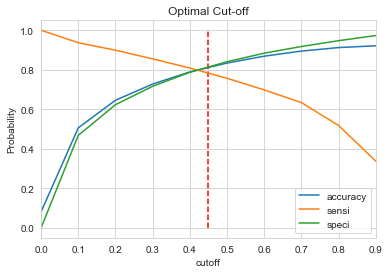

In [196]:
#Checking the Optimal Cut-off for the above model
cutoff_df.plot.line(x='cutoff', y=['accuracy','sensi','speci'])
plt.vlines(0.45, ymax=1, ymin=0, colors='r', linestyles='--')
plt.ylabel('Probability', fontsize = 10)
plt.title('Optimal Cut-off')
plt.show()

In [197]:
#Creating a separate dataframe for predicted values on every different cut-offs
lrdf['Opt Cutoff'] = lrdf['Probability'].map(lambda x : 1 if x > 0.45 else 0)
lrdf.head()

Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
6587        0     0.963795          1    1    1    1    1    1    1    1    1   
3080        0     0.028865          0    1    0    0    0    0    0    0    0   
21632       0     0.006576          0    1    0    0    0    0    0    0    0   
1366        0     0.278207          0    1    1    1    0    0    0    0    0   
5341        0     0.091562          0    1    0    0    0    0    0    0    0   

       0.8  0.9  Opt Cutoff  
6587     1    1           1  
3080     0    0           0  
21632    0    0           0  
1366     0    0           0  
5341     0    0           0

In [198]:
confusion_matrix(y_test, lrdf['Opt Cutoff'])

array([[6734, 1535],
       [ 160,  572]])

In [199]:
accuracy_score(y_test, lrdf['Opt Cutoff'])

0.8116875902677481

In [200]:
print(classification_report(y_test, lrdf['Opt Cutoff']))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8269
           1       0.27      0.78      0.40       732

    accuracy                           0.81      9001
   macro avg       0.62      0.80      0.65      9001
weighted avg       0.92      0.81      0.85      9001



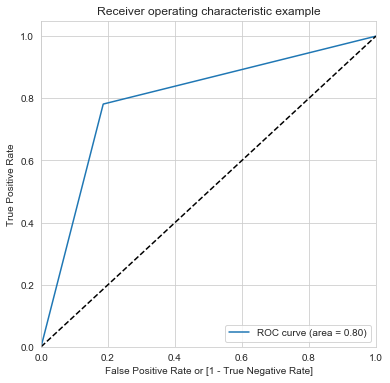

(array([0.        , 0.18563309, 1.        ]),
 array([0.        , 0.78142077, 1.        ]),
 array([2, 1, 0]))

In [201]:
draw_roc(y_test, lrdf['Opt Cutoff'])

In [202]:
confusion = confusion_matrix(y_test, lrdf['Opt Cutoff'])
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Misclassification Rate: {0}'.format((FP+FN)/ (FP+FN+TP+TN)))

Misclassification Rate: 0.18831240973225197


In [203]:
def visConfMat(y_true, y_pred):
  cnf_matrix = confusion_matrix(y_test, y_pred)
  class_names = [0,1]
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()
  
  confusion = confusion_matrix(y_test, y_pred)
  TP = confusion[1,1] # true positive
  TN = confusion[0,0] # true negatives
  FP = confusion[0,1] # false positives
  FN = confusion[1,0] # false negatives
  print('Misclassification Rate: {0}'.format((FP+FN)/ (FP+FN+TP+TN)))
  print("Accuracy:",accuracy_score(y_test, y_pred))
  print("Precision:",precision_score(y_test, y_pred))
  print("Recall:",recall_score(y_test, y_pred))
  print("Negative Predictive Power:", TN/(TN+FP))


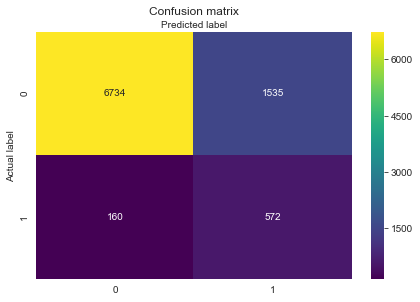

Misclassification Rate: 0.18831240973225197
Accuracy: 0.8116875902677481
Precision: 0.27147603227337447
Recall: 0.7814207650273224
Negative Predictive Power: 0.8143669125650018


In [204]:
visConfMat(y_test, lrdf['Opt Cutoff'])

### Doing Cross Validation using GridSearchCV to tune hyperparameters to fit best model

In [205]:
#Finding the best hyperparameter
# Here the main objective is to find the best possible Hyperparameter

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specifying range of hyperparameters
# Setting the parameters by cross-validation
hyper_params = [{
                     'C': [0.0001,0.001,0.01,0.1, 1, 10, 100, 1000],
                     'penalty': ["l1","l2"]
                
                }]


# specifying model
model = LogisticRegression(random_state = 101)

# setting up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1,
                        return_train_score=True,
                        )
                              

# fitting the model
model_cv.fit(X_train_PCA_df, y_train_samp)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   22.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=101, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=1)

In [206]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.406696      0.178319         0.000000        0.000000  0.0001   
1        0.416487      0.084940         0.016123        0.009849  0.0001   
2        0.074990      0.061442         0.000000        0.000000   0.001   
3        0.722717      0.078353         0.018553        0.016197   0.001   
4        0.045888      0.012726         0.000000        0.000000    0.01   
5        1.070319      0.166812         0.026100        0.022024    0.01   
6        0.078257      0.044724         0.000000        0.000000     0.1   
7        0.913982      0.130982         0.016114        0.003135     0.1   
8        0.072007      0.029469         0.000000        0.000000       1   
9        1.244480      0.097887         0.012151        0.006548       1   
10       0.081277      0.038480         0.000000        0.000000      10   
11       1.028342      0.254584         0.020849        0.015768      10   
12       0.066591      0.030532         0.000000        0.000000     100   
13       0.863854      0.074358         0.011655        0.004424     100   
14       0.071888      0.033992         0.000000        0.000000    1000   
15       1.009058      0.049451         0.015371        0.005858    1000   

   param_penalty                          params  split0_test_score  \
0             l1  {'C': 0.0001, 'penalty': 'l1'}                NaN   
1             l2  {'C': 0.0001, 'penalty': 'l2'}           0.839464   
2             l1   {'C': 0.001, 'penalty': 'l1'}                NaN   
3             l2   {'C': 0.001, 'penalty': 'l2'}           0.850499   
4             l1    {'C': 0.01, 'penalty': 'l1'}                NaN   
5             l2    {'C': 0.01, 'penalty': 'l2'}           0.853915   
6             l1     {'C': 0.1, 'penalty': 'l1'}                NaN   
7             l2     {'C': 0.1, 'penalty': 'l2'}           0.855754   
8             l1       {'C': 1, 'penalty': 'l1'}                NaN   
9             l2       {'C': 1, 'penalty': 'l2'}           0.855491   
10            l1      {'C': 10, 'penalty': 'l1'}                NaN   
11            l2      {'C': 10, 'penalty': 'l2'}           0.855229   
12            l1     {'C': 100, 'penalty': 'l1'}                NaN   
13            l2     {'C': 100, 'penalty': 'l2'}           0.855229   
14            l1    {'C': 1000, 'penalty': 'l1'}                NaN   
15            l2    {'C': 1000, 'penalty': 'l2'}           0.855229   

    split1_test_score  split2_test_score  ...  mean_test_score  \
0                 NaN                NaN  ...              NaN   
1            0.831754           0.842722  ...         0.837770   
2                 NaN                NaN  ...              NaN   
3            0.842812           0.853683  ...         0.846544   
4                 NaN                NaN  ...              NaN   
5            0.850184           0.855723  ...         0.850913   
6                 NaN                NaN  ...              NaN   
7            0.849394           0.855723  ...         0.851226   
8                 NaN                NaN  ...              NaN   
9            0.849131           0.855723  ...         0.851069   
10                NaN                NaN  ...              NaN   
11           0.849131           0.855723  ...         0.851016   
12                NaN                NaN  ...              NaN   
13           0.849131           0.855723  ...         0.851016   
14                NaN                NaN  ...              NaN   
15           0.849131           0.855723  ...         0.851016   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0              NaN                9                 NaN                 NaN   
1         0.003577                8            0.839070            0.840121   
2              NaN               10                 NaN                 NaN   
3         0.004983                7            0.848046         

In [207]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8512257703169345 corresponding to hyperparameters {'C': 0.1, 'penalty': 'l2'}


Now with these hyperparameters, we'll build the logistic regression model

In [208]:
#Building the model with the hyperparameters obtaine
logrf = LogisticRegression(C=0.1, penalty='l2', random_state=101)

In [209]:
logrf.fit(X_train_PCA_df, y_train_samp)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [210]:
#Predicting the test set
y_pred_prob = logrf.predict_proba(X_test_PCA_df)[:,1:].reshape(-1)

In [211]:
lrfinaldf = pd.DataFrame({'Actual':y_test})
lrfinaldf['Probability'] = y_pred_prob
lrfinaldf['Predicted'] = lrfinaldf['Probability'].map(lambda x : 1 if x > 0.5 else 0)
lrfinaldf.head()

Actual  Probability  Predicted
6587        0     0.963724          1
3080        0     0.028977          0
21632       0     0.006662          0
1366        0     0.278279          0
5341        0     0.091856          0

In [212]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    lrfinaldf[i]=  lrfinaldf.Probability.map(lambda x: 1 if x > i else 0)
lrfinaldf.head()

Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
6587        0     0.963724          1    1    1    1    1    1    1    1    1   
3080        0     0.028977          0    1    0    0    0    0    0    0    0   
21632       0     0.006662          0    1    0    0    0    0    0    0    0   
1366        0     0.278279          0    1    1    1    0    0    0    0    0   
5341        0     0.091856          0    1    0    0    0    0    0    0    0   

       0.8  0.9  
6587     1    1  
3080     0    0  
21632    0    0  
1366     0    0  
5341     0    0

In [213]:
# let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['cutoff','accuracy','sensi','speci'])

In [214]:
# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
   cm1 = confusion_matrix(lrfinaldf.Actual, lrfinaldf[i] )
   total1=sum(sum(cm1))
   accuracy = (cm1[0,0]+cm1[1,1])/total1
   
   speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
   sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
   cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     cutoff  accuracy     sensi     speci
0.0     0.0  0.081324  1.000000  0.000000
0.1     0.1  0.505277  0.937158  0.467046
0.2     0.2  0.645151  0.898907  0.622687
0.3     0.3  0.727697  0.855191  0.716411
0.4     0.4  0.788912  0.808743  0.787157
0.5     0.5  0.833796  0.756831  0.840610
0.6     0.6  0.868792  0.696721  0.884025
0.7     0.7  0.894789  0.633880  0.917886
0.8     0.8  0.912343  0.517760  0.947273
0.9     0.9  0.921342  0.336066  0.973153


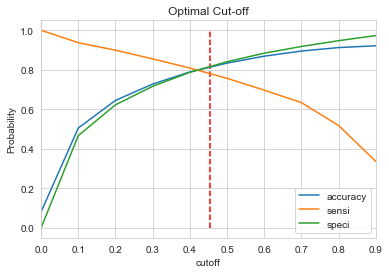

In [215]:
#Checking the Optimal Cut-off for the above model
cutoff_df.plot.line(x='cutoff', y=['accuracy','sensi','speci'])
plt.vlines(0.455, ymax=1, ymin=0, colors='r', linestyles='--')
plt.ylabel('Probability', fontsize = 10)
plt.title('Optimal Cut-off')
plt.show()

In [216]:
#Creating a separate dataframe for predicted values on every different cut-offs
lrfinaldf['Opt Cutoff'] = lrfinaldf['Probability'].map(lambda x : 1 if x > 0.45 else 0)
lrfinaldf.head()

Actual  Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
6587        0     0.963724          1    1    1    1    1    1    1    1    1   
3080        0     0.028977          0    1    0    0    0    0    0    0    0   
21632       0     0.006662          0    1    0    0    0    0    0    0    0   
1366        0     0.278279          0    1    1    1    0    0    0    0    0   
5341        0     0.091856          0    1    0    0    0    0    0    0    0   

       0.8  0.9  Opt Cutoff  
6587     1    1           1  
3080     0    0           0  
21632    0    0           0  
1366     0    0           0  
5341     0    0           0

In [217]:
confusion_matrix(y_test, lrfinaldf['Opt Cutoff'])

array([[6734, 1535],
       [ 160,  572]])

In [218]:
accuracy_score(y_test, lrfinaldf['Opt Cutoff'])

0.8116875902677481

In [219]:
print("New Model with Hyperparameter Tuning")
print(classification_report(y_test, lrfinaldf['Opt Cutoff']))
print("=====================================================")
print("Old Model without Hyperparameter Tuning")
print(classification_report(y_test, lrdf['Opt Cutoff']))

New Model with Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8269
           1       0.27      0.78      0.40       732

    accuracy                           0.81      9001
   macro avg       0.62      0.80      0.65      9001
weighted avg       0.92      0.81      0.85      9001

Old Model without Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8269
           1       0.27      0.78      0.40       732

    accuracy                           0.81      9001
   macro avg       0.62      0.80      0.65      9001
weighted avg       0.92      0.81      0.85      9001



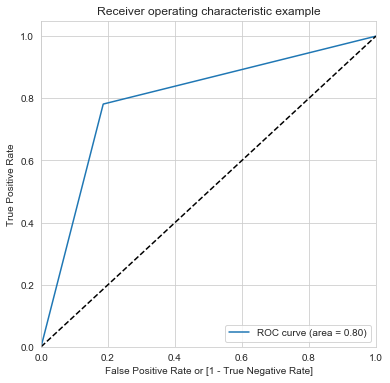

(array([0.        , 0.18563309, 1.        ]),
 array([0.        , 0.78142077, 1.        ]),
 array([2, 1, 0]))

In [220]:
draw_roc(y_test, lrfinaldf['Opt Cutoff'])

In [221]:
confusion = confusion_matrix(y_test, lrfinaldf['Opt Cutoff'])
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Misclassification Rate: {0}'.format((FP+FN)/ (FP+FN+TP+TN)))

Misclassification Rate: 0.18831240973225197


New Model with Hyperparameter Tuning


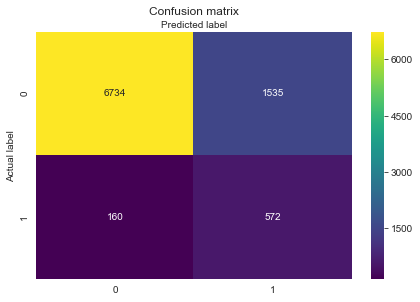

Misclassification Rate: 0.18831240973225197
Accuracy: 0.8116875902677481
Precision: 0.27147603227337447
Recall: 0.7814207650273224
Negative Predictive Power: 0.8143669125650018
Old Model without Hyperparameter Tuning


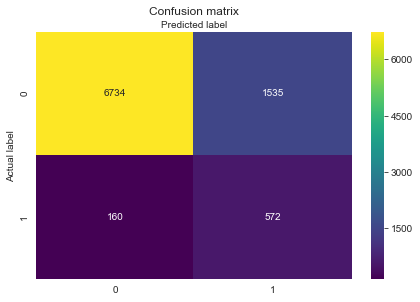

Misclassification Rate: 0.18831240973225197
Accuracy: 0.8116875902677481
Precision: 0.27147603227337447
Recall: 0.7814207650273224
Negative Predictive Power: 0.8143669125650018


In [222]:
print("New Model with Hyperparameter Tuning")
visConfMat(y_test, lrfinaldf['Opt Cutoff'])
print("=====================================================")
print("Old Model without Hyperparameter Tuning")
visConfMat(y_test, lrdf['Opt Cutoff'])

In [223]:
# Define a result table as a DataFrame 
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc', 'misclassification_rate', 'accuracy', 'precision', 'recall', 'predictive_power'])

In [224]:
def aucroc(y_test, yproba, cls, result_table):
  fpr, tpr, _ = roc_curve(y_test,  yproba)
  auc = roc_auc_score(y_test, yproba)

  # Metrics of the model
  confusion = confusion_matrix(y_test, yproba)
  TP = confusion[1,1] # true positive
  TN = confusion[0,0] # true negatives
  FP = confusion[0,1] # false positives
  FN = confusion[1,0] # false negatives
  misclassification_rate = round(((FP+FN)/ (FP+FN+TP+TN)),2)
  accuracy = round(accuracy_score(y_test, yproba),2)
  precision = round(precision_score(y_test, yproba),2)
  recall = round(recall_score(y_test, yproba),2)
  predictive_power = round(TN/(TN+FP),2)

  # Result Table
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                      'fpr':fpr,
                                      'tpr':tpr,
                                      'auc':auc,
                                      'misclassification_rate':misclassification_rate,
                                      'accuracy':accuracy,
                                      'recall':recall,
                                      'predictive_power':predictive_power,
                                      'precision':precision}, ignore_index=True)

  # Plotting the ROC Curver                                    
  fig = plt.figure(figsize=(8,6))

  for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
              result_table.loc[i]['tpr'],
              label="{}, AUC={:.3f}".format(result_table.loc[i]['classifiers'], result_table.loc[i]['auc']))
  
  plt.plot([0,1], [0,1], color='orange', linestyle='--')

  plt.xticks(np.arange(0.0, 1.1, step=0.1))
  plt.xlabel("Flase Positive Rate", fontsize=15)

  plt.yticks(np.arange(0.0, 1.1, step=0.1))
  plt.ylabel("True Positive Rate", fontsize=15)

  plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
  plt.legend(prop={'size':13}, loc='lower right')

  plt.show()
  return(result_table)

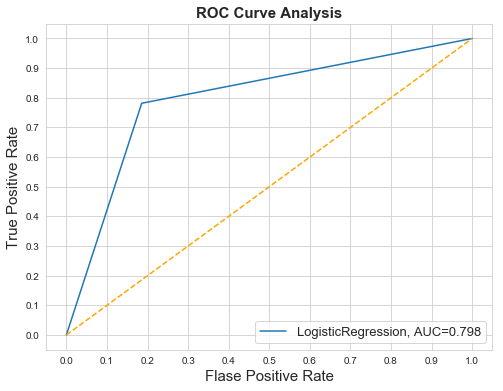

In [225]:
result_table = aucroc(y_test, lrfinaldf['Opt Cutoff'], logrf, result_table)

### Building Random Forest Model

In [226]:
X_train_PCA_df.shape

(38582, 70)

In [227]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(random_state=101)
# fit
rfc.fit(X_train_PCA_df,y_train_samp)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [228]:
# Making predictions
y_pred_rfc = rfc.predict(X_test_PCA_df)

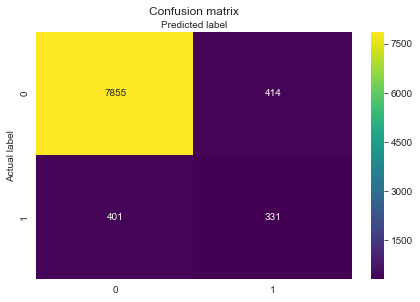

Misclassification Rate: 0.0905454949450061
Accuracy: 0.9094545050549939
Precision: 0.4442953020134228
Recall: 0.4521857923497268
Negative Predictive Power: 0.9499334865159028


In [229]:
# Let's check the report of our default model
visConfMat(y_test, y_pred_rfc)

As accuracy is decent, Recall seems to show bad figure. We'll need to tune the hyperparameters to get better Recall.

### Tuning Hyperparameters for Random Forest Algorithm

#### 1. Tuning max_depth

In [230]:
# specify number of folds for k-fold CV 
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 101)
# parameters to build the model on 
parameters = {'max_depth': range(2, 20, 5)}
# instantiate the model
model = RandomForestClassifier(random_state=101, n_jobs = -1)
# fit tree on training data
model_cv = GridSearchCV(model, parameters,
                  cv=n_folds, 
                  scoring="recall",
                  return_train_score = True)
model_cv.fit(X_train_PCA_df, y_train_samp)

GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score

In [231]:
# scores of GridSearch CV
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.654421      1.648592         0.118306        0.003174   
1       8.174311      0.228700         0.117024        0.001892   
2      10.946560      0.218055         0.117520        0.001270   
3      13.087573      0.341074         0.115659        0.001963   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.759065           0.764876   
1               7   {'max_depth': 7}           0.813190           0.821485   
2              12  {'max_depth': 12}           0.910667           0.908899   
3              17  {'max_depth': 17}           0.962690           0.961032   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.751466           0.749678  ...         0.756421        0.005456   
1           0.811114           0.810971  ...         0.815176        0.004324   
2           0.904155           0.897244  ...         0.905847        0.004802   
3           0.953862           0.959052  ...         0.958670        0.003125   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.766548            0.757826   
1                3            0.828802            0.836765   
2                2            0.967065            0.960111   
3                1            1.000000            0.999742   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.747788            0.758307            0.763206   
1            0.815656            0.827947            0.830305   
2            0.961023            0.959372            0.963725   
3            0.999935            0.999740            1.000000   

   mean_train_score  std_train_score  
0          0.758735         0.006354  
1          0.827895         0.006857  
2          0.962259         0.002819  
3          0.999883         0.000119  

[4 rows x 21 columns]

In [232]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.958669783609194 corresponding to hyperparameters {'max_depth': 17}


Random Forest is taking a lot of computation time to treat the data with 71 variables. To deal with that, we can use Random Forest Classifier to fetch the top 30 features in order to save computation time.

### Getting Best Features

In [233]:
#Checking shape of our data after sampling
X_train_samp.shape

(38582, 162)

In [234]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train_samp.shape[1])))    # number of variables to consider to split each node
print('max_features: {0}'.format(max_features))

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, oob_score=True, random_state=101, verbose=1, n_jobs=-1)

max_features: 13


In [235]:
# fit model
rf_model.fit(X_train_samp, y_train_samp)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.2s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=13,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=101, verbose=1,
                       warm_start=False)

In [236]:
#Checking oob score
rf_model.oob_score_


0.9722150225493753

In [237]:
#predicting the test set
y_pred_rf = rf_model.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


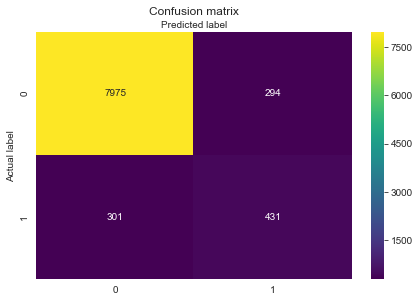

Misclassification Rate: 0.06610376624819464
Accuracy: 0.9338962337518053
Precision: 0.5944827586206897
Recall: 0.5887978142076503
Negative Predictive Power: 0.964445519409844


In [238]:
#Checking Report of the above model

visConfMat(y_test, y_pred_rf)

### Feature Importance

In [239]:
# Getting Features
variables = tel_churn_data.drop('is_churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# creating dataframe
feature_importance = pd.DataFrame({'Features': variables, 'imp_percentage': importance*100})
feature_importance = feature_importance[['Features', 'imp_percentage']]

# sort features
feature_importance = feature_importance.sort_values('imp_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.imp_percentage.sum())
feature_importance

Sum of importance= 99.99999999999999


Features  imp_percentage
0              total_ic_mou_8        6.765585
1            total_rech_amt_8        5.085352
2         date_of_last_rech_8        4.593294
3          last_day_rch_amt_8        4.297737
4                   fb_user_8        3.903061
5               roam_ic_mou_8        3.737043
6               roam_og_mou_8        3.520650
7                      arpu_8        3.258143
8              max_rech_amt_8        3.051890
9                   arpu_drop        2.852857
10        total_rech_amt_drop        2.548870
11             total_og_mou_8        2.380402
12   date_of_last_rech_data_8        2.111273
13           total_rech_num_8        2.045567
14           loc_ic_t2m_mou_8        1.916826
15               loc_ic_mou_8        1.534392
16           loc_og_t2m_mou_8        1.189216
17      total_rech_data_amt_8        1.179715
18            max_rech_data_8        1.043719
19                vol_2g_mb_8        0.823696
20               offnet_mou_8        0.744686
21           loc_ic_t2t_mou_8        0.621865
22         last_day_rch_amt_7        0.617891
23           total_rech_num_6        0.607835
24               loc_og_mou_8        0.597520
25                        aon        0.577636
26                vol_3g_mb_8        0.561381
27             max_rech_amt_7        0.525259
28            max_rech_data_7        0.524609
29               std_og_mou_7        0.511016
..                        ...             ...
132                  vbc_3g_6        0.176166
133               sachet_2g_6        0.175645
134          std_ic_t2f_mou_7        0.168574
135               sachet_2g_8        0.168080
136                  vbc_3g_7        0.157830
137          std_ic_t2f_mou_6        0.156390
138          std_og_t2f_mou_7        0.152050
139                 arpu_3g_6        0.150552
140           count_rech_3g_6        0.148318
141                 fb_user_6        0.147301
142              monthly_3g_7        0.144173
143          std_og_t2f_mou_6        0.139996
144              isd_og_mou_7        0.135489
145              spl_ic_mou_7        0.116067
146           count_rech_3g_7        0.115828
147          std_og_t2f_mou_8        0.111631
148              spl_ic_mou_8        0.108218
149              monthly_3g_6        0.092679
150               sachet_3g_7        0.086937
151               sachet_3g_6        0.071954
152           count_rech_3g_8        0.068631
153              monthly_2g_6        0.055970
154               sachet_3g_8        0.052753
155              monthly_3g_8        0.046341
156               og_others_7        0.033377
157          night_pck_user_7        0.008533
158          night_pck_user_6        0.008517
159      last_date_of_month_8        0.007815
160          night_pck_user_8        0.005658
161      last_date_of_month_7        0.000267

[162 rows x 2 columns]

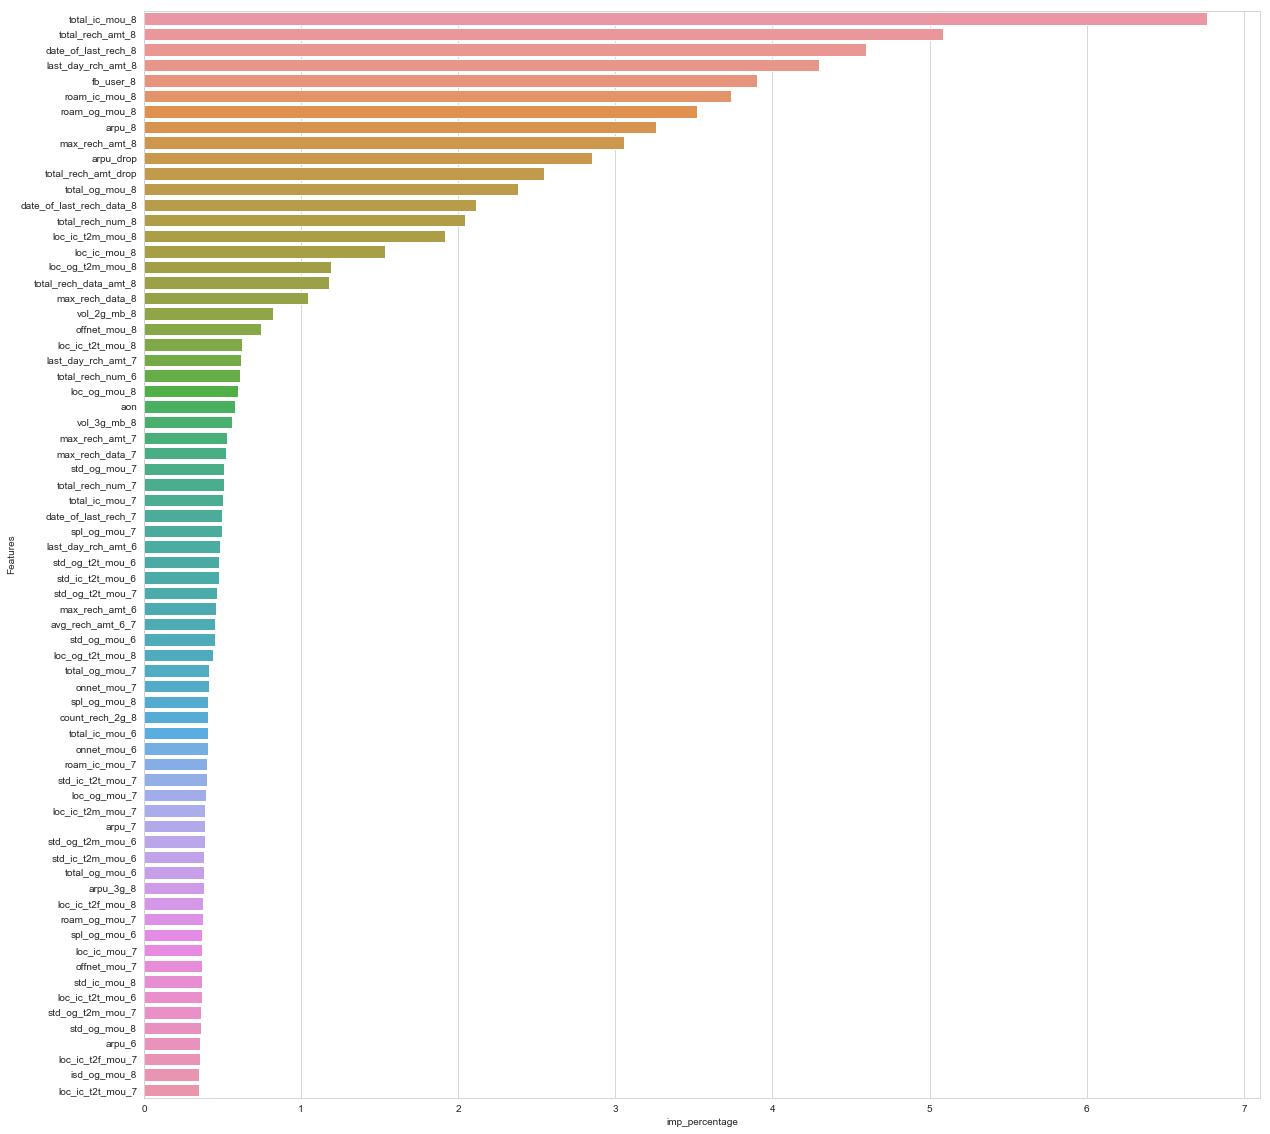

In [240]:
plt.figure(figsize=(20,20))
sns.barplot(x = feature_importance[:70].imp_percentage, y=feature_importance[:70].Features)
plt.show()

#### Fetching top 35 varibales

In [241]:
# extract top 'n' features
top_n = 35
top_features = feature_importance.Features[0:top_n]

In [242]:
#Creating df of obtained X_train_samp after sampling 
X_train_samp_df = pd.DataFrame(X_train_samp)
X_train_samp_df.columns = variables
X_train_samp_df

last_date_of_month_7  last_date_of_month_8    arpu_6    arpu_7  \
0                         1                     1 -0.131756  0.960382   
1                         1                     1  0.254960 -0.371561   
2                         1                     1 -1.470355 -1.285240   
3                         1                     1 -1.327681 -1.319979   
4                         1                     1 -0.043933 -0.036566   
5                         1                     1  2.157896 -0.425208   
6                         1                     1  2.772374 -0.097049   
7                         1                     1  0.776741  0.640020   
8                         1                     1  1.586445  0.638546   
9                         1                     1 -0.985253 -1.142978   
10                        1                     1 -0.102691 -0.728761   
11                        1                     1 -0.017308 -0.335490   
12                        1                     1  0.692107  0.855851   
13                        1                     1 -1.767083  1.409988   
14                        1                     1  1.317468 -0.782244   
15                        1                     1  0.283622 -0.531143   
16                        1                     1  1.101315  1.237746   
17                        1                     1 -0.061341 -0.574736   
18                        1                     1 -0.657194 -1.136484   
19                        1                     1 -0.701779 -1.325951   
20                        1                     1 -1.531259 -1.456935   
21                        1                     1 -0.265453 -0.546845   
22                        1                     1 -0.457618  1.130810   
23                        1                     1  0.731201  0.725944   
24                        1                     1 -0.144520  0.591944   
25                        1                     1 -0.685097 -0.372868   
26                        1                     1 -1.153495 -1.473382   
27                        1                     1 -1.260222  0.281416   
28                        1                     1 -1.467813 -0.484653   
29                        1                     1 -0.586380 -0.739132   
...                     ...                   ...       ...       ...   
38552                     1                     1  1.239562 -0.922752   
38553                     1                     1  0.792248  0.698862   
38554                     1                     1 -0.772471 -1.669356   
38555                     1                     1  1.758760  0.840401   
38556                     1                     1 -1.560499 -0.922162   
38557                     1                     1  0.632789  0.427143   
38558                     1                     1  0.884113  1.336427   
38559                     1                     1 -1.150783 -0.827789   
38560                     1                     1  0.037063 -0.413890   
38561                     1                     1 -1.512148 -1.531248   
38562                     1                     1  0.586188  0.378128   
38563                     1                     1  0.536099  2.192017   
38564                     1                     1 -1.383494  1.195332   
38565                     1                     1 -1.029350 -1.672652   
38566                     1                     1  1.692102  1.396314   
38567                     1                     1 -1.268403 -0.367690   
38568                     1                     0  0.330140  0.281506   
38569                     1                     1 -0.934838 -0.400719   
38570                     1                     1 -1.404395 -0.753409   
38571                     1                     1 -0.688243 -0.853903   
38572                     1                     1  0.191418 -1.692846   
38573                     1                     1  0.885577  0.548357   
38574                     1                     1 -0.797098 -2.16

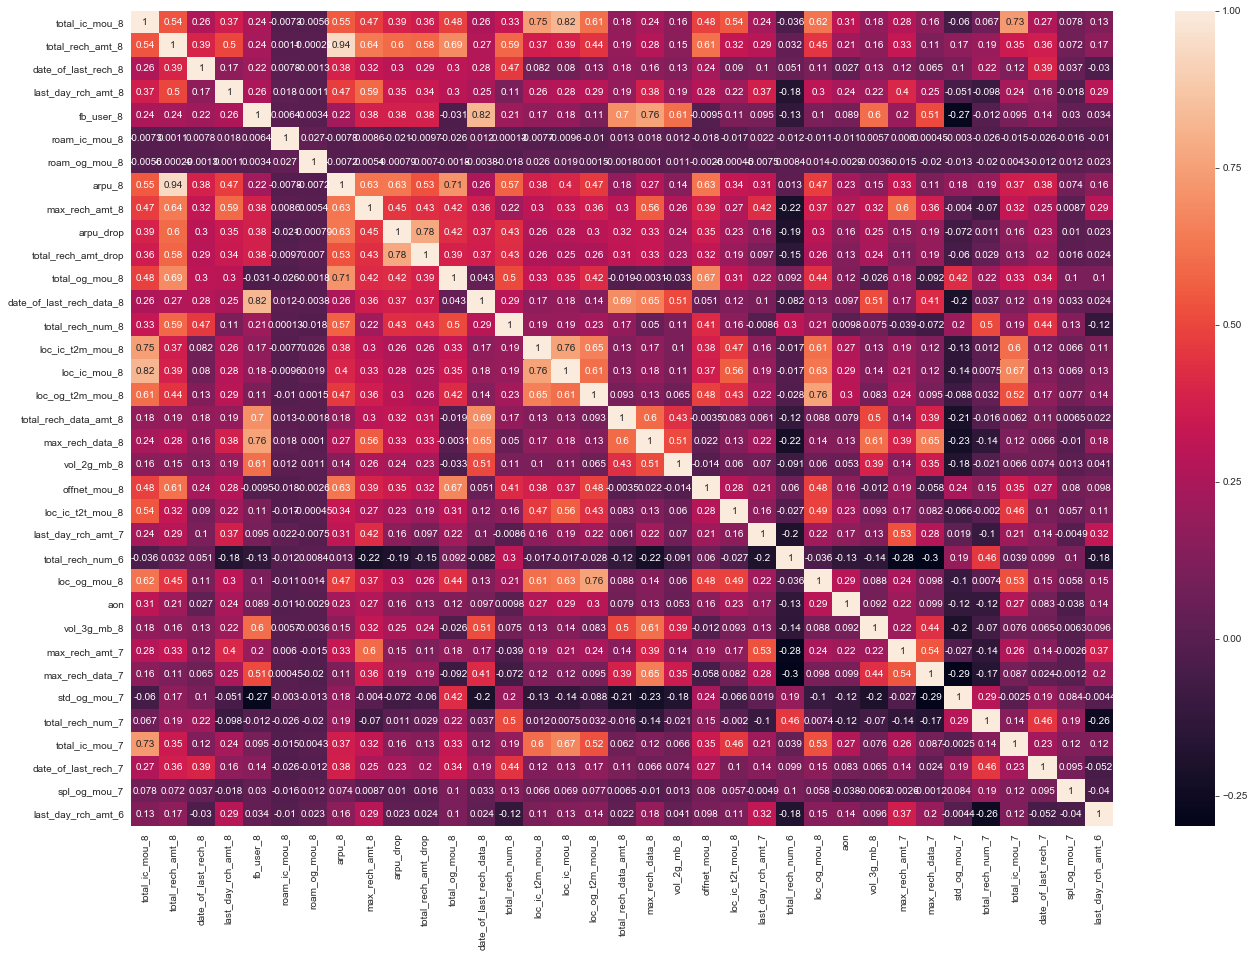

In [243]:
#Plotting Feature Correlation
plt.figure(figsize=(22,15))
sns.heatmap(X_train_samp_df[top_features].corr(), annot=True)
plt.show()

Now As we have less number of features, we can go ahead and build Random Forest Model and get the best hyperparameters.

In [244]:
X_train_rf = X_train_samp_df[top_features]
X_test_rf = X_test[top_features]

### 1. Tuning max_depth

In [245]:
# specify number of folds for k-fold CV 
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 101)
# parameters to build the model on 
parameters = {'max_depth': range(2, 23, 5)
              }
# instantiate the model
model = RandomForestClassifier(random_state=101, n_jobs = -1)
# fit tree on training data
model_cv = GridSearchCV(model, parameters,
                  cv=n_folds, 
                  scoring="recall",
                  verbose = 1,
                  n_jobs = -1,
                  return_train_score = True)
model_cv.fit(X_train_rf, y_train_samp)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score

In [246]:
# scores of GridSearch CV
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.458142      0.161514         0.115940        0.002368   
1       8.982442      0.296054         0.133157        0.040687   
2      14.064442      0.230466         0.112940        0.001354   
3      16.558288      0.158887         0.112557        0.001830   
4      16.277105      2.054117         0.114504        0.000923   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.768523           0.764086   
1               7   {'max_depth': 7}           0.909354           0.904687   
2              12  {'max_depth': 12}           0.959538           0.962349   
3              17  {'max_depth': 17}           0.969522           0.973670   
4              22  {'max_depth': 22}           0.972149           0.973670   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.769819           0.772083  ...         0.767904        0.002982   
1           0.907724           0.909091  ...         0.906588        0.002796   
2           0.966352           0.962658  ...         0.962398        0.002262   
3           0.972980           0.971671  ...         0.971900        0.001419   
4           0.974764           0.972959  ...         0.973195        0.000941   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.769196            0.771316   
1                4            0.920762            0.918802   
2                3            0.986309            0.986510   
3                2            0.999354            0.999290   
4                1            1.000000            1.000000   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.764836            0.766874            0.770733   
1            0.915148            0.920042            0.920636   
2            0.986075            0.986890            0.987021   
3            0.999089            0.999221            0.999156   
4            1.000000            1.000000            1.000000   

   mean_train_score  std_train_score  
0          0.768591         0.002426  
1          0.919078         0.002084  
2          0.986561         0.000353  
3          0.999222         0.000094  
4          1.000000         0.000000  

[5 rows x 21 columns]

In [247]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.973194528068437 corresponding to hyperparameters {'max_depth': 22}


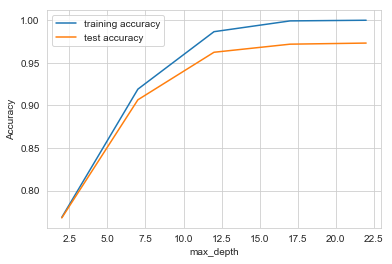

In [248]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the above plot, we cab take **n_estimators as 7**

#### 2. Tuning n_estimators

In [249]:
# specify number of folds for k-fold CV
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# parameters to build the model on
parameters = {'n_estimators': range(10, 200, 40)}

# instantiate the model (note we are specifying a max_depth)
model = RandomForestClassifier(random_state=101, max_depth=7, n_jobs= -1)


# fit tree on training data
model_cv = GridSearchCV(model, parameters, 
                    cv=n_folds, 
                  scoring="recall", return_train_score = True, verbose =1, n_jobs=-1)
model_cv.fit(X_train_rf, y_train_samp)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   58.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=7,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=Fa

In [250]:
# scores of GridSearch CV
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.167104      0.121007         0.113388        0.002253   
1       4.470323      0.065366         0.111382        0.001828   
2       8.134217      0.092051         0.113107        0.001178   
3      11.794891      0.066828         0.133770        0.041314   
4      13.563131      2.150061         0.133438        0.039180   

  param_n_estimators                 params  split0_test_score  \
0                 10   {'n_estimators': 10}           0.900158   
1                 50   {'n_estimators': 50}           0.909354   
2                 90   {'n_estimators': 90}           0.910405   
3                130  {'n_estimators': 130}           0.909091   
4                170  {'n_estimators': 170}           0.910667   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.902580           0.895488           0.904713  ...   
1           0.904687           0.907214           0.906258  ...   
2           0.903370           0.906449           0.909091  ...   
3           0.906003           0.910528           0.911924  ...   
4           0.906266           0.909508           0.913984  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.901160        0.003184                5            0.913658   
1         0.905971        0.002361                4            0.922570   
2         0.906487        0.002939                3            0.921279   
3         0.907720        0.003867                2            0.920827   
4         0.908348        0.004296                1            0.921860   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.913187            0.907340            0.908035   
1            0.918996            0.912090            0.913551   
2            0.918544            0.915148            0.919068   
3            0.919254            0.915669            0.920755   
4            0.918673            0.916255            0.922897   

   split4_train_score  mean_train_score  std_train_score  
0            0.919598          0.912363         0.004442  
1            0.921739          0.917789         0.004251  
2            0.920896          0.918987         0.002183  
3            0.920247          0.919350         0.001925  
4            0.920247          0.919986         0.002354  

[5 rows x 21 columns]

In [251]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9083479960366514 corresponding to hyperparameters {'n_estimators': 170}


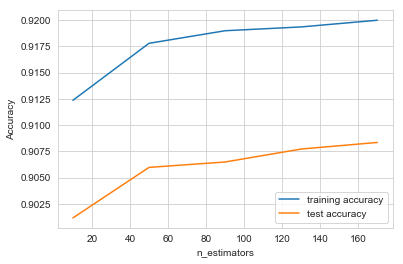

In [252]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



From the above plot, we can take **n_estimators as 50**

#### 3. Tuning max_feature

In [253]:
# specify number of folds for k-fold CV
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# parameters to build the model on
parameters = {'max_features': [2, 5, 12, 20, 28, 24, 35]}

# instantiate the model
model = RandomForestClassifier(max_depth=7, n_estimators=50, n_jobs=-1, random_state = 101)


# fit tree on training data
model_cv = GridSearchCV(model, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score = True, verbose = 1, n_jobs = -1)
model_cv.fit(X_train_rf, y_train_samp)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  2.2min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=7,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=Fal

In [254]:
# scores of GridSearch CV
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.314753      0.079751         0.138652        0.045858   
1       4.630918      0.037998         0.118949        0.010082   
2      10.061541      0.046248         0.110259        0.000575   
3      16.541680      0.334263         0.112858        0.002109   
4      22.210657      0.158083         0.112694        0.001989   

  param_max_features                params  split0_test_score  \
0                  2   {'max_features': 2}           0.870205   
1                  5   {'max_features': 5}           0.909354   
2                 12  {'max_features': 12}           0.929585   
3                 20  {'max_features': 20}           0.934314   
4                 28  {'max_features': 28}           0.936679   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.867825           0.876115           0.870461  ...   
1           0.904687           0.907214           0.906258  ...   
2           0.927857           0.933214           0.936904  ...   
3           0.934966           0.937803           0.937935  ...   
4           0.937335           0.936273           0.941540  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.869918        0.003675                7            0.879044   
1         0.905971        0.002361                6            0.922570   
2         0.931392        0.003269                5            0.944721   
3         0.937048        0.002156                3            0.948854   
4         0.938358        0.002045                1            0.951114   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.878268            0.881052            0.875000   
1            0.918996            0.912090            0.913551   
2            0.941651            0.939615            0.942952   
3            0.946815            0.944495            0.945353   
4            0.950236            0.948074            0.948144   

   split4_train_score  mean_train_score  std_train_score  
0            0.882284          0.879130         0.002508  
1            0.921739          0.917789         0.004251  
2            0.942829          0.942354         0.001684  
3            0.950811          0.947266         0.002308  
4            0.952693          0.950052         0.001771  

[5 rows x 21 columns]

In [255]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.938358320230483 corresponding to hyperparameters {'max_features': 28}


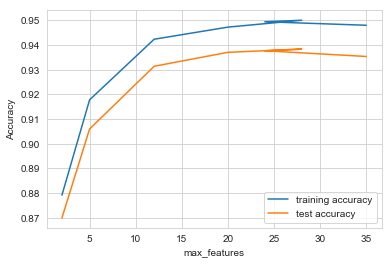

In [256]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the above plot, we can take **max_features as 12**

#### 4. Tuning min_sample_leaf

In [257]:
# specify number of folds for k-fold CV
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# parameters to build the model on
parameters = {'min_samples_leaf': range(10, 1000, 200)}

# instantiate the model
model = RandomForestClassifier(max_depth=7, n_estimators=50, max_features = 12, n_jobs=-1, random_state = 101)


# fit tree on training data
model_cv = GridSearchCV(model, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score = 'warn', verbose = 1, n_jobs=-1)
model_cv.fit(X_train_rf, y_train_samp)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   58.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=7,
                                              max_features=12,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=False, 

In [258]:
# scores of GridSearch CV
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      10.490816      0.265511         0.116241        0.002376   
1       8.850371      0.217899         0.126002        0.026421   
2       8.152068      0.190332         0.122523        0.014237   
3       7.472293      0.197435         0.114723        0.003412   
4       5.714779      1.997249         0.139208        0.017862   

  param_min_samples_leaf                     params  split0_test_score  \
0                     10   {'min_samples_leaf': 10}           0.926432   
1                    210  {'min_samples_leaf': 210}           0.903311   
2                    410  {'min_samples_leaf': 410}           0.881240   
3                    610  {'min_samples_leaf': 610}           0.873095   
4                    810  {'min_samples_leaf': 810}           0.860483   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.928647           0.933979           0.934587  ...   
1           0.896788           0.902626           0.912181  ...   
2           0.877304           0.880449           0.884883  ...   
3           0.867825           0.865409           0.870203  ...   
4           0.849394           0.861331           0.851404  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.930454        0.003234                1            0.940200   
1         0.902007        0.006002                2            0.904294   
2         0.879112        0.004429                3            0.878205   
3         0.866912        0.005121                4            0.868776   
4         0.853860        0.005951                5            0.860768   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.941393            0.941762            0.937175   
1            0.905570            0.906624            0.902259   
2            0.885690            0.880596            0.881425   
3            0.874589            0.864524            0.867407   
4            0.858646            0.858928            0.847222   

   split4_train_score  mean_train_score  std_train_score  
0            0.941207          0.940348         0.001668  
1            0.908371          0.905424         0.002071  
2            0.879818          0.881147         0.002508  
3            0.867554          0.868570         0.003317  
4            0.857560          0.856625         0.004813  

[5 rows x 21 columns]

In [259]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9304542011469034 corresponding to hyperparameters {'min_samples_leaf': 10}


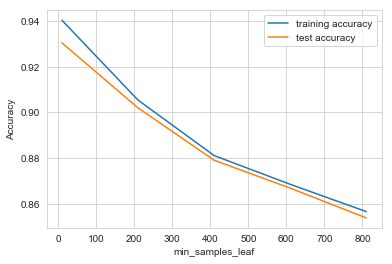

In [260]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As lesser the value of min_sample_leaf, more the model is prone to overfitting. Hence, from the above plot we can take **min_sample_lead** as **200**.

#### 5. Tuning min_sample_split

In [261]:
# specify number of folds for k-fold CV
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# parameters to build the model on
parameters = {'min_samples_split': range(10, 1000, 200)}

# instantiate the model
model = RandomForestClassifier(max_depth=7, n_estimators=50, max_features = 5, min_samples_leaf = 200, n_jobs=-1, random_state = 101)


# fit tree on training data
model_cv = GridSearchCV(model, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score = 'warn', verbose = 1, n_jobs=-1)
model_cv.fit(X_train_rf, y_train_samp)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   34.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=7,
                                              max_features=5,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=200,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=False,

In [262]:
# scores of GridSearch CV
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.110522      0.093744         0.143667        0.028407   
1       4.040569      0.063467         0.116230        0.006479   
2       3.981082      0.160257         0.122866        0.019831   
3       4.711549      0.330802         0.118885        0.013551   
4       4.610501      1.251354         0.113495        0.003010   

  param_min_samples_split                      params  split0_test_score  \
0                      10   {'min_samples_split': 10}           0.878350   
1                     210  {'min_samples_split': 210}           0.878350   
2                     410  {'min_samples_split': 410}           0.881766   
3                     610  {'min_samples_split': 610}           0.872570   
4                     810  {'min_samples_split': 810}           0.868628   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.873091           0.878664           0.877414  ...   
1           0.873091           0.878664           0.877414  ...   
2           0.870458           0.879429           0.875097  ...   
3           0.873618           0.868978           0.870203  ...   
4           0.861506           0.862605           0.877157  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.875840        0.002884                1            0.875686   
1         0.875840        0.002884                1            0.875686   
2         0.875223        0.004849                3            0.879044   
3         0.868473        0.005970                4            0.871424   
4         0.865430        0.006899                5            0.866774   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.878203            0.880531            0.877531   
1            0.878203            0.880531            0.877531   
2            0.878397            0.880336            0.877985   
3            0.876331            0.873699            0.871625   
4            0.868650            0.865565            0.870587   

   split4_train_score  mean_train_score  std_train_score  
0            0.883517          0.879094         0.002701  
1            0.883517          0.879094         0.002701  
2            0.884036          0.879960         0.002188  
3            0.867164          0.872049         0.003016  
4            0.869760          0.868267         0.001859  

[5 rows x 21 columns]

In [263]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8758404576428946 corresponding to hyperparameters {'min_samples_split': 10}


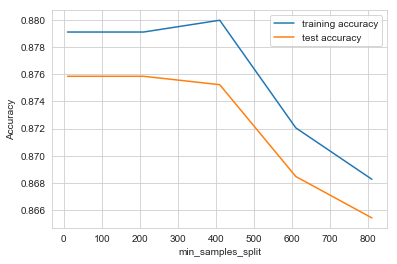

In [264]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_samples_split can be taken as **400** from the above plot

#### 6. Tuning Random Forest Criterion

In [265]:
# specify number of folds for k-fold CV
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# parameters to build the model on
parameters = {'criterion' : ['gini', 'entropy']}

# instantiate the model
model = RandomForestClassifier(max_depth=7, n_estimators=50, max_features = 5, min_samples_leaf = 200, min_samples_split= 400
                               ,n_jobs=-1, random_state = 101)


# fit tree on training data
model_cv = GridSearchCV(model, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score = 'warn', verbose = 1, n_jobs=-1)
model_cv.fit(X_train_rf, y_train_samp)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   26.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=7,
                                              max_features=5,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=200,
                                              min_samples_split=400,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=Fals

In [266]:
# scores of GridSearch CV
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.565626      0.137200         0.113844        0.001298   
1       7.574231      2.788873         0.112502        0.001455   

  param_criterion                    params  split0_test_score  \
0            gini     {'criterion': 'gini'}           0.878350   
1         entropy  {'criterion': 'entropy'}           0.878875   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.873091           0.878664           0.877414  ...   
1           0.877830           0.873566           0.877414  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.875840        0.002884                1            0.875686   
1         0.874998        0.004247                2            0.878657   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.878203            0.880531            0.877531   
1            0.882399            0.873829            0.878375   

   split4_train_score  mean_train_score  std_train_score  
0            0.883517          0.879094         0.002701  
1            0.879948          0.878641         0.002795  

[2 rows x 21 columns]

In [267]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8758404576428946 corresponding to hyperparameters {'criterion': 'gini'}


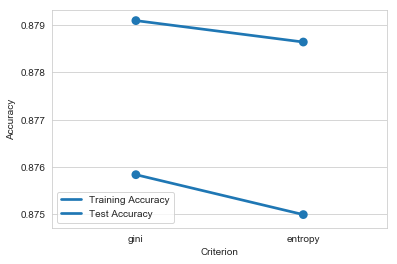

In [268]:
# plotting accuracies with n_estimators
plt.figure()
sns.pointplot(scores["param_criterion"], 
         scores["mean_train_score"], 
         label="training accuracy")
sns.pointplot(scores["param_criterion"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("Criterion")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.show()

#### Building final model with the obtained optimal hyperparameters

In [269]:
# instantiate the model
rfc_final = RandomForestClassifier(max_depth=7, n_estimators=50, max_features = 5, min_samples_leaf = 200, min_samples_split= 400
                               ,n_jobs=-1, random_state = 101, criterion = 'entropy')


In [270]:
#Fitting the model
rfc_final.fit(X_train_rf, y_train_samp)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=200, min_samples_split=400,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=101, verbose=0,
                       warm_start=False)

In [271]:
#Predicting the model
y_pred_rff = rfc_final.predict(X_test_rf)

Random Forest Model After Tuning Hyperparameters


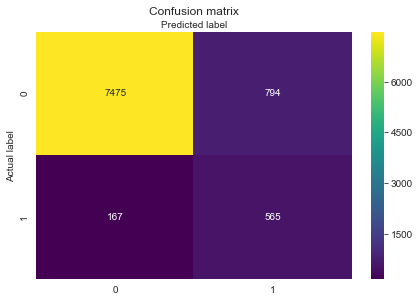

Misclassification Rate: 0.10676591489834462
Accuracy: 0.8932340851016554
Precision: 0.4157468727005151
Recall: 0.7718579234972678
Negative Predictive Power: 0.9039787156850889
_________________________________________________
Random Forest Model Before Tuning Hyperparameters


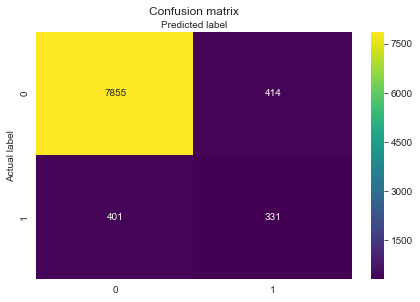

Misclassification Rate: 0.0905454949450061
Accuracy: 0.9094545050549939
Precision: 0.4442953020134228
Recall: 0.4521857923497268
Negative Predictive Power: 0.9499334865159028


In [272]:
print('Random Forest Model After Tuning Hyperparameters')
visConfMat(y_test, y_pred_rff)
print('_________________________________________________')
print('Random Forest Model Before Tuning Hyperparameters')
visConfMat(y_test, y_pred_rfc)


Logistic Regression Model with Hyperparameter Tuning


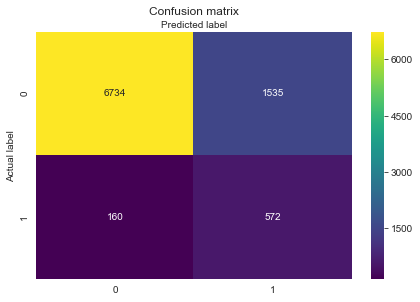

Misclassification Rate: 0.18831240973225197
Accuracy: 0.8116875902677481
Precision: 0.27147603227337447
Recall: 0.7814207650273224
Negative Predictive Power: 0.8143669125650018
Random Forest Model After Tuning Hyperparameters


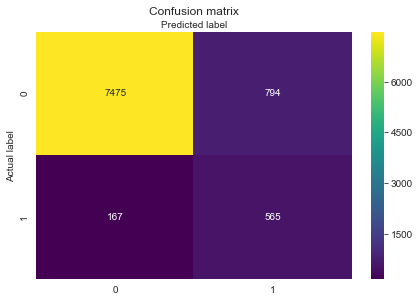

Misclassification Rate: 0.10676591489834462
Accuracy: 0.8932340851016554
Precision: 0.4157468727005151
Recall: 0.7718579234972678
Negative Predictive Power: 0.9039787156850889


In [273]:
print("Logistic Regression Model with Hyperparameter Tuning")
visConfMat(y_test, lrfinaldf['Opt Cutoff'])
print("=====================================================")
print('Random Forest Model After Tuning Hyperparameters')
visConfMat(y_test, y_pred_rff)

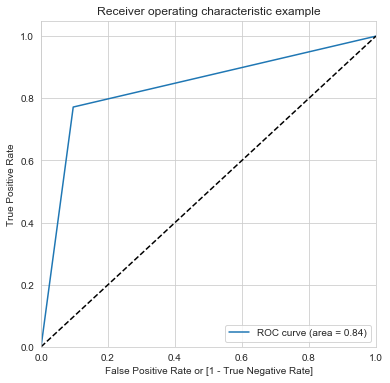

(array([0.        , 0.09602128, 1.        ]),
 array([0.        , 0.77185792, 1.        ]),
 array([2, 1, 0]))

In [274]:
#Plotting ROC curve of Random Forest Model
draw_roc(y_test, y_pred_rff)

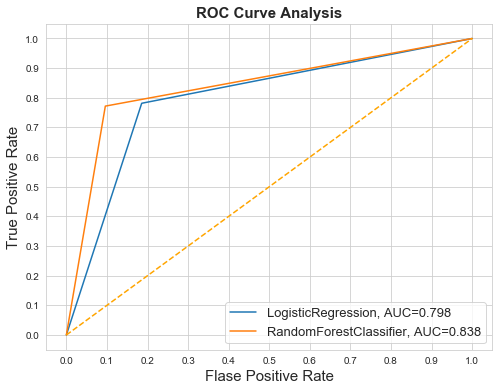

In [275]:
result_table = aucroc(y_test, y_pred_rff, rfc_final, result_table)

In [276]:
result_table

classifiers                              fpr  \
0      LogisticRegression  [0.0, 0.18563308743499818, 1.0]   
1  RandomForestClassifier  [0.0, 0.09602128431491111, 1.0]   

                              tpr       auc  misclassification_rate  accuracy  \
0  [0.0, 0.7814207650273224, 1.0]  0.797894                    0.19      0.81   
1  [0.0, 0.7718579234972678, 1.0]  0.837918                    0.11      0.89   

   precision  recall  predictive_power  
0       0.27    0.78              0.81  
1       0.42    0.77              0.90

**Conclusion Driven**: As we can see above that the AUC Score od the Random Forest is more compared to the Logistic Regression, but the recall of the Logistic Regression is higher compared to Random Forest.

- So the next step would be to find an efficient algorithm, that can take help of the weak learners and try to come to an optimum solution. And Boosting is one way of doing it. So we would try to increase the efficiency of the model.

### AdaBoost : Adaptive Boosting


In [277]:
# Let's use the same hyperparameters found above ( Lets consider the same set of Features which were identified better in Random Forest )
rfc_final = RandomForestClassifier(max_depth=7, n_estimators=50, max_features = 5, min_samples_leaf = 200, min_samples_split= 400
                               ,n_jobs=-1, random_state = 101, criterion = 'entropy')

# Lets try to fit with fefault values
adaboost = AdaBoostClassifier(base_estimator=rfc_final, random_state= 101)
adaboost.fit(X_train_rf, y_train_samp) # Lets Fit the model

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=7,
                                                         max_features=5,
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=200,
                                                         min_samples_split=400,
                                        

In [278]:
#Predicting the model
y_pred_adaboost = adaboost.predict(X_test_rf)

Adaboost for Random Forest, without Hyper Parameter Tuning


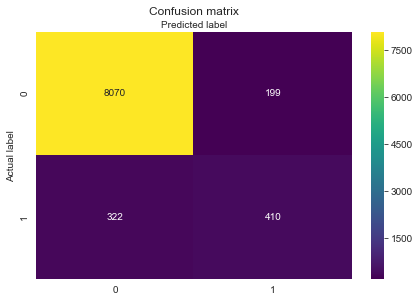

Misclassification Rate: 0.0578824575047217
Accuracy: 0.9421175424952783
Precision: 0.6732348111658456
Recall: 0.5601092896174863
Negative Predictive Power: 0.9759342121175475
Random Forest Model After Tuning Hyperparameters


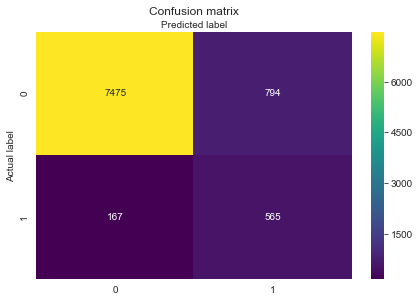

Misclassification Rate: 0.10676591489834462
Accuracy: 0.8932340851016554
Precision: 0.4157468727005151
Recall: 0.7718579234972678
Negative Predictive Power: 0.9039787156850889
Logistic Regression Model with Hyperparameter Tuning


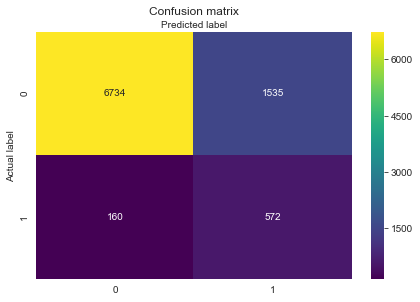

Misclassification Rate: 0.18831240973225197
Accuracy: 0.8116875902677481
Precision: 0.27147603227337447
Recall: 0.7814207650273224
Negative Predictive Power: 0.8143669125650018


In [279]:
print('Adaboost for Random Forest, without Hyper Parameter Tuning')
visConfMat(y_test, y_pred_adaboost)
print("=====================================================")

print('Random Forest Model After Tuning Hyperparameters')
visConfMat(y_test, y_pred_rff)
print("=====================================================")

print("Logistic Regression Model with Hyperparameter Tuning")
visConfMat(y_test, lrfinaldf['Opt Cutoff'])

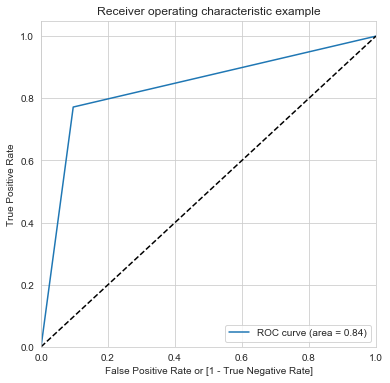

(array([0.        , 0.09602128, 1.        ]),
 array([0.        , 0.77185792, 1.        ]),
 array([2, 1, 0]))

In [280]:
#Plotting ROC curve of Random Forest Model
draw_roc(y_test, y_pred_rff)

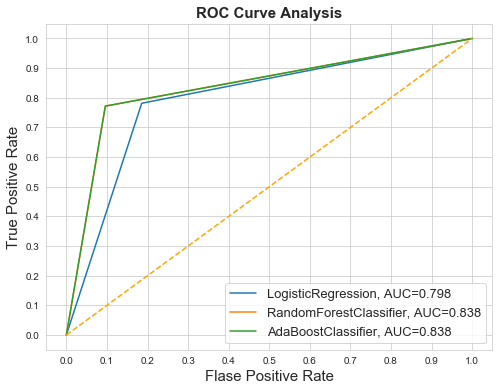

In [281]:
result_table = aucroc(y_test, y_pred_adaboost, adaboost, result_table)

In [282]:
result_table

classifiers                              fpr  \
0      LogisticRegression  [0.0, 0.18563308743499818, 1.0]   
1  RandomForestClassifier  [0.0, 0.09602128431491111, 1.0]   
2      AdaBoostClassifier  [0.0, 0.09602128431491111, 1.0]   

                              tpr       auc  misclassification_rate  accuracy  \
0  [0.0, 0.7814207650273224, 1.0]  0.797894                    0.19      0.81   
1  [0.0, 0.7718579234972678, 1.0]  0.837918                    0.11      0.89   
2  [0.0, 0.7718579234972678, 1.0]  0.837918                    0.11      0.89   

   precision  recall  predictive_power  
0       0.27    0.78              0.81  
1       0.42    0.77              0.90  
2       0.42    0.77              0.90

In [283]:
len(X_train_rf.columns)

35

Sum of importance= 100.00000000000001


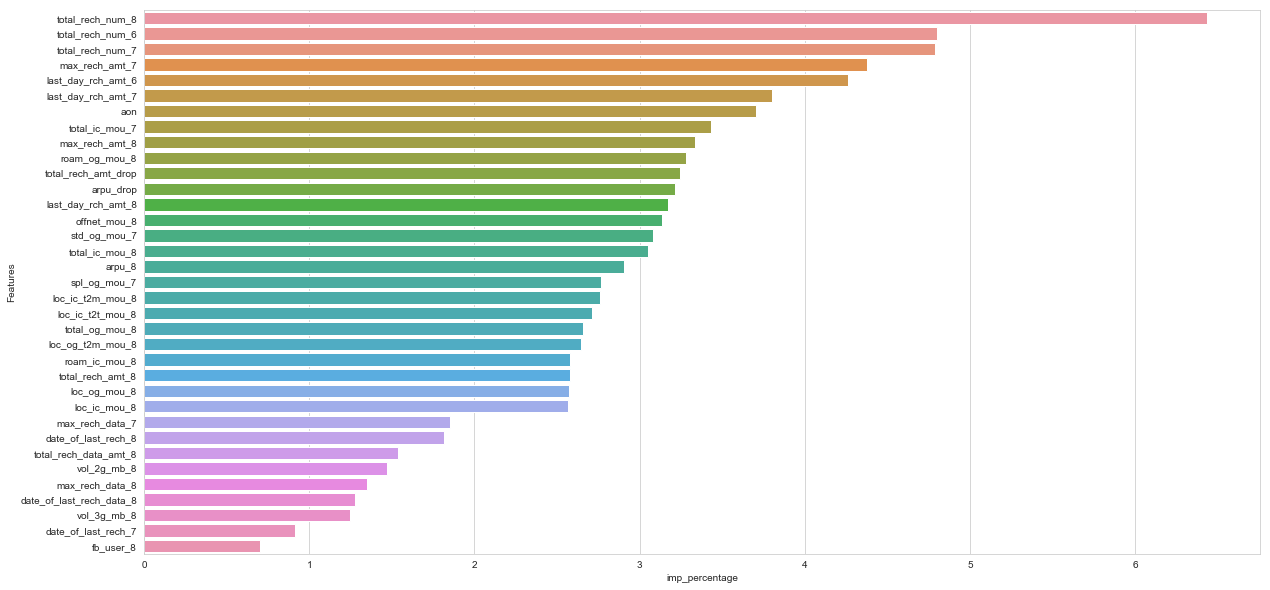

In [284]:
# feature_importance
importance = adaboost.feature_importances_

# # creating dataframe
feature_importance = pd.DataFrame({'Features': X_train_rf.columns.to_list(), 'imp_percentage': importance*100})
feature_importance = feature_importance[['Features', 'imp_percentage']]

# sort features
feature_importance = feature_importance.sort_values('imp_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.imp_percentage.sum())

plt.figure(figsize=(20,10))
sns.barplot(x = feature_importance.imp_percentage, y=feature_importance.Features)
plt.show()

**Conclusion Driven**: 
- Because of the resource constraint we couldn't try with GridSearch of AdaBoost
- As it can be seen in Adaboost, misclassification rate has dropped a lot. Accuracy has increased a lot, and also Negative Predictive power has increased but the Recall is quite less. So we would try to find an optimal hyperparameter for Adaboost so as to increase the Recall
- ROC of Adaboost and RandomForest is same

### Model to predict whether a high-value customer will churn or not
As we have done LR, to identify High Value customer or not. We would try to increase the recall for better prediction using Boosting Methods : Gradient Boosting and XGBoost & SVM

#### Gradient Boosting

In [285]:
# We will apply the Boosting on the PCA DF
# Lets try with Default set of parameters
gbc = GradientBoostingClassifier(verbose= 2, random_state=101)
gbc.fit(X_train_PCA_df, y_train_samp)

      Iter       Train Loss   Remaining Time 
         1           1.3110            2.36m
         2           1.2491            2.03m
         3           1.1974            1.89m
         4           1.1540            1.78m
         5           1.1157            1.71m
         6           1.0827            1.65m
         7           1.0548            1.61m
         8           1.0315            1.65m
         9           1.0089            1.67m
        10           0.9892            1.70m
        11           0.9715            1.71m
        12           0.9567            1.71m
        13           0.9430            1.75m
        14           0.9303            1.71m
        15           0.9193            1.66m
        16           0.9086            1.64m
        17           0.8996            1.60m
        18           0.8901            1.57m
        19           0.8818            1.54m
        20           0.8739            1.51m
        21           0.8666            1.48m
        2

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=101, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=2,
                           warm_start=False)

In [286]:
#Predicting the model
y_pred_gbc = gbc.predict(X_test_PCA_df)

Gradient Boosting, without Hyper Parameter Tuning


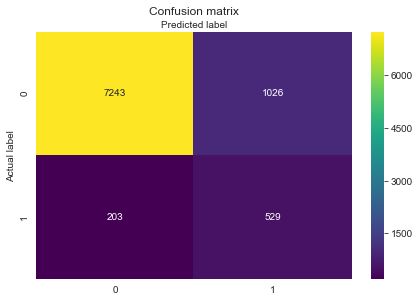

Misclassification Rate: 0.13654038440173313
Accuracy: 0.8634596155982669
Precision: 0.34019292604501605
Recall: 0.7226775956284153
Negative Predictive Power: 0.8759221187568025
Logistic Regression Model with Hyperparameter Tuning


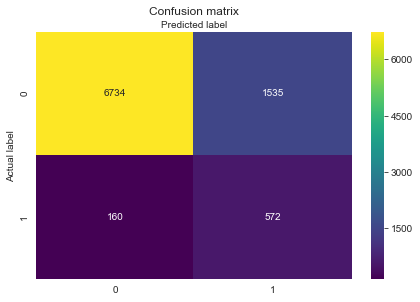

Misclassification Rate: 0.18831240973225197
Accuracy: 0.8116875902677481
Precision: 0.27147603227337447
Recall: 0.7814207650273224
Negative Predictive Power: 0.8143669125650018


In [287]:
print('Gradient Boosting, without Hyper Parameter Tuning')
visConfMat(y_test, y_pred_gbc)
print("=====================================================")
print("Logistic Regression Model with Hyperparameter Tuning")
visConfMat(y_test, lrfinaldf['Opt Cutoff'])

**Conclusion Driven**:
- As it can see Accuracy, Recall, Negative Predictive Power all have increased a lot.
- Lets try to identify the ideal hyper parameter usinf Cross Validation

### Identifying the ideal Subsample

In [288]:
# specify number of folds for k-fold CV
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# parameters to build the model on
parameters = {'subsample' : [0.2,0.4,0.6,0.8,1]}

# instantiate the model
model = GradientBoostingClassifier(verbose= 2, random_state=101)

# fit tree on training data
model_cv = GridSearchCV(model, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score = 'warn', verbose = 1, n_jobs=-1)
model_cv.fit(X_train_PCA_df, y_train_samp)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  9.6min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3091           0.0750           18.20s
         2           1.2457           0.0622           19.46s
         3           1.1970           0.0506           18.63s
         4           1.1534           0.0447           18.45s
         5           1.1125           0.0374           18.01s
         6           1.0787           0.0322           17.84s
         7           1.0490           0.0285           17.48s
         8           1.0221           0.0239           17.36s
         9           1.0131           0.0209           17.06s
        10           0.9840           0.0202           16.95s
        11           0.9698           0.0173           16.66s
        12           0.9532           0.0150           16.47s
        13           0.9321           0.0140           16.28s
        14           0.9184           0.0121           16.17s
        15           0.9246           0.0114           15.96s
       

GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                     

In [289]:
# scores of GridSearch CV
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      29.732008      0.325832         0.054778        0.012053   
1      55.663201      3.130093         0.046210        0.005839   
2      72.928411      2.543565         0.040942        0.002388   
3     118.577721     18.295711         0.072493        0.020175   
4     152.871035     31.735445         0.038942        0.013581   

  param_subsample              params  split0_test_score  split1_test_score  \
0             0.2  {'subsample': 0.2}           0.862848           0.861506   
1             0.4  {'subsample': 0.4}           0.861534           0.856503   
2             0.6  {'subsample': 0.6}           0.859695           0.856503   
3             0.8  {'subsample': 0.8}           0.859958           0.853870   
4               1    {'subsample': 1}           0.859695           0.855714   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.863625           0.862477  ...         0.863036        0.001085   
1           0.859036           0.860160  ...         0.858897        0.001844   
2           0.861586           0.855782  ...         0.858112        0.002183   
3           0.860056           0.857327  ...         0.857899        0.002263   
4           0.860311           0.852949  ...         0.856824        0.002776   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.870326            0.870909   
1                2            0.868776            0.868069   
2                3            0.868582            0.868328   
3                4            0.868001            0.869038   
4                5            0.868712            0.870974   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.866996            0.868640            0.875665   
1            0.867322            0.868250            0.869760   
2            0.870250            0.866238            0.873069   
3            0.868493            0.866952            0.869176   
4            0.866866            0.867407            0.871123   

   mean_train_score  std_train_score  
0          0.870507         0.002919  
1          0.868436         0.000810  
2          0.869294         0.002278  
3          0.868332         0.000806  
4          0.869016         0.001765  

[5 rows x 21 columns]

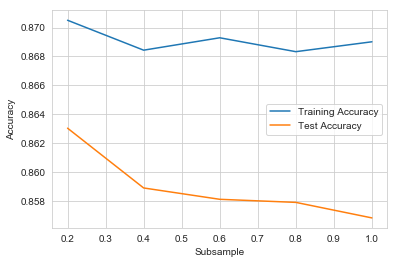

In [290]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_subsample"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_subsample"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("Subsample")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.show()

In [291]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8630364038731446 corresponding to hyperparameters {'subsample': 0.2}


### Identifying n_estimators

In [292]:
# specify number of folds for k-fold CV
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# parameters to build the model on
parameters = {'n_estimators' : range(0,300,50)}

# instantiate the model
model = GradientBoostingClassifier(verbose= 2, random_state=101, subsample=0.6)

# fit tree on training data
model_cv = GridSearchCV(model, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score = 'warn', verbose = 1, n_jobs=-1)
model_cv.fit(X_train_PCA_df, y_train_samp)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 14.0min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3111           0.0746            2.48m
         2           1.2481           0.0609            2.40m
         3           1.1961           0.0511            2.36m
         4           1.1540           0.0431            2.34m
         5           1.1157           0.0379            2.33m
         6           1.0817           0.0316            2.32m
         7           1.0531           0.0262            2.30m
         8           1.0301           0.0251            2.29m
         9           1.0116           0.0215            2.28m
        10           0.9954           0.0191            2.27m
        11           0.9754           0.0174            2.26m
        12           0.9581           0.0146            2.25m
        13           0.9389           0.0130            2.24m
        14           0.9306           0.0116            2.23m
        15           0.9178           0.0118            2.22m
       

GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                     

In [293]:
# scores of GridSearch CV
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.230559      0.091478         0.000000        0.000000   
1      36.213501      0.734969         0.033117        0.006911   
2      91.891499      6.781936         0.061208        0.022314   
3     113.301531      6.481207         0.055311        0.007247   
4     188.136386     13.085595         0.083710        0.025766   

  param_n_estimators                 params  split0_test_score  \
0                  0    {'n_estimators': 0}                NaN   
1                 50   {'n_estimators': 50}           0.820021   
2                100  {'n_estimators': 100}           0.859695   
3                150  {'n_estimators': 150}           0.881240   
4                200  {'n_estimators': 200}           0.897267   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0                NaN                NaN                NaN  ...   
1           0.817536           0.819271           0.817924  ...   
2           0.856503           0.861586           0.855782  ...   
3           0.877041           0.883253           0.877929  ...   
4           0.892312           0.896508           0.893124  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0              NaN             NaN                6                 NaN   
1         0.818156        0.001392                5            0.826413   
2         0.858112        0.002183                4            0.868582   
3         0.880084        0.002282                3            0.892283   
4         0.894301        0.002146                2            0.912108   

   split1_train_score  split2_train_score  split3_train_score  \
0                 NaN                 NaN                 NaN   
1            0.827600            0.824050            0.825935   
2            0.868328            0.870250            0.866238   
3            0.896986            0.895757            0.890641   
4            0.912670            0.909943            0.908489   

   split4_train_score  mean_train_score  std_train_score  
0                 NaN               NaN              NaN  
1            0.824335          0.825666         0.001323  
2            0.873069          0.869294         0.002278  
3            0.896106          0.894355         0.002451  
4            0.910058          0.910654         0.001532  

[5 rows x 21 columns]

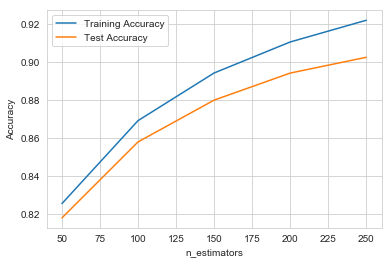

In [294]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.show()

In [295]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9026113181273523 corresponding to hyperparameters {'n_estimators': 250}


**Conclusion Driven**: As it can be seen above that the as the no of estimator increases model Accuracy increases. So in this case so as to find the 250, it took more than 25mins, so we would consider 250 as the n_estimator, because we all know. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance. 

#### Finding the ideal Learning rate

In [296]:
# specify number of folds for k-fold CV
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# parameters to build the model on
parameters = {"learning_rate": [0.2, 0.6, 0.9]}

# instantiate the model
model = GradientBoostingClassifier( random_state=101, subsample=0.6, n_estimators=250)

# fit tree on training data
model_cv = GridSearchCV(model, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score = 'warn', verbose = 1, n_jobs=-1)
model_cv.fit(X_train_PCA_df, y_train_samp)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 13.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=250,
                     

In [297]:
# scores of GridSearch CV
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     186.673723     20.126151         0.074793        0.004526   
1     222.796782      7.048642         0.082428        0.017361   
2     175.986227     31.158213         0.061050        0.027423   

  param_learning_rate                  params  split0_test_score  \
0                 0.2  {'learning_rate': 0.2}           0.925644   
1                 0.6  {'learning_rate': 0.6}           0.922754   
2                 0.9  {'learning_rate': 0.9}           0.910930   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.919168           0.927606           0.925573  ...   
1           0.918115           0.924038           0.919907  ...   
2           0.907846           0.899312           0.904970  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.924808        0.002914                1            0.956991   
1         0.920524        0.002486                2            0.975525   
2         0.905648        0.003836                3            0.958024   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.955851            0.955557            0.955283   
1            0.960756            0.967595            0.956711   
2            0.956948            0.933043            0.946002   

   split4_train_score  mean_train_score  std_train_score  
0            0.956327          0.956002         0.000603  
1            0.967618          0.965641         0.006466  
2            0.957041          0.950212         0.009649  

[3 rows x 21 columns]

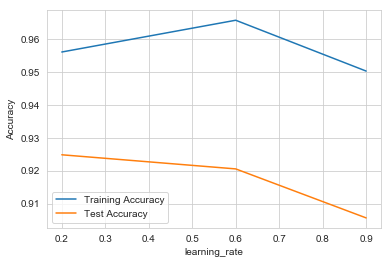

In [298]:
# plotting accuracies with learning_rate
plt.figure()
plt.plot(scores["param_learning_rate"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_learning_rate"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("learning_rate")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.show()

In [299]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9248082249842737 corresponding to hyperparameters {'learning_rate': 0.2}


### Determining the max_depth

In [300]:
# specify number of folds for k-fold CV
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# parameters to build the model on
parameters = {"max_depth": [1,2,3]}

# instantiate the model
model = GradientBoostingClassifier( random_state=101, subsample=0.6, n_estimators=250, learning_rate=0.6)

# fit tree on training data
model_cv = GridSearchCV(model, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score = 'warn', verbose = 1, n_jobs=-1)
model_cv.fit(X_train_PCA_df, y_train_samp)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  8.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.6,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=250,
                     

In [301]:
# scores of GridSearch CV
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      64.982871      0.932141         0.051458        0.011104   
1     120.163984      0.467596         0.064229        0.012646   
2     163.634582     20.837085         0.054507        0.013955   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.878613           0.878620   
1               2  {'max_depth': 2}           0.907777           0.904423   
2               3  {'max_depth': 3}           0.922754           0.918115   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.877390           0.884110  ...         0.878289        0.003633   
1           0.902880           0.909864  ...         0.905716        0.002665   
2           0.924038           0.919907  ...         0.920524        0.002486   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.894866            0.894985   
1                2            0.943235            0.931647   
2                1            0.975525            0.960756   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.888274            0.893043            0.894873   
1            0.928032            0.934320            0.927644   
2            0.967595            0.956711            0.967618   

   mean_train_score  std_train_score  
0          0.893208         0.002571  
1          0.932976         0.005687  
2          0.965641         0.006466  

[3 rows x 21 columns]

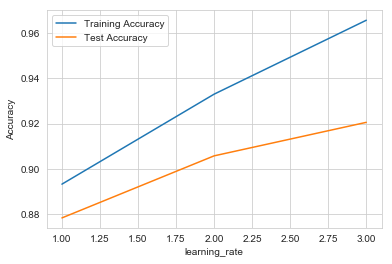

In [302]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("learning_rate")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.show()

In [303]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))
# As it can be seen as the depth increases the model performaance is increasing

The best test score is 0.9205236096429804 corresponding to hyperparameters {'max_depth': 3}


In [304]:
# With all the identified hyperparameter lets build the final model
gradient_boost = GradientBoostingClassifier( random_state=101, subsample=0.6, n_estimators=250, learning_rate=0.6, max_depth=3)
gradient_boost.fit(X_train_PCA_df, y_train_samp)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.6, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=101, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [305]:
#Predicting the model
y_pred_gradient_boost = gradient_boost.predict(X_test_PCA_df)

Gradient Boosting with Hyper Parameter Tuning


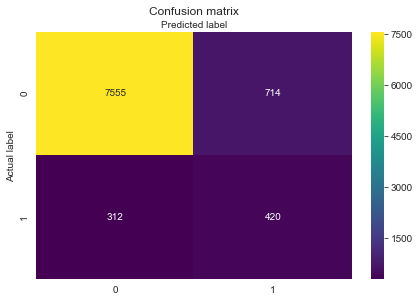

Misclassification Rate: 0.11398733474058438
Accuracy: 0.8860126652594156
Precision: 0.37037037037037035
Recall: 0.5737704918032787
Negative Predictive Power: 0.9136534042810497
Logistic Regression Model with Hyperparameter Tuning


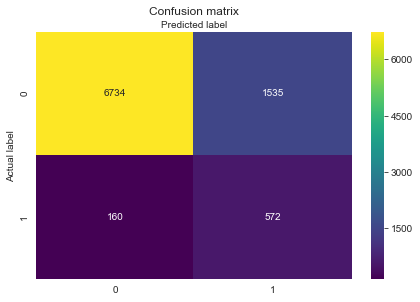

Misclassification Rate: 0.18831240973225197
Accuracy: 0.8116875902677481
Precision: 0.27147603227337447
Recall: 0.7814207650273224
Negative Predictive Power: 0.8143669125650018


In [306]:
print('Gradient Boosting with Hyper Parameter Tuning')
visConfMat(y_test, y_pred_gradient_boost)
print("=====================================================")

print("Logistic Regression Model with Hyperparameter Tuning")
visConfMat(y_test, lrfinaldf['Opt Cutoff'])

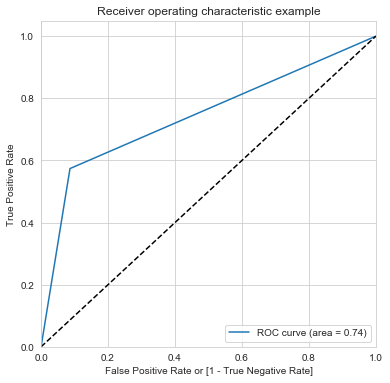

(array([0.       , 0.0863466, 1.       ]),
 array([0.        , 0.57377049, 1.        ]),
 array([2, 1, 0]))

In [307]:
#Plotting ROC curve of Random Forest Model
draw_roc(y_test, y_pred_gradient_boost)

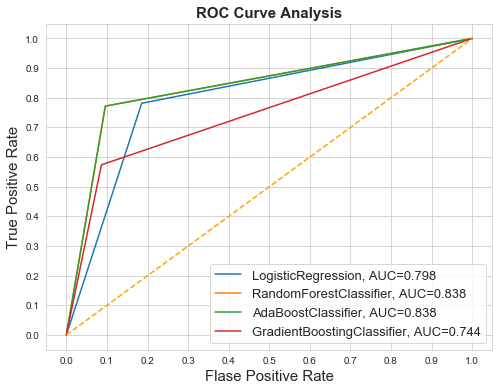

In [308]:
result_table = aucroc(y_test, y_pred_gradient_boost, gradient_boost, result_table)

In [309]:
result_table

classifiers                              fpr  \
0          LogisticRegression  [0.0, 0.18563308743499818, 1.0]   
1      RandomForestClassifier  [0.0, 0.09602128431491111, 1.0]   
2          AdaBoostClassifier  [0.0, 0.09602128431491111, 1.0]   
3  GradientBoostingClassifier   [0.0, 0.0863465957189503, 1.0]   

                              tpr       auc  misclassification_rate  accuracy  \
0  [0.0, 0.7814207650273224, 1.0]  0.797894                    0.19      0.81   
1  [0.0, 0.7718579234972678, 1.0]  0.837918                    0.11      0.89   
2  [0.0, 0.7718579234972678, 1.0]  0.837918                    0.11      0.89   
3  [0.0, 0.5737704918032787, 1.0]  0.743712                    0.11      0.89   

   precision  recall  predictive_power  
0       0.27    0.78              0.81  
1       0.42    0.77              0.90  
2       0.42    0.77              0.90  
3       0.37    0.57              0.91

### Lets try with XGBoost

In [310]:
# Lets try fitting the model with default parameter
xgboost = XGBClassifier(random_state= 101)
xgboost.fit(X_train_PCA_df, y_train_samp)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=101, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [311]:
#Predicting the model
y_pred_xgboost = xgboost.predict(X_test_PCA_df)

XG Boost without Hyper Parameter Tuning


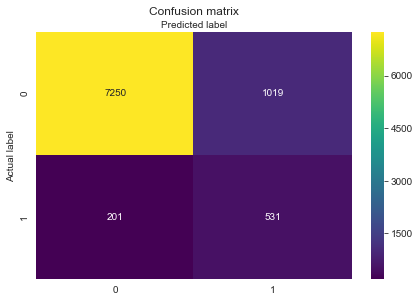

Misclassification Rate: 0.13554049550049996
Accuracy: 0.8644595044995
Precision: 0.34258064516129033
Recall: 0.7254098360655737
Negative Predictive Power: 0.8767686540089491
Gradient Boosting with Hyper Parameter Tuning


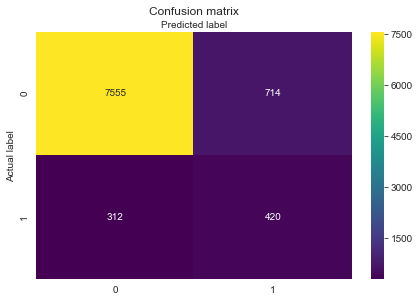

Misclassification Rate: 0.11398733474058438
Accuracy: 0.8860126652594156
Precision: 0.37037037037037035
Recall: 0.5737704918032787
Negative Predictive Power: 0.9136534042810497
Logistic Regression Model with Hyperparameter Tuning


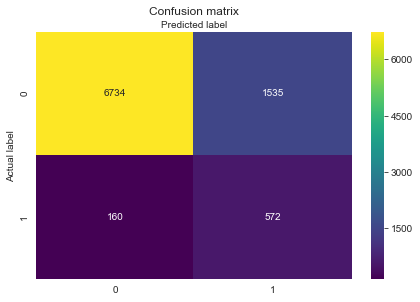

Misclassification Rate: 0.18831240973225197
Accuracy: 0.8116875902677481
Precision: 0.27147603227337447
Recall: 0.7814207650273224
Negative Predictive Power: 0.8143669125650018


In [312]:
print('XG Boost without Hyper Parameter Tuning')
visConfMat(y_test, y_pred_xgboost)
print("=====================================================")

print('Gradient Boosting with Hyper Parameter Tuning')
visConfMat(y_test, y_pred_gradient_boost)
print("=====================================================")

print("Logistic Regression Model with Hyperparameter Tuning")
visConfMat(y_test, lrfinaldf['Opt Cutoff'])

### Lets try to tune the XGBoost Hyperparameter for better Recall

#### Lets find subsample

In [313]:
# specify number of folds for k-fold CV
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# parameters to build the model on
parameters = {'subsample': [0.3, 0.6, 0.9]}

# instantiate the model
model = XGBClassifier(max_depth=2, n_estimators=100, random_state=101, nthread=4)

# fit tree on training data
model_cv = GridSearchCV(model, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score = 'warn', verbose = 1, n_jobs=-1)
model_cv.fit(X_train_PCA_df, y_train_samp)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bytree=1,
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=2,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=4,
                                     objective='binary:logistic',
                                     random_state=101, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=True, subsample=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'subsample': [0.3, 0.6, 0.9]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score='warn', scoring='recall',
 

In [314]:
# scores of GridSearch CV
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      14.909075      0.121537         0.081203        0.017149   
1      19.904546      1.446452         0.083860        0.015056   
2      23.645294      1.889489         0.082750        0.009663   

  param_subsample              params  split0_test_score  split1_test_score  \
0             0.3  {'subsample': 0.3}           0.832633           0.828857   
1             0.6  {'subsample': 0.6}           0.828954           0.819642   
2             0.9  {'subsample': 0.9}           0.826064           0.825171   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.833546           0.828741  ...         0.830177        0.002474   
1           0.828448           0.821787  ...         0.824260        0.003748   
2           0.823095           0.822817  ...         0.823872        0.001481   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.834937            0.837862   
1                2            0.830869            0.828439   
2                3            0.827188            0.832376   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.834656            0.833788            0.835821   
1            0.831273            0.828596            0.830045   
2            0.825612            0.826778            0.828748   

   mean_train_score  std_train_score  
0          0.835413         0.001386  
1          0.829844         0.001155  
2          0.828140         0.002344  

[3 rows x 21 columns]

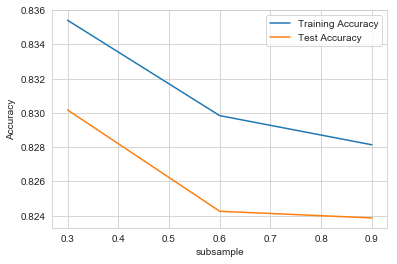

In [315]:
# plotting accuracies with subsample
plt.figure()
plt.plot(scores["param_subsample"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_subsample"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("subsample")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.show()

In [316]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))
# As it can be seen as the depth increases the model performaance is increasing

The best test score is 0.8301765629304315 corresponding to hyperparameters {'subsample': 0.3}


#### Lets find Learning rate

In [317]:
# specify number of folds for k-fold CV
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# parameters to build the model on
parameters = {'learning_rate': [0.01,0.2, 0.6, 0.9]}

# instantiate the model
model = XGBClassifier(max_depth=2, n_estimators=100, random_state=101, nthread=4, subsample=0.3)

# fit tree on training data
model_cv = GridSearchCV(model, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score = 'warn', verbose = 1, n_jobs=-1)
model_cv.fit(X_train_PCA_df, y_train_samp)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bytree=1,
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=2,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=4,
                                     objective='binary:logistic',
                                     random_state=101, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=True, subsample=0.3),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.2, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       

In [318]:
# scores of GridSearch CV
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      21.416005      1.612236         0.195382        0.057289   
1      22.408191      2.782699         0.147429        0.044125   
2      19.769272      0.512850         0.117073        0.013350   
3      21.996935      0.794922         0.152575        0.035765   

  param_learning_rate                   params  split0_test_score  \
0                0.01  {'learning_rate': 0.01}           0.726484   
1                 0.2   {'learning_rate': 0.2}           0.866001   
2                 0.6   {'learning_rate': 0.6}           0.890699   
3                 0.9   {'learning_rate': 0.9}           0.886495   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.740390           0.736681           0.724440  ...   
1           0.862296           0.873821           0.860932  ...   
2           0.884413           0.890135           0.882823  ...   
3           0.876251           0.875096           0.876642  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.732005        0.005998                4            0.731611   
1         0.865555        0.004499                3            0.871747   
2         0.887558        0.003271                1            0.905715   
3         0.877130        0.005068                2            0.904617   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.742400            0.728136            0.727739   
1            0.872200            0.875781            0.870846   
2            0.905183            0.902785            0.902323   
3            0.900084            0.900898            0.898300   

   split4_train_score  mean_train_score  std_train_score  
0            0.736080          0.733193         0.005494  
1            0.875276          0.873170         0.001981  
2            0.905646          0.904330         0.001469  
3            0.898897          0.900559         0.002222  

[4 rows x 21 columns]

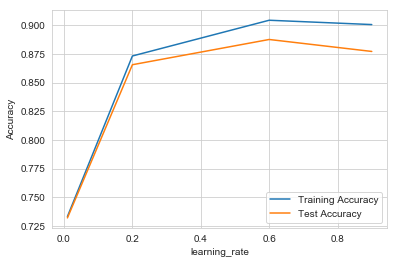

In [319]:
# plotting accuracies with learning_rate
plt.figure()
plt.plot(scores["param_learning_rate"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_learning_rate"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("learning_rate")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.show()

In [320]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))
# As it can be seen as the depth increases the model performaance is increasing

The best test score is 0.887557710092415 corresponding to hyperparameters {'learning_rate': 0.6}


#### Lets try to identify min_child_weight

In [321]:
# specify number of folds for k-fold CV
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# parameters to build the model on
parameters = {'min_child_weight':range(1,15,2)}

# instantiate the model
model = XGBClassifier(max_depth=2, n_estimators=100, random_state=101, nthread=4, subsample=0.3, learning_rate=0.6)

# fit tree on training data
model_cv = GridSearchCV(model, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score = 'warn', verbose = 1, n_jobs=-1)
model_cv.fit(X_train_PCA_df, y_train_samp)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  2.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bytree=1,
                                     gamma=0, learning_rate=0.6,
                                     max_delta_step=0, max_depth=2,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=4,
                                     objective='binary:logistic',
                                     random_state=101, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=True, subsample=0.3),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_child_weight': range(1, 15, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
          

In [322]:
# scores of GridSearch CV
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      21.461505      1.091158         0.220670        0.021817   
1      21.233264      2.284645         0.312719        0.120243   
2      20.570016      3.147481         0.160763        0.114187   
3      15.270360      1.395737         0.083675        0.010345   
4      12.022780      0.470541         0.060395        0.004639   

  param_min_child_weight                   params  split0_test_score  \
0                      1  {'min_child_weight': 1}           0.890699   
1                      3  {'min_child_weight': 3}           0.893064   
2                      5  {'min_child_weight': 5}           0.890173   
3                      7  {'min_child_weight': 7}           0.887546   
4                      9  {'min_child_weight': 9}           0.895691   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.884413           0.890135           0.882823  ...   
1           0.883096           0.888861           0.890291  ...   
2           0.879147           0.893194           0.890806  ...   
3           0.885729           0.890900           0.884368  ...   
4           0.878620           0.889625           0.886170  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.887558        0.003271                3            0.905715   
1         0.888645        0.003274                1            0.907523   
2         0.888299        0.004848                2            0.906555   
3         0.887137        0.002190                5            0.907911   
4         0.887089        0.005587                6            0.907136   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.905183            0.902785            0.902323   
1            0.901827            0.904867            0.904595   
2            0.907055            0.908121            0.904920   
3            0.904667            0.909357            0.897975   
4            0.901891            0.906950            0.903881   

   split4_train_score  mean_train_score  std_train_score  
0            0.905646          0.904330         0.001469  
1            0.904348          0.904632         0.001809  
2            0.906619          0.906654         0.001033  
3            0.901687          0.904319         0.004137  
4            0.904413          0.904854         0.001976  

[5 rows x 21 columns]

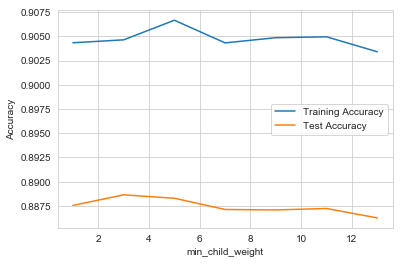

In [323]:
# plotting accuracies with min_child_weight
plt.figure()
plt.plot(scores["param_min_child_weight"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_child_weight"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_child_weight")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.show()

In [324]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8886454028041543 corresponding to hyperparameters {'min_child_weight': 3}


## Identifying Based on Gamma
A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [325]:
# specify number of folds for k-fold CV
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# parameters to build the model on
parameters = {'gamma':[i/10.0 for i in range(0,5)]}

# instantiate the model
model = XGBClassifier(max_depth=2, n_estimators=100, random_state=101, nthread=4, subsample=0.3, learning_rate=0.6, min_child_weight=9)

# fit tree on training data
model_cv = GridSearchCV(model, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score = 'warn', verbose = 1, n_jobs=-1)
model_cv.fit(X_train_PCA_df, y_train_samp)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bytree=1,
                                     gamma=0, learning_rate=0.6,
                                     max_delta_step=0, max_depth=2,
                                     min_child_weight=9, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=4,
                                     objective='binary:logistic',
                                     random_state=101, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=True, subsample=0.3),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
           

In [326]:
# scores of GridSearch CV
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_gamma  \
0      10.989167      0.149773         0.051270        0.014467           0   
1      10.824654      0.089999         0.047197        0.007712         0.1   
2      11.609130      0.527556         0.074314        0.024106         0.2   
3      13.464352      0.683657         0.058245        0.011447         0.3   
4      11.987564      3.609671         0.082503        0.036650         0.4   

           params  split0_test_score  split1_test_score  split2_test_score  \
0  {'gamma': 0.0}           0.895691            0.87862           0.889625   
1  {'gamma': 0.1}           0.895691            0.87862           0.889625   
2  {'gamma': 0.2}           0.895691            0.87862           0.889625   
3  {'gamma': 0.3}           0.895691            0.87862           0.889625   
4  {'gamma': 0.4}           0.895691            0.87862           0.889625   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0            0.88617  ...         0.887089        0.005587                1   
1            0.88617  ...         0.887089        0.005587                1   
2            0.88617  ...         0.887089        0.005587                1   
3            0.88617  ...         0.887089        0.005587                1   
4            0.88617  ...         0.887089        0.005587                1   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.907136            0.901891             0.90695   
1            0.907136            0.901891             0.90695   
2            0.907136            0.901891             0.90695   
3            0.907136            0.901891             0.90695   
4            0.907136            0.901891             0.90695   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.903881            0.904413          0.904854         0.001976  
1            0.903881            0.904413          0.904854         0.001976  
2            0.903881            0.904413          0.904854         0.001976  
3            0.903881            0.904413          0.904854         0.001976  
4            0.903881            0.904413          0.904854         0.001976  

[5 rows x 21 columns]

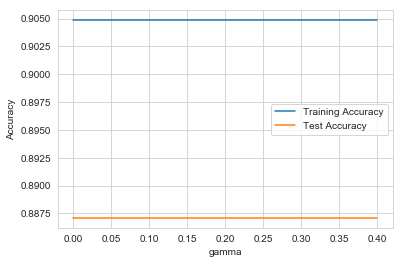

In [327]:
# plotting accuracies with gamma
plt.figure()
plt.plot(scores["param_gamma"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_gamma"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("gamma")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.show()

In [328]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8870891888763079 corresponding to hyperparameters {'gamma': 0.0}


### Identifying regularisation alpha: for handling overfitting



In [329]:
# specify number of folds for k-fold CV
n_folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# parameters to build the model on
parameters = {'reg_alpha':[0.0001, 0.001, 0.01, 0.1,  1, 100]}

# instantiate the model
model = XGBClassifier(max_depth=2, n_estimators=100, random_state=101, nthread=4, subsample=0.3, learning_rate=0.6, min_child_weight=9, gamma = 0)

# fit tree on training data
model_cv = GridSearchCV(model, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score = 'warn', verbose = 1, n_jobs=-1)
model_cv.fit(X_train_PCA_df, y_train_samp)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bytree=1,
                                     gamma=0, learning_rate=0.6,
                                     max_delta_step=0, max_depth=2,
                                     min_child_weight=9, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=4,
                                     objective='binary:logistic',
                                     random_state=101, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=True, subsample=0.3),
             iid='deprecated', n_jobs=-1,
             param_grid={'reg_alpha': [0.0001, 0.001, 0.01, 0.1, 1, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn'

In [330]:
# scores of GridSearch CV
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      15.729637      2.187699         0.076567        0.020640   
1      19.596976      1.136217         0.088619        0.013675   
2      16.333732      1.436893         0.088325        0.032624   
3      19.084831      1.890086         0.073707        0.015675   
4      20.627244      2.338795         0.083812        0.042411   

  param_reg_alpha                 params  split0_test_score  \
0          0.0001  {'reg_alpha': 0.0001}           0.895691   
1           0.001   {'reg_alpha': 0.001}           0.895691   
2            0.01    {'reg_alpha': 0.01}           0.895691   
3             0.1     {'reg_alpha': 0.1}           0.887546   
4               1       {'reg_alpha': 1}           0.888071   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.878620           0.889625           0.886170  ...   
1           0.890469           0.889625           0.886170  ...   
2           0.887836           0.889625           0.886170  ...   
3           0.883623           0.891919           0.882307  ...   
4           0.892312           0.890135           0.887458  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.887089        0.005587                4            0.907136   
1         0.889459        0.003679                1            0.907136   
2         0.888881        0.003737                2            0.907136   
3         0.885889        0.003477                5            0.908040   
4         0.888302        0.002930                3            0.907330   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.901891            0.906950            0.903881   
1            0.902924            0.906950            0.903881   
2            0.907636            0.906950            0.903881   
3            0.902859            0.903631            0.903102   
4            0.903440            0.907275            0.902908   

   split4_train_score  mean_train_score  std_train_score  
0            0.904413          0.904854         0.001976  
1            0.904413          0.905061         0.001688  
2            0.904413          0.906003         0.001541  
3            0.902401          0.904007         0.002055  
4            0.904607          0.905112         0.001871  

[5 rows x 21 columns]

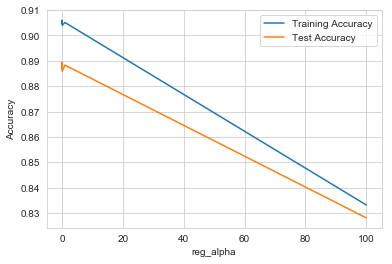

In [331]:
# plotting accuracies with reg_alpha
plt.figure()
plt.plot(scores["param_reg_alpha"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_reg_alpha"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("reg_alpha")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.show()

In [332]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8894588571227533 corresponding to hyperparameters {'reg_alpha': 0.001}


In [333]:
# Lets build the final model
xgboost_final = XGBClassifier(max_depth=2, n_estimators=100, random_state=101, nthread=4, subsample=0.3, learning_rate=0.6, min_child_weight=9, gamma = 0, reg_alpha=0.001)
xgboost_final.fit(X_train_PCA_df, y_train_samp)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=9, missing=None, n_estimators=100,
              n_jobs=1, nthread=4, objective='binary:logistic',
              random_state=101, reg_alpha=0.001, reg_lambda=1,
              scale_pos_weight=1, seed=None, silent=True, subsample=0.3)

In [334]:
#Predicting the model
y_pred_xgboost = xgboost_final.predict(X_test_PCA_df)

XG Boosting with Hyper Parameter Tuning


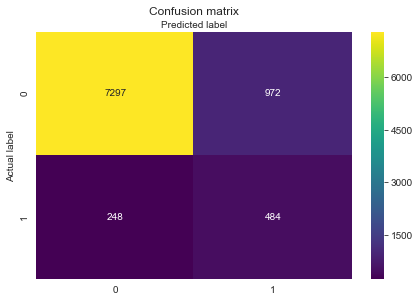

Misclassification Rate: 0.13554049550049996
Accuracy: 0.8644595044995
Precision: 0.3324175824175824
Recall: 0.6612021857923497
Negative Predictive Power: 0.882452533559076
Gradient Boosting with Hyper Parameter Tuning


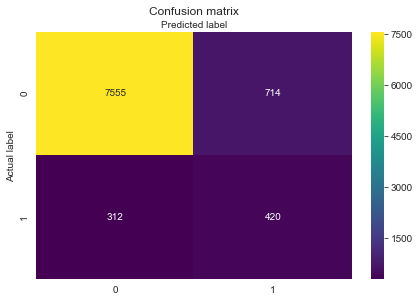

Misclassification Rate: 0.11398733474058438
Accuracy: 0.8860126652594156
Precision: 0.37037037037037035
Recall: 0.5737704918032787
Negative Predictive Power: 0.9136534042810497
Logistic Regression Model with Hyperparameter Tuning


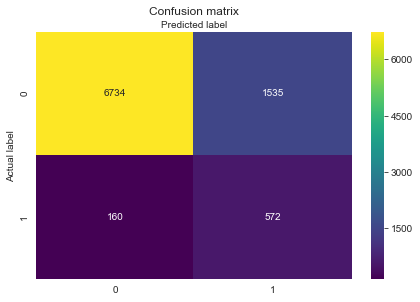

Misclassification Rate: 0.18831240973225197
Accuracy: 0.8116875902677481
Precision: 0.27147603227337447
Recall: 0.7814207650273224
Negative Predictive Power: 0.8143669125650018


In [335]:
print('XG Boosting with Hyper Parameter Tuning')
visConfMat(y_test, y_pred_xgboost)
print("=====================================================")

print('Gradient Boosting with Hyper Parameter Tuning')
visConfMat(y_test, y_pred_gradient_boost)
print("=====================================================")

print("Logistic Regression Model with Hyperparameter Tuning")
visConfMat(y_test, lrfinaldf['Opt Cutoff'])

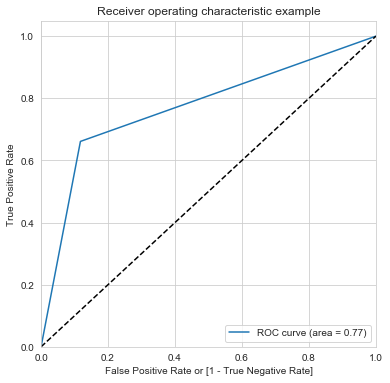

(array([0.        , 0.11754747, 1.        ]),
 array([0.        , 0.66120219, 1.        ]),
 array([2, 1, 0]))

In [336]:
#Plotting ROC curve of Random Forest Model
draw_roc(y_test, y_pred_xgboost)

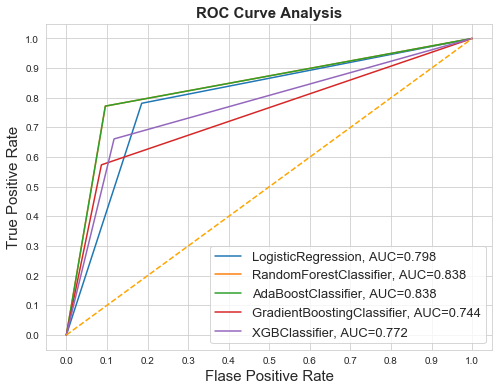

In [337]:
result_table = aucroc(y_test, y_pred_xgboost, xgboost_final, result_table)

In [338]:
result_table

classifiers                              fpr  \
0          LogisticRegression  [0.0, 0.18563308743499818, 1.0]   
1      RandomForestClassifier  [0.0, 0.09602128431491111, 1.0]   
2          AdaBoostClassifier  [0.0, 0.09602128431491111, 1.0]   
3  GradientBoostingClassifier   [0.0, 0.0863465957189503, 1.0]   
4               XGBClassifier  [0.0, 0.11754746644092394, 1.0]   

                              tpr       auc  misclassification_rate  accuracy  \
0  [0.0, 0.7814207650273224, 1.0]  0.797894                    0.19      0.81   
1  [0.0, 0.7718579234972678, 1.0]  0.837918                    0.11      0.89   
2  [0.0, 0.7718579234972678, 1.0]  0.837918                    0.11      0.89   
3  [0.0, 0.5737704918032787, 1.0]  0.743712                    0.11      0.89   
4  [0.0, 0.6612021857923497, 1.0]  0.771827                    0.14      0.86   

   precision  recall  predictive_power  
0       0.27    0.78              0.81  
1       0.42    0.77              0.90  
2       0.42    0.77              0.90  
3       0.37    0.57              0.91  
4       0.33    0.66              0.88

### Lets try with SVM with Linear Kernel

In [ ]:
#The code below has been commented out because of the lack in computation resource

#Building the final model
# linearmodel = SVC(kernel='linear', random_state = 101)
# linearmodel.fit(X_train_PCA_df, y_train_samp )

In [ ]:
# Predicting the outcome
# y_test_SVM = linearmodel.predict(X_test_PCA_df)

XG Boosting with Hyper Parameter Tuning


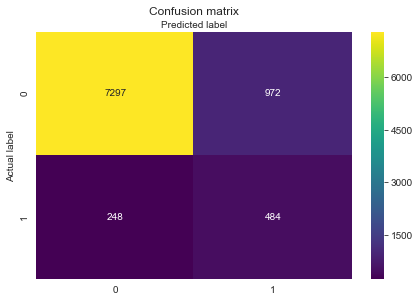

Misclassification Rate: 0.13554049550049996
Accuracy: 0.8644595044995
Precision: 0.3324175824175824
Recall: 0.6612021857923497
Negative Predictive Power: 0.882452533559076
Gradient Boosting with Hyper Parameter Tuning


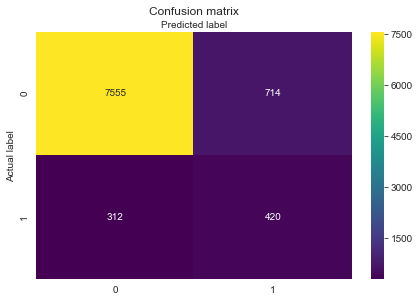

Misclassification Rate: 0.11398733474058438
Accuracy: 0.8860126652594156
Precision: 0.37037037037037035
Recall: 0.5737704918032787
Negative Predictive Power: 0.9136534042810497
Logistic Regression Model with Hyperparameter Tuning


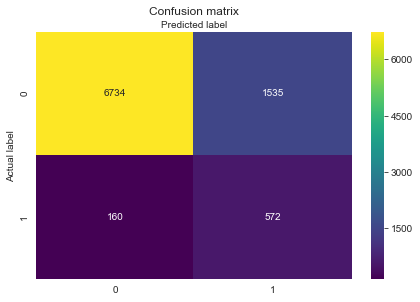

Misclassification Rate: 0.18831240973225197
Accuracy: 0.8116875902677481
Precision: 0.27147603227337447
Recall: 0.7814207650273224
Negative Predictive Power: 0.8143669125650018


In [339]:
# print('SVM without Hyper Parameter Tuning')
# visConfMat(y_test, y_test_SVM)
# print("=====================================================")

print('XG Boosting with Hyper Parameter Tuning')
visConfMat(y_test, y_pred_xgboost)
print("=====================================================")

print('Gradient Boosting with Hyper Parameter Tuning')
visConfMat(y_test, y_pred_gradient_boost)
print("=====================================================")

print("Logistic Regression Model with Hyperparameter Tuning")
visConfMat(y_test, lrfinaldf['Opt Cutoff'])

In [ ]:
#Plotting ROC curve of SVM
# draw_roc(y_test, y_test_SVM)

In [ ]:
# result_table = aucroc(y_test, y_test_SVM, linearmodel, result_table)

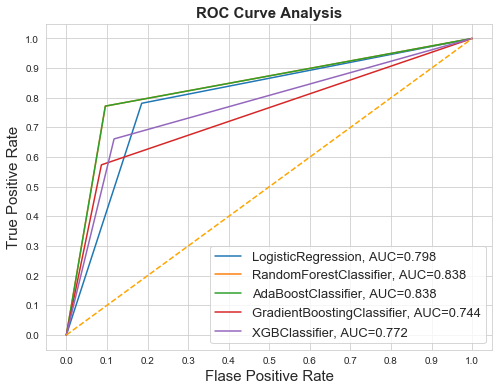

In [344]:
# Plotting the ROC Curver  
def aucroc_plot(result_table):
    fig = plt.figure(figsize=(8,6))

    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'],
                  result_table.loc[i]['tpr'],
                  label="{}, AUC={:.3f}".format(result_table.loc[i]['classifiers'], result_table.loc[i]['auc']))

    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("Flase Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')

    plt.show()
aucroc_plot(result_table)

In [345]:
result_table

classifiers                              fpr  \
0          LogisticRegression  [0.0, 0.18563308743499818, 1.0]   
1      RandomForestClassifier  [0.0, 0.09602128431491111, 1.0]   
2          AdaBoostClassifier  [0.0, 0.09602128431491111, 1.0]   
3  GradientBoostingClassifier   [0.0, 0.0863465957189503, 1.0]   
4               XGBClassifier  [0.0, 0.11754746644092394, 1.0]   

                              tpr       auc  misclassification_rate  accuracy  \
0  [0.0, 0.7814207650273224, 1.0]  0.797894                    0.19      0.81   
1  [0.0, 0.7718579234972678, 1.0]  0.837918                    0.11      0.89   
2  [0.0, 0.7718579234972678, 1.0]  0.837918                    0.11      0.89   
3  [0.0, 0.5737704918032787, 1.0]  0.743712                    0.11      0.89   
4  [0.0, 0.6612021857923497, 1.0]  0.771827                    0.14      0.86   

   precision  recall  predictive_power  
0       0.27    0.78              0.81  
1       0.42    0.77              0.90  
2       0.42    0.77              0.90  
3       0.37    0.57              0.91  
4       0.33    0.66              0.88

**Conclusion**

1. As telecom churn is one of the most crucial decision to make, the metric that played very important role was 'Recall'. Due to data imbalance, it was tough to maintain the Recall accuracy. Taking that into concern all the hyperparameters of different classifiers were tuned accordingly.

2. While doing the split into train and test set, strartified train_test_split was used to maintain the uniform data distribution.

3. To deal with data imbalance, SMOTE (Synthetic Minority Oversampling Technique) technique was used that generated the virtual training records by linear interpolation for the minority class.

4. We took 100 Principal Components at the time of dimensionality reduction using PCA that were able to explain 92% of variance of the data therby getting rid of existing multicollinearity.

5. The first classifier that we took to build the model was Logistic Regression where features that had p value > 0.05 and vif > 5 were removed, eventually reducing bunch of more insignificant variables. 
    - AUC score came out to be 0.8 but the misclassification rate was pretty high.
    - Recall score from the Logistic Regression was highest amongst all other classifiers.
   
6. Random Forest Classifier was used in order to determine the weighted features. Those features were then used to make Random Foerst model and hyperparameters were tuned to achieve maximum recall.
    - AUC score from Random Forest was highest amogst all other classifiers.
    - Misclassification Ratio also came out to be better than other classifiers.
    
7. To increase the performance of Random Forest model, we applied boosting algorithms like AdaBoost, Gradient Boost and XGBoost
    - AdaBoost was applied with default hyperparameters. Tuning the hyperparameters was skipped as it took a lot of computation time even with the default hyperparameters. Any significant increment on metric scores were not obtained.
    - Random Forest and AdaBoost was applied to fetch the top weighted features 

8. Gradient Boosting and XGBoost was applied on the PCA outcome dataframe of Logistic Regression to build a better model to predict and to identify the key Principal Components.
    - AUC score was better in case of XGBoost than Gradient Boost.
    - Recall came out to be better in case of XGBoost
    - Misclassification rate was a bit higher for XGBoost
    
9. **Final Conclusion:** The best model in this problem was found to be Logistic Regression as Recall is one of the most crucial metric, Logistic Regression gave the best score.

### Recommendations

#### Listing the top Features

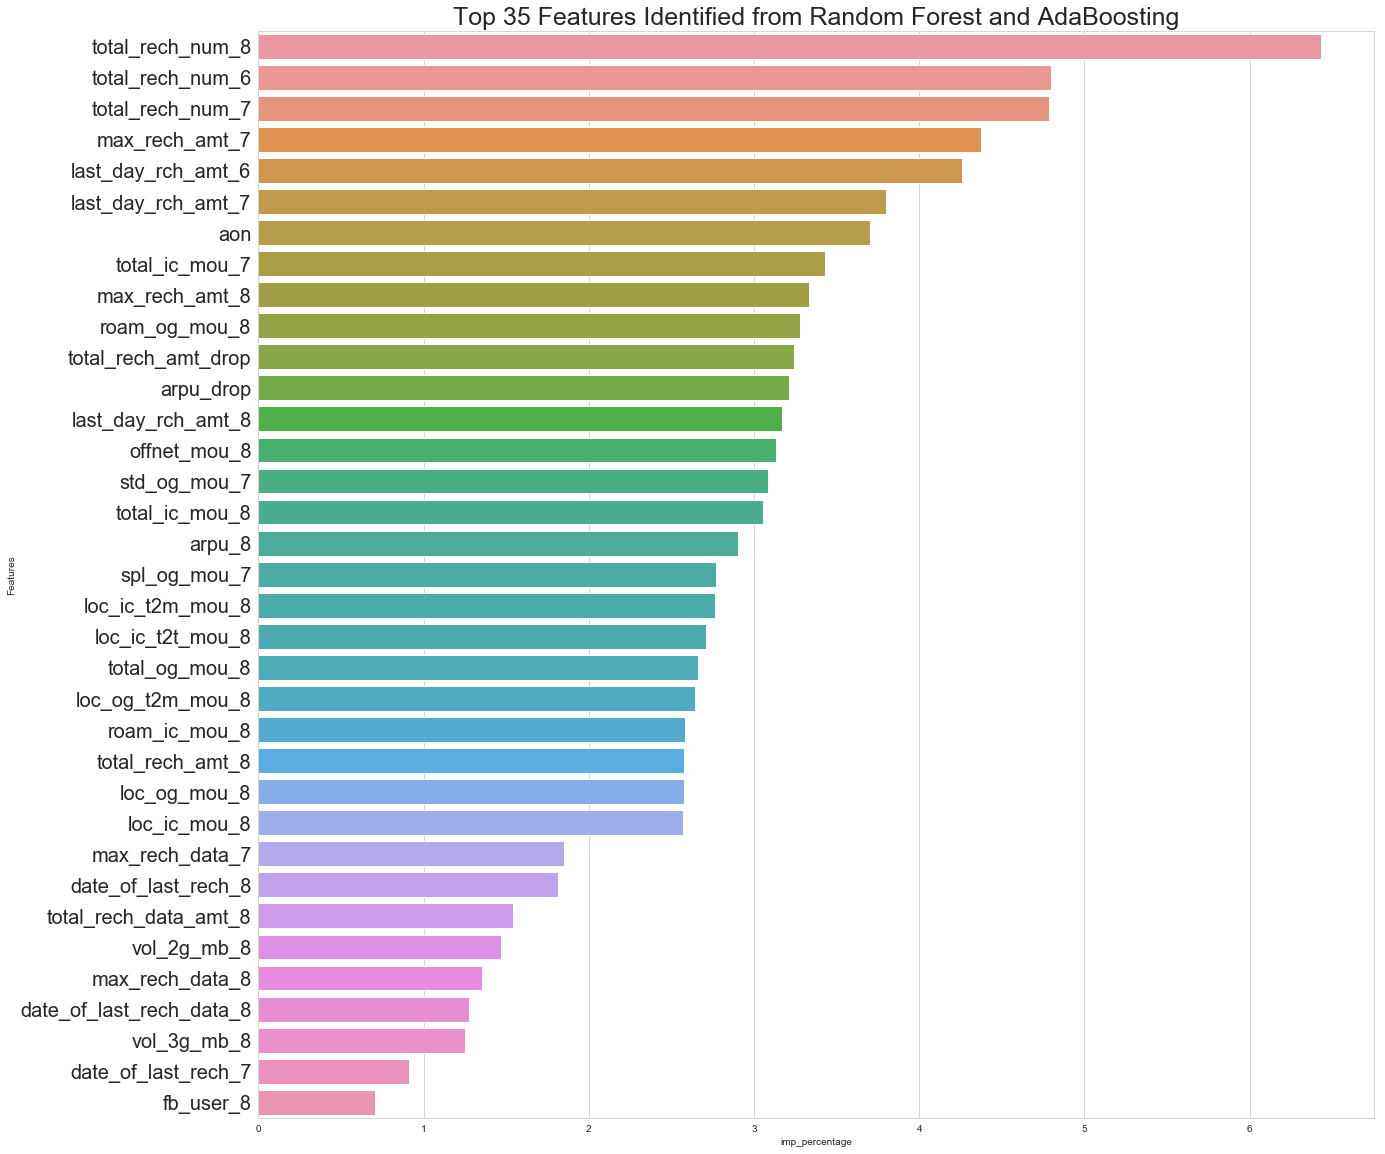

In [356]:
plt.figure(figsize=(20,20))
sns.barplot(x = feature_importance.imp_percentage, y=feature_importance.Features)
plt.yticks(fontsize=20)
# plt.ylabel(fontsize=15)
plt.title('Top 35 Features Identified from Random Forest and AdaBoosting', fontsize =25)
plt.show()

In [351]:
feature_importance

Features  imp_percentage
0           total_rech_num_8        6.433489
1           total_rech_num_6        4.798524
2           total_rech_num_7        4.786222
3             max_rech_amt_7        4.374449
4         last_day_rch_amt_6        4.258653
5         last_day_rch_amt_7        3.799964
6                        aon        3.703546
7             total_ic_mou_7        3.430718
8             max_rech_amt_8        3.331742
9              roam_og_mou_8        3.280466
10       total_rech_amt_drop        3.243260
11                 arpu_drop        3.213676
12        last_day_rch_amt_8        3.170480
13              offnet_mou_8        3.134813
14              std_og_mou_7        3.081750
15            total_ic_mou_8        3.051282
16                    arpu_8        2.903673
17              spl_og_mou_7        2.768443
18          loc_ic_t2m_mou_8        2.761409
19          loc_ic_t2t_mou_8        2.710837
20            total_og_mou_8        2.657609
21          loc_og_t2m_mou_8        2.645054
22             roam_ic_mou_8        2.580994
23          total_rech_amt_8        2.575530
24              loc_og_mou_8        2.573093
25              loc_ic_mou_8        2.567416
26           max_rech_data_7        1.849015
27       date_of_last_rech_8        1.815537
28     total_rech_data_amt_8        1.538938
29               vol_2g_mb_8        1.469261
30           max_rech_data_8        1.351847
31  date_of_last_rech_data_8        1.275328
32               vol_3g_mb_8        1.248857
33       date_of_last_rech_7        0.910759
34                 fb_user_8        0.703366

1. As we can see from the above list of top features, most of the features belongs to the action phase which implies, customers who are about to churn can be identified from action phase.

2. Using Random Forest Algorithm, we found top 70 features which were fine tuned and short listed to 35 features using AdaBoost Algorithm.

3. From the above set of features, a customer who is about to churn can be identified in the action phase only.

4. Customers who are about to churn can be reached out specially via calls and can be asked what are the things that they are looking for and offers can be given to those customers accordingly.

Text(0, 0.5, 'total_og_mou')

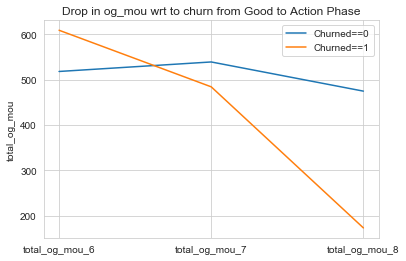

In [357]:
# Plotting for total_og_mou
plt.title('Drop in og_mou wrt to churn from Good to Action Phase')
plt.plot(tel_churn_data.groupby('is_churn')['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'].mean().T)
plt.legend(['Churned==0', 'Churned==1'])
plt.ylabel('total_og_mou')

Outgoing Minutes of usage is clearly going down from good phase to action phase, Marketing team can plan offers and promote campaigns for such customers. Outgoing terrifs of the competitors are much higher.

Text(0, 0.5, 'total_ic_mou')

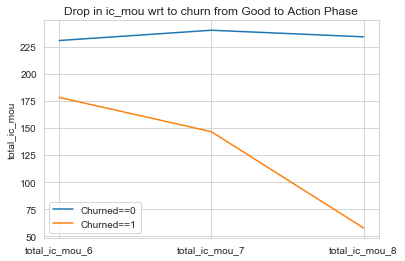

In [358]:
# Plotting for total_ic_mou
plt.title('Drop in ic_mou wrt to churn from Good to Action Phase')
plt.plot(tel_churn_data.groupby('is_churn')['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'].mean().T)
plt.legend(['Churned==0', 'Churned==1'])
plt.ylabel('total_ic_mou')

Incoming Minutes of usage is clearly going down from good phase to action phase, Marketing team can plan offers and promote campaigns for such customers and give out some exciting offers like 'family pack' or 'friends pack'

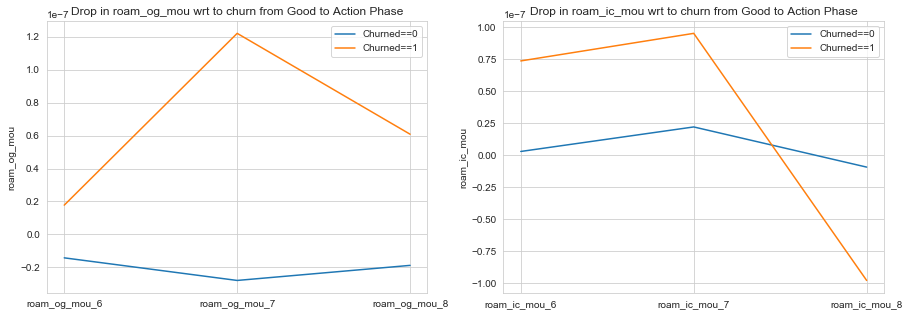

In [359]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

# Plotting for roam_og_mou
plt.title('Drop in roam_og_mou wrt to churn from Good to Action Phase')
plt.plot(tel_churn_data.groupby('is_churn')['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'].mean().T)
plt.legend(['Churned==0', 'Churned==1'])
plt.ylabel('roam_og_mou')

plt.subplot(1,2,2)
# Plotting for roam_ic_mou
plt.title('Drop in roam_ic_mou wrt to churn from Good to Action Phase')
plt.plot(tel_churn_data.groupby('is_churn')['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'].mean().T)
plt.legend(['Churned==0', 'Churned==1'])
plt.ylabel('roam_ic_mou')
plt.show()

As we can see, for the churners, roaming consumption is way more than the non churners. Network team must analyse these sort of anomalies in good and the action phase and sort this customers by giving out them offers regarding roaming fee clearance.

It might also be possible the roaming charges of the current operator is way more than the competitor. Team must take care by giving out similar offers like one-week free roaming or country specific roamings etc.

Customer's recharge pattern can be tracked and see if they are not following the non churners path, those customers can be served with special offers to regain their interest on the same operator